In [ ]:
rsum = rowSums(logcpm_coding)
rsd  = rowSds(logcpm_coding)
summary(rsum)
summary(rsd)

In [ ]:
logcpm_coding[1:10,1:10]

In [ ]:
plotdat = logcpm_coding[rsum > 41 & rsd > .75, ]
plotdat = scale(plotdat, scale = F, center = T)
plotdat = prcomp(t(plotdat))
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)
plot(plotdat, main = '')


In [ ]:
plotdat_x = as.data.table(plotdat$x, keep.rownames = T)
plotdat_x[, cell_type := sub('\\d+', '', rn)]


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)
ggplot(plotdat_x, aes(PC1, PC2, label = rn, color = cell_type)) + geom_point() + theme_pubr() + geom_text_repel()

In [ ]:
plotdat[1:3, 1:3]

In [ ]:
# cluster analysis
options(repr.plot.width = 14, repr.plot.height = 14, repr.plot.res = 200)
plotdat = logcpm_coding[rsum > 41 & rsd > .75, ]
plotdat = cor(plotdat)
plotdat = round(plotdat, 2)
corrplot.mixed(plotdat, order = 'AOE') 


In [ ]:
mtx_coding_df = mtx_all_df[coding_genes, ]
mtx_te_df = mtx_all_df[!rownames(mtx_all_df) %in% coding_genes, ]
dsn_all_df$cell_type


In [14]:
GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf"
TE_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"


In [ ]:
# TE gene list:
! cat /research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf \ 
| sed 's/.*family_id "//' | sed 's/".*//' |sort -u > te_gene_list 
# coding gene list:
! cat /research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf | sed 's/.*gene_id "//' | sed 's/".*//' |sort -u > coding_gene_list 


In [15]:
coding_genes = read.table('coding_gene_list', header = F)$V1
te_genes = read.table('te_gene_list', header = F)$V1


In [ ]:
print(length(sample_names))

In [16]:
sample_names_n24 = setdiff(sample_names, 'CLP2')
sample_names_n24

[1] "HSC1" "HSC2" "HSC3" "MPP1" "MPP2" "MPP3" "CMP1" "CMP2" "CMP3" "GMP1"
[11] "GMP2" "GMP3" "MEP1" "MEP2" "MEP3" "MEP4" "CLP1" "CLP3" "EB1"  "EB2" 
[21] "EB3"  "MK1"  "MK2"  "MK3"

In [ ]:
mtx_all_df = mtx_all_df[, sample_names_n24] 
dsn_all_df = dsn_all_df[sample_names_n24, ,drop = F]

In [ ]:
dsn_all_df = data.frame(cell_type = sub('\\d+', '', sample_names_n24), row.names = sample_names_n24)
head(dsn_all_df)


In [ ]:
dim(mtx_all_df)

In [20]:
dsn_all = as.data.table(dsn_all_df, keep.rownames = T)
head(dsn_all)

rn   cell_type
1 HSC1 HSC      
2 HSC2 HSC      
3 HSC3 HSC      
4 MPP1 MPP      
5 MPP2 MPP      
6 MPP3 MPP

In [ ]:
# take all together for logcpm
subtype = factor(dsn_all_df$cell_type)
subtype = relevel(subtype, ref = 'HSC')

dge_all = DGEList(counts=mtx_all_df, group = subtype)
dge_all <- calcNormFactors(dge_all)

keep = filterByExpr(dge_all)
dge_all = dge_all[keep, , keep.lib.sizes=FALSE]
dge_all = normLibSizes(dge_all)
design = model.matrix( ~  subtype)
dge_all = estimateDisp(dge_all, design)
fit_all = glmQLFit(dge_all, design, robust = T)

logcpm_all = log1p(cpm(dge_all, normalize = T))
logcpm_all_t = merge(as.data.table(t(logcpm_all), keep.rownames = T), dsn_all, by.x = 'rn', by.y = 'rn', all.x = T)
head(logcpm_all_t)



In [ ]:
saveRDS(mtx_all_df, file = 'data/mtx_all_df_may15.rds')
saveRDS(dge_all, file = 'data/dge_all_may1.rds')
saveRDS(fit_all, file = 'data/fit_all_may1.rds')
saveRDS(logcpm_all_t, file = 'data/logcpm_all_t_may1.rds')
saveRDS(logcpm_all, file = 'data/logcpm_all_may1.rds')


In [ ]:
mtx_all_df = readRDS(file = 'data/mtx_all_df_may15.rds')
dge_all = readRDS(file = 'data/dge_all_may1.rds')
fit_all = readRDS(file = 'data/fit_all_may1.rds')
logcpm_all_t = readRDS(file = 'data/logcpm_all_t_may1.rds')
logcpm_all = readRDS( file = 'data/logcpm_all_may1.rds')


In [ ]:
head(dsn_all_df)

In [ ]:
logcpm_coding = log1p(cpm(dge_coding, normalize = T))
logcpm_coding_t = merge(as.data.table(t(logcpm_coding), keep.rownames = T), dsn_all, by.x = 'rn', by.y = 'sample_name', all.x = T)
head(logcpm_coding_t)


In [ ]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 200)
ggplot(logcpm_coding_t, aes(cell_type, RPL9P32)) + geom_boxplot() + theme_pubr()


In [ ]:
subtype

In [ ]:
rownames(dsn_all_df)

In [ ]:
deg_coding_list = lapply(cell_types, function(cc){
    dsn_all_df$ctype = 'Other'
    dsn_all_df$ctype[dsn_all_df$cell_type == cc] = cc
    dsn_all_df$ctype = factor(dsn_all_df$ctype, levels = c('Other', cc))

    subtype = factor(dsn_all_df$ctype, levels = c('Other', cc))

    mtx_ranged = mtx_coding_df[, rownames(dsn_all_df)]

    dge = DGEList(counts=mtx_ranged, group = subtype)
    dge <- calcNormFactors(dge)

    keep = filterByExpr(dge)
    dge = dge[keep, , keep.lib.sizes=FALSE]
    dge = normLibSizes(dge)
    design = model.matrix( ~ 0 + subtype)
    dge = estimateDisp(dge, design)
    et <- exactTest(dge)
    deg = topTags(et, n = length(keep))
    deg = as.data.table(deg$table, keep.rownames = T)
    deg
})


In [ ]:
names(deg_coding_list) = cell_types
deg_coding_dt = rbindlist(deg_coding_list, idcol = T)
head(deg_coding_dt)


In [ ]:
saveRDS(dge_coding, file = 'data/dge_coding_may1.rds')
saveRDS(fit_coding, file = 'data/fit_coding_may1.rds')
saveRDS(deg_coding_dt, file = 'data/fit_coding_may1.rds')
saveRDS(logcpm_coding_t, file = 'data/logcpm_coding_t_may1.rds')
saveRDS(logcpm_coding, file = 'data/logcpm_coding_may1.rds')


In [22]:
dge_coding = readRDS(file = 'data/dge_coding_may1.rds')
fit_coding = readRDS(file = 'data/fit_coding_may1.rds')
deg_coding_dt = readRDS(file = 'data/fit_coding_may1.rds')
logcpm_coding_t = readRDS(file = 'data/logcpm_coding_t_may1.rds')
logcpm_coding = readRDS(file = 'data/logcpm_coding_may1.rds')


In [18]:
dge_te = readRDS(file = 'data/dge_te_may1.rds')


In [24]:
logcpm_te = log1p(cpm(dge_te, normalize = T))
logcpm_te_t = merge(as.data.table(t(logcpm_te), keep.rownames = T), dsn_all, by.x = 'rn', by.y = 'rn', all.x = T)
head(logcpm_te_t)


rn   (CATTC)n:Satellite:Satellite (GAATG)n:Satellite:Satellite
1 CLP1 3.77170034                   4.63978797                  
2 CLP2 2.55488926                   3.62635958                  
3 CLP3 3.81831320                   4.82210337                  
4 CMP1 0.05688596                   0.05688596                  
5 CMP2 0.00000000                   0.00000000                  
6 CMP3 0.22187696                   0.28609858                  
  7SLRNA:srpRNA:srpRNA ACRO1:acro:Satellite ALR/Alpha:centr:Satellite
1 0.2164227            0.02387541           7.007202                 
2 0.0000000            0.00000000           4.438421                 
3 0.0000000            0.56535274           7.619654                 
4 1.4937061            0.00000000           5.722906                 
5 1.2014158            0.00000000           5.154847                 
6 0.0000000            0.00000000           5.182468                 
  Alu:Alu:SINE AluJb:Alu:SINE AluJo:Alu:SINE AluJr4:Alu:SINE ⋯
1 5.703022     11.08094       7.912078       7.410949        ⋯
2 6.710508     11.58112       8.196001       7.712870        ⋯
3 5.682200     10.83616       7.624707       7.054188        ⋯
4 6.122863     11.44613       8.274052       7.518600        ⋯
5 6.066052     11.41367       8.289429       7.662381        ⋯
6 6.370389     11.54107       8.373230       7.847679        ⋯
  Zaphod:hAT-Tip100:DNA hAT-1_Mam:hAT-Tag1:DNA hAT-4b_Ther:hAT-Tip100:DNA
1 5.041638              5.765057               3.4844604                 
2 4.650663              6.707983               3.4098472                 
3 5.866756              5.777407               3.4589245                 
4 4.725115              5.956860               2.9672584                 
5 5.549836              6.060643               0.0000000                 
6 5.056814              6.527086               0.1532461                 
  hAT-5_Mam:hAT-Tag1:DNA hAT-N1_Mam:hAT-Tip100:DNA hAT-N1_Mam:hAT-Tip100?:DNA
1 5.649207               2.923947                  0                         
2 6.850528               4.516801                  0                         
3 4.982188               3.297034                  0                         
4 5.733000               3.471942                  0                         
5 5.857474               3.825790                  0                         
6 5.887382               3.229307                  0                         
  hAT-N1a_Mam:hAT-Tip100:DNA teucerv1_5edge:Unknown:Unknown
1 4.326286                   1.0594180                     
2 6.421943                   3.1627530                     
3 4.154770                   0.8594196                     
4 4.677806                   3.9036707                     
5 2.562857                   2.2249602                     
6 4.925169                   3.7665583                     
  teucerv2_3edge:Unknown:Unknown cell_type
1 2.058990                       CLP      
2 0.000000                       CLP      
3 2.333196                       CLP      
4 1.322062                       CMP      
5 4.539502                       CMP      
6 1.587576                       CMP

In [25]:
head(logcpm_te)

CLP1       CLP2     CLP3      CMP1       CMP2    
(CATTC)n:Satellite:Satellite 3.77170034 2.554889 3.8183132 0.05688596 0.000000
(GAATG)n:Satellite:Satellite 4.63978797 3.626360 4.8221034 0.05688596 0.000000
7SLRNA:srpRNA:srpRNA         0.21642273 0.000000 0.0000000 1.49370608 1.201416
ACRO1:acro:Satellite         0.02387541 0.000000 0.5653527 0.00000000 0.000000
ALR/Alpha:centr:Satellite    7.00720186 4.438421 7.6196540 5.72290582 5.154847
Alu:Alu:SINE                 5.70302204 6.710508 5.6822003 6.12286304 6.066052
                             CMP3      EB1       EB2       EB3       GMP1      
(CATTC)n:Satellite:Satellite 0.2218770 3.1695588 3.0523490 3.2886839 4.97049993
(GAATG)n:Satellite:Satellite 0.2860986 3.8140237 3.5721959 3.8915018 5.96214362
7SLRNA:srpRNA:srpRNA         0.0000000 0.4321979 0.1039927 0.2580340 0.02446446
ACRO1:acro:Satellite         0.0000000 0.3077983 0.2277056 0.5794301 0.33379627
ALR/Alpha:centr:Satellite    5.1824679 6.9923878 7.2553220 7.0518388 7.07571671
Alu:Alu:SINE                 6.3703887 6.0779290 5.8253031 6.0740339 5.50013040
                             ⋯ MEP1     MEP2      MEP3      MEP4      
(CATTC)n:Satellite:Satellite ⋯ 2.114319 0.3649249 0.2370925 0.07519283
(GAATG)n:Satellite:Satellite ⋯ 3.066557 1.9380910 2.1852613 0.14512497
7SLRNA:srpRNA:srpRNA         ⋯ 0.628114 0.2854078 0.8492068 0.35732902
ACRO1:acro:Satellite         ⋯ 0.504136 0.0000000 0.0000000 0.00000000
ALR/Alpha:centr:Satellite    ⋯ 5.908383 5.4519136 6.3363752 5.61016661
Alu:Alu:SINE                 ⋯ 6.104502 6.5142843 6.2412657 5.96698686
                             MK1       MK2       MK3       MPP1      MPP2     
(CATTC)n:Satellite:Satellite 3.0209095 4.0646749 4.3816731 4.1411807 0.2756219
(GAATG)n:Satellite:Satellite 3.7595287 4.8122156 5.2253841 5.3906039 0.2756219
7SLRNA:srpRNA:srpRNA         0.8208309 0.3046633 0.1470285 0.1106195 1.1941604
ACRO1:acro:Satellite         0.5464312 0.1775382 0.5288045 0.3514251 0.0000000
ALR/Alpha:centr:Satellite    6.3990338 7.1588061 6.7413921 6.6826471 5.8433350
Alu:Alu:SINE                 6.0198001 5.8360846 5.7984245 5.6170751 6.1814419
                             MPP3    
(CATTC)n:Satellite:Satellite 3.163012
(GAATG)n:Satellite:Satellite 4.558464
7SLRNA:srpRNA:srpRNA         1.224383
ACRO1:acro:Satellite         0.000000
ALR/Alpha:centr:Satellite    7.586976
Alu:Alu:SINE                 5.956293

In [26]:
getwd()

[1] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan"

In [ ]:
deg_te_list = lapply(cell_types, function(cc){
    dsn_all_df$ctype = 'Other'
    dsn_all_df$ctype[dsn_all_df$cell_type == cc] = cc
    dsn_all_df$ctype = factor(dsn_all_df$ctype, levels = c('Other', cc))

    subtype = factor(dsn_all_df$ctype, levels = c('Other', cc))
    mtx_arranged = mtx_te_df[, rownames(dsn_all_df)]

    dge = DGEList(counts=mtx_arranged, group = subtype)
    dge <- calcNormFactors(dge)

    keep = filterByExpr(dge)
    dge = dge[keep, , keep.lib.sizes=FALSE]
    dge = normLibSizes(dge)
    design = model.matrix( ~ 0 + subtype)
    dge = estimateDisp(dge, design)
    et <- exactTest(dge)
    deg = topTags(et, n = length(keep))
    deg = as.data.table(deg$table, keep.rownames = T)
    deg
})



In [ ]:
names(deg_te_list) = cell_types
deg_te_dt = rbindlist(deg_te_list, idcol = T)
head(deg_te_dt)


In [ ]:
saveRDS(dge_te, file = 'data/dge_te_may1.rds')
saveRDS(fit_te, file = 'data/fit_te_may1.rds')
saveRDS(deg_te_dt, file = 'data/fit_te_may1.rds')
saveRDS(logcpm_te_t, file = 'data/logcpm_te_t_may1.rds')
saveRDS(logcpm_te, file = 'data/logcpm_te_may1.rds')


In [23]:
dge_te = readRDS(file = 'data/dge_te_may1.rds')
fit_te = readRDS(file = 'data/fit_te_may1.rds')
deg_te_dt = readRDS(file = 'data/fit_te_may1.rds')
logcpm_te_t = readRDS(file = 'data/logcpm_te_t_may1.rds')
logcpm_te = readRDS(file = 'data/logcpm_te_may1.rds')


In [ ]:
head(deg_coding_dt)

In [ ]:
head(deg_te_dt)


### based on the gene list from the paper

In [ ]:
head(st_4)

In [ ]:
table(st_4$Model)

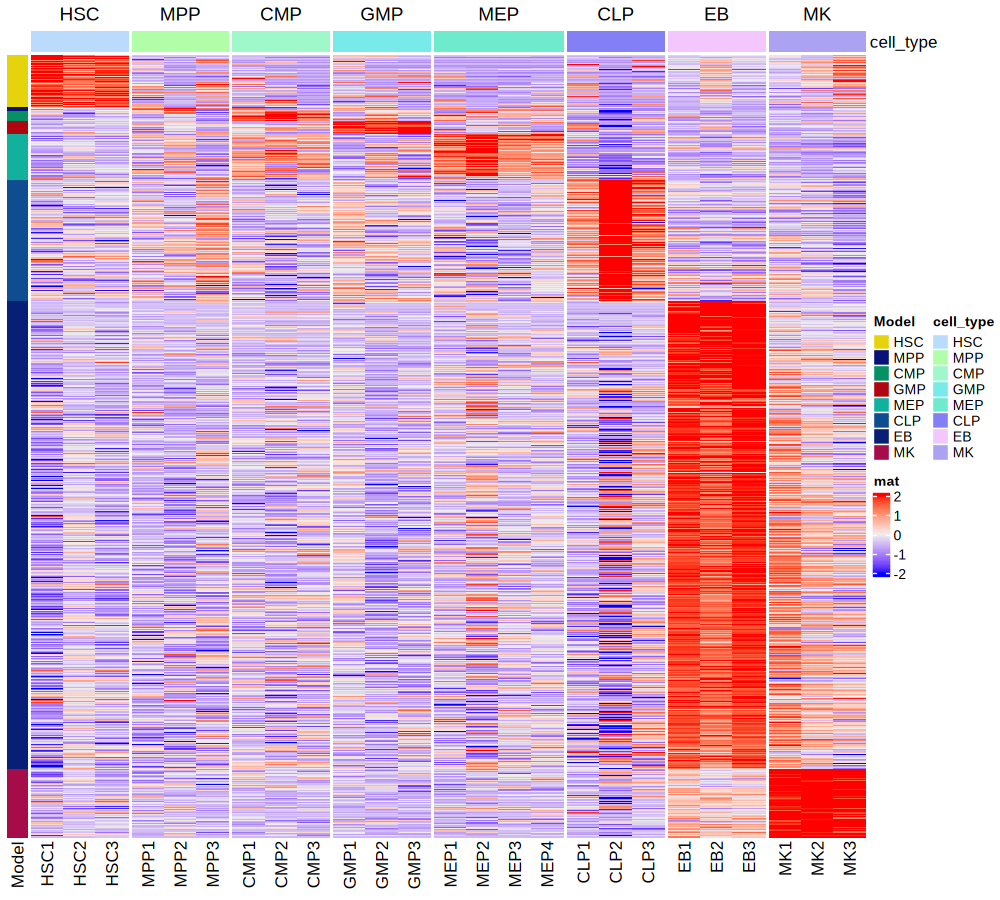

In [672]:
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

st_4 = as.data.table(read_xlsx('data/1251033s.xlsx', sheet = 4, skip = 1)  )
setnames(st_4, 9, 'pval')
sig_genes = st_4$External_gene_id
sig_genes = intersect(sig_genes, rownames(logcpm_coding))

st_4_sel = st_4[External_gene_id %in% sig_genes, ]
st_4_sel[, ctype_gene := paste0(Model, '_', External_gene_id)]
st_4_sel[, Model := factor(Model, levels = cell_types)]
st_4_sel = st_4_sel[order(Model), ]

plotdat = logcpm_coding[st_4_sel$External_gene_id, rownames(dsn_all_df)]
rownames(plotdat) = st_4_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = st_4_sel[, .(Model)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = F, cluster_rows = F,  
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [ ]:
st_4 = as.data.table(read_xlsx('data/1251033s.xlsx', sheet = 4, skip = 1)  )
setnames(st_4, 9, 'pval')
st_4_sel = st_4 %>% group_by(Model) %>% slice_min(order_by = pval, n = 20)
dim(st_4_sel)
head(st_4_sel)

In [ ]:
head(deg_coding_dt)

In [ ]:
colnames(st_4)

In [ ]:
st_4 = as.data.table(read_xlsx('data/1251033s.xlsx', sheet = 4, skip = 1)  )
sig = deg_coding_dt[FDR < .1, rn]
summary(st_4[External_gene_id %in% sig, `Second posterior probability`])


In [678]:
dsn_all_df = data.frame(cell_type = sub('\\d+', '', sample_names_n24), row.names = sample_names_n24)
dim(dsn_all_df)

[1] 24  1

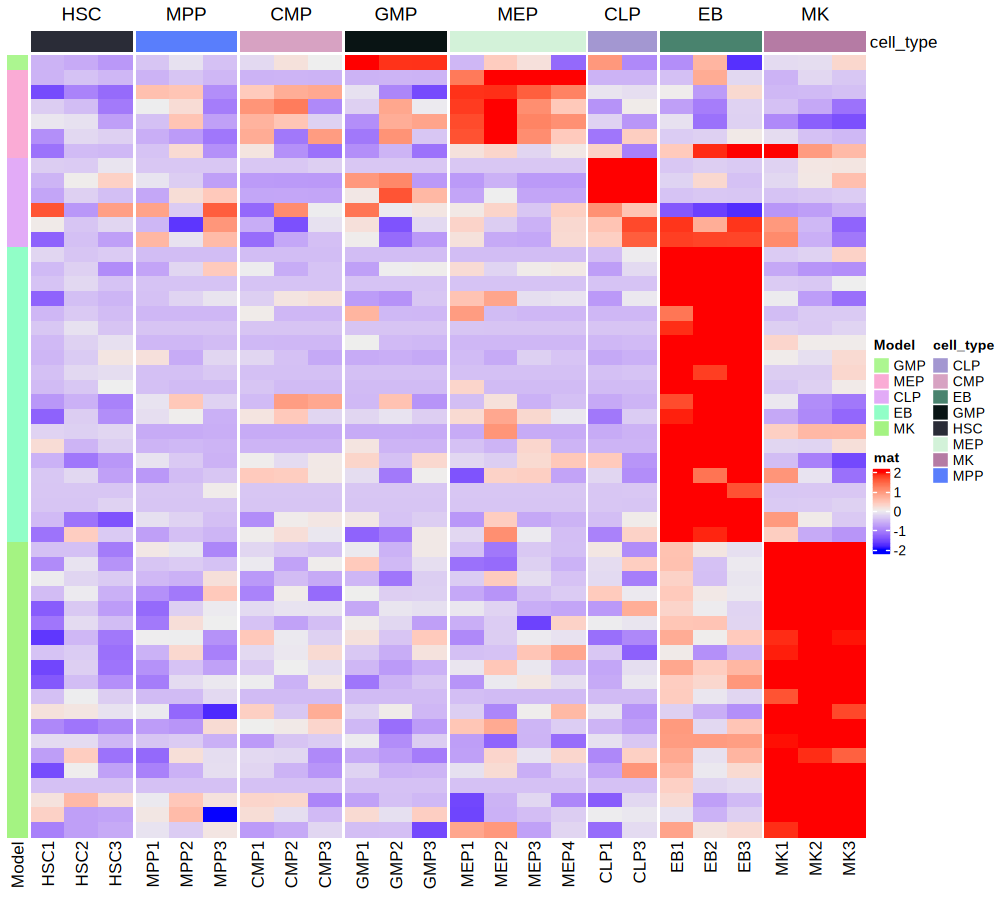

In [679]:
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

st_4 = as.data.table(read_xlsx('data/1251033s.xlsx', sheet = 4, skip = 1)  )
st_4 = st_4[External_gene_id %in% deg_coding_dt[FDR < 0.05, rn], ]
setnames(st_4, 9, 'pval')
st_4_sel = st_4 %>% group_by(Model) %>% slice_min(order_by = pval, n = 20)
st_4_sel = as.data.table(st_4_sel)

sig_genes = intersect(sig_genes, rownames(logcpm_coding))

st_4_sel = st_4_sel[External_gene_id %in% sig_genes, ]
st_4_sel[, ctype_gene := paste0(Model, '_', External_gene_id)]
st_4_sel[, Model := factor(Model, levels = cell_types)]
st_4_sel = st_4_sel[order(Model), ]

plotdat = logcpm_coding[st_4_sel$External_gene_id, rownames(dsn_all_df)]
rownames(plotdat) = st_4_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = st_4_sel[, .(Model)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = F, cluster_rows = F,  
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


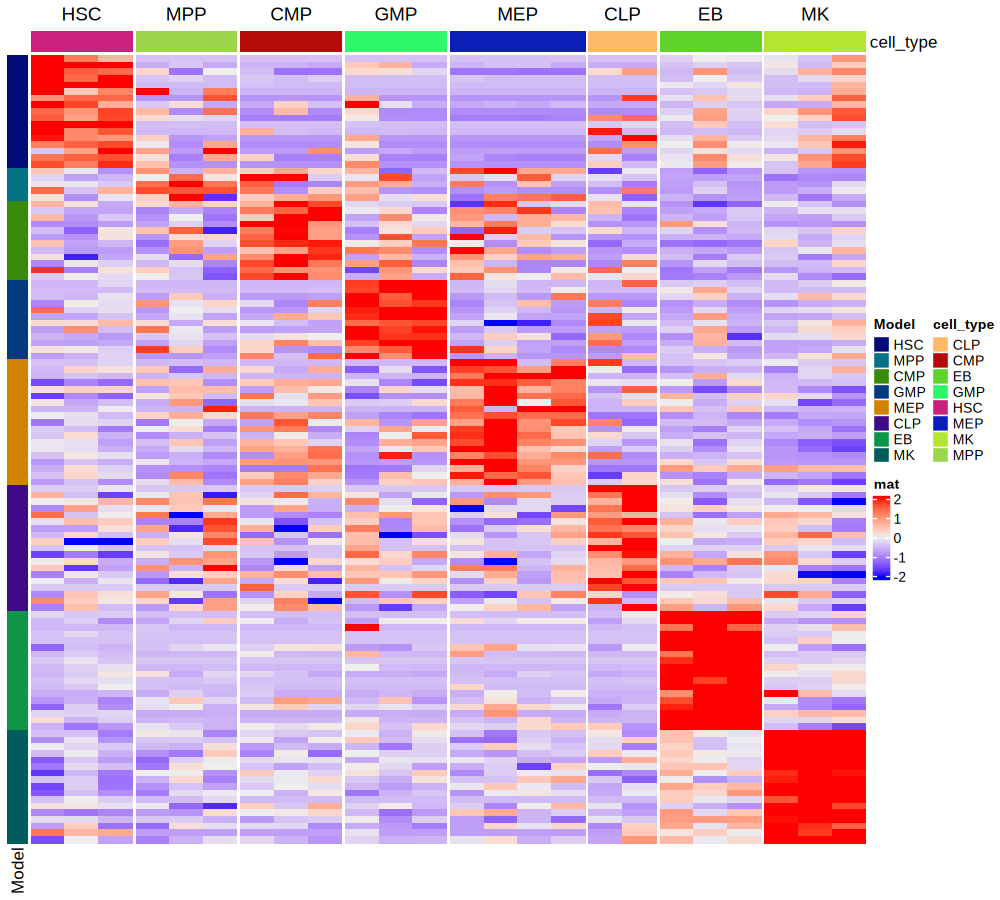

In [680]:
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

st_4 = as.data.table(read_xlsx('data/1251033s.xlsx', sheet = 4, skip = 1)  )
setnames(st_4, 9, 'pval')
st_4_sel = st_4 %>% group_by(Model) %>% slice_min(order_by = pval, n = 20)
st_4_sel = as.data.table(st_4_sel)

sig_genes = intersect(sig_genes, rownames(logcpm_coding))

st_4_sel = st_4_sel[External_gene_id %in% sig_genes, ]
st_4_sel[, ctype_gene := paste0(Model, '_', External_gene_id)]
st_4_sel[, Model := factor(Model, levels = cell_types)]
st_4_sel = st_4_sel[order(Model), ]

plotdat = logcpm_coding[st_4_sel$External_gene_id, rownames(dsn_all_df)]
rownames(plotdat) = st_4_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = st_4_sel[, .(Model)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = F, show_column_dend = F, cluster_columns  = F, cluster_rows = F,  
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


### overlap between two analysis 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


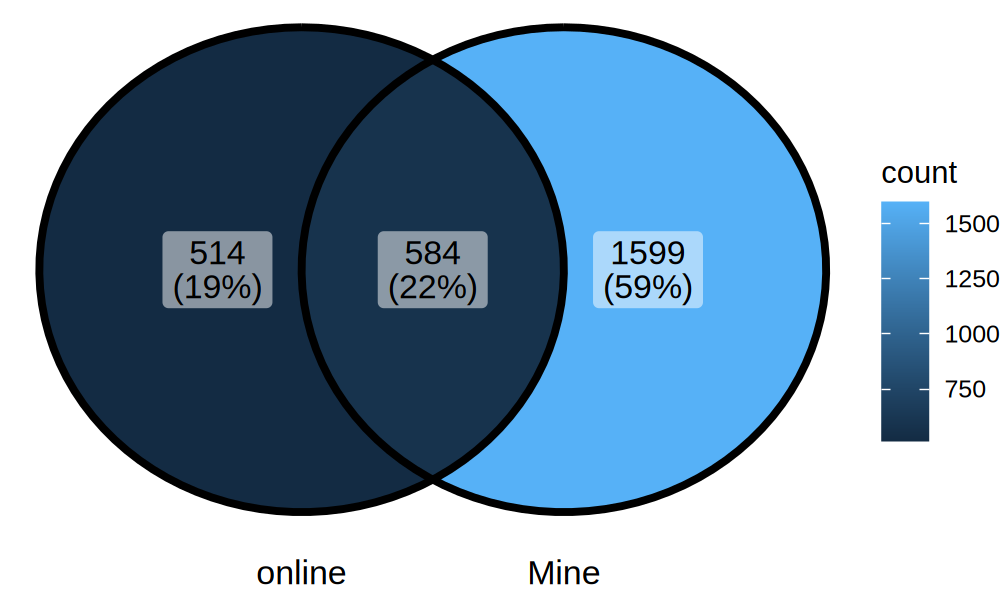

In [681]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
gene_sel = unique(deg_coding_dt[FDR < 0.1 & logFC > 0, rn])
ggVennDiagram(list(online = st_4$External_gene_id, Mine = gene_sel)) + coord_flip() 


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


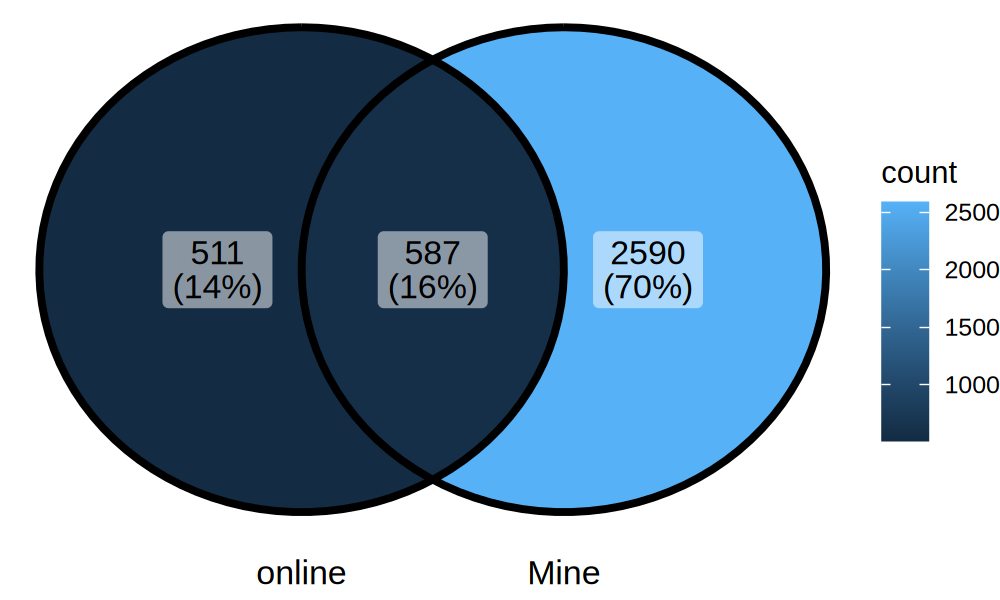

In [682]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
gene_sel = unique(deg_coding_dt[FDR < 0.1, rn])
ggVennDiagram(list(online = st_4$External_gene_id, Mine = gene_sel)) + coord_flip() 


### based on the sig genes from this analysis

In [683]:
logcpm_coding_t[1:3, ]

rn   A1BG      A1BG-AS1    A1CF A2M        A2M-AS1  A2ML1    A2MP1      A4GALT A4GNT       ⋯ ZXDA      ZXDB       ZXDC     ZYG11A ZYG11AP1 ZYG11B     ZYX       ZZEF1      ZZZ3     
1 CLP1 0.2455252 0.009550539 0    2.42367147 2.919004 0.000000 2.38907214 0      0.009550539 ⋯ 1.4408663 0.19154423 3.000074 0      0        2.22492733 4.2183973 3.07771753 3.2672181
2 CLP2 1.0554484 0.000000000 0    0.02130323 0.000000 0.000000 0.02130323 0      0.000000000 ⋯ 0.0000000 5.59529324 3.526601 0      0        0.02130323 3.5772157 0.06259471 0.1022486
3 CLP3 1.6267041 1.661039277 0    1.24074000 0.000000 1.445273 1.27027429 0      0.000000000 ⋯ 0.1251111 0.07142846 2.920351 0      0        2.51669224 0.4175842 2.09284703 3.9639706
  cell_type
1 CLP      
2 CLP      
3 CLP

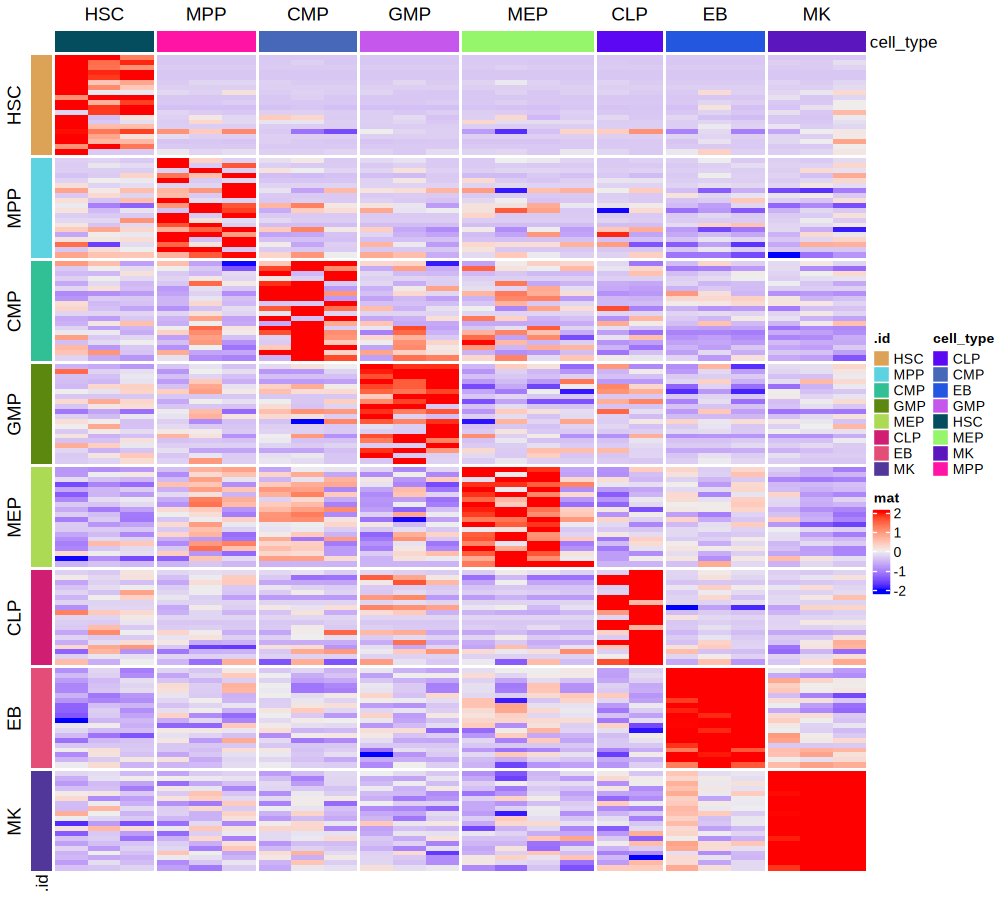

In [684]:
# top 20 up-regulated coding genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

row_sel = deg_coding_dt[logFC > 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_coding))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_coding[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

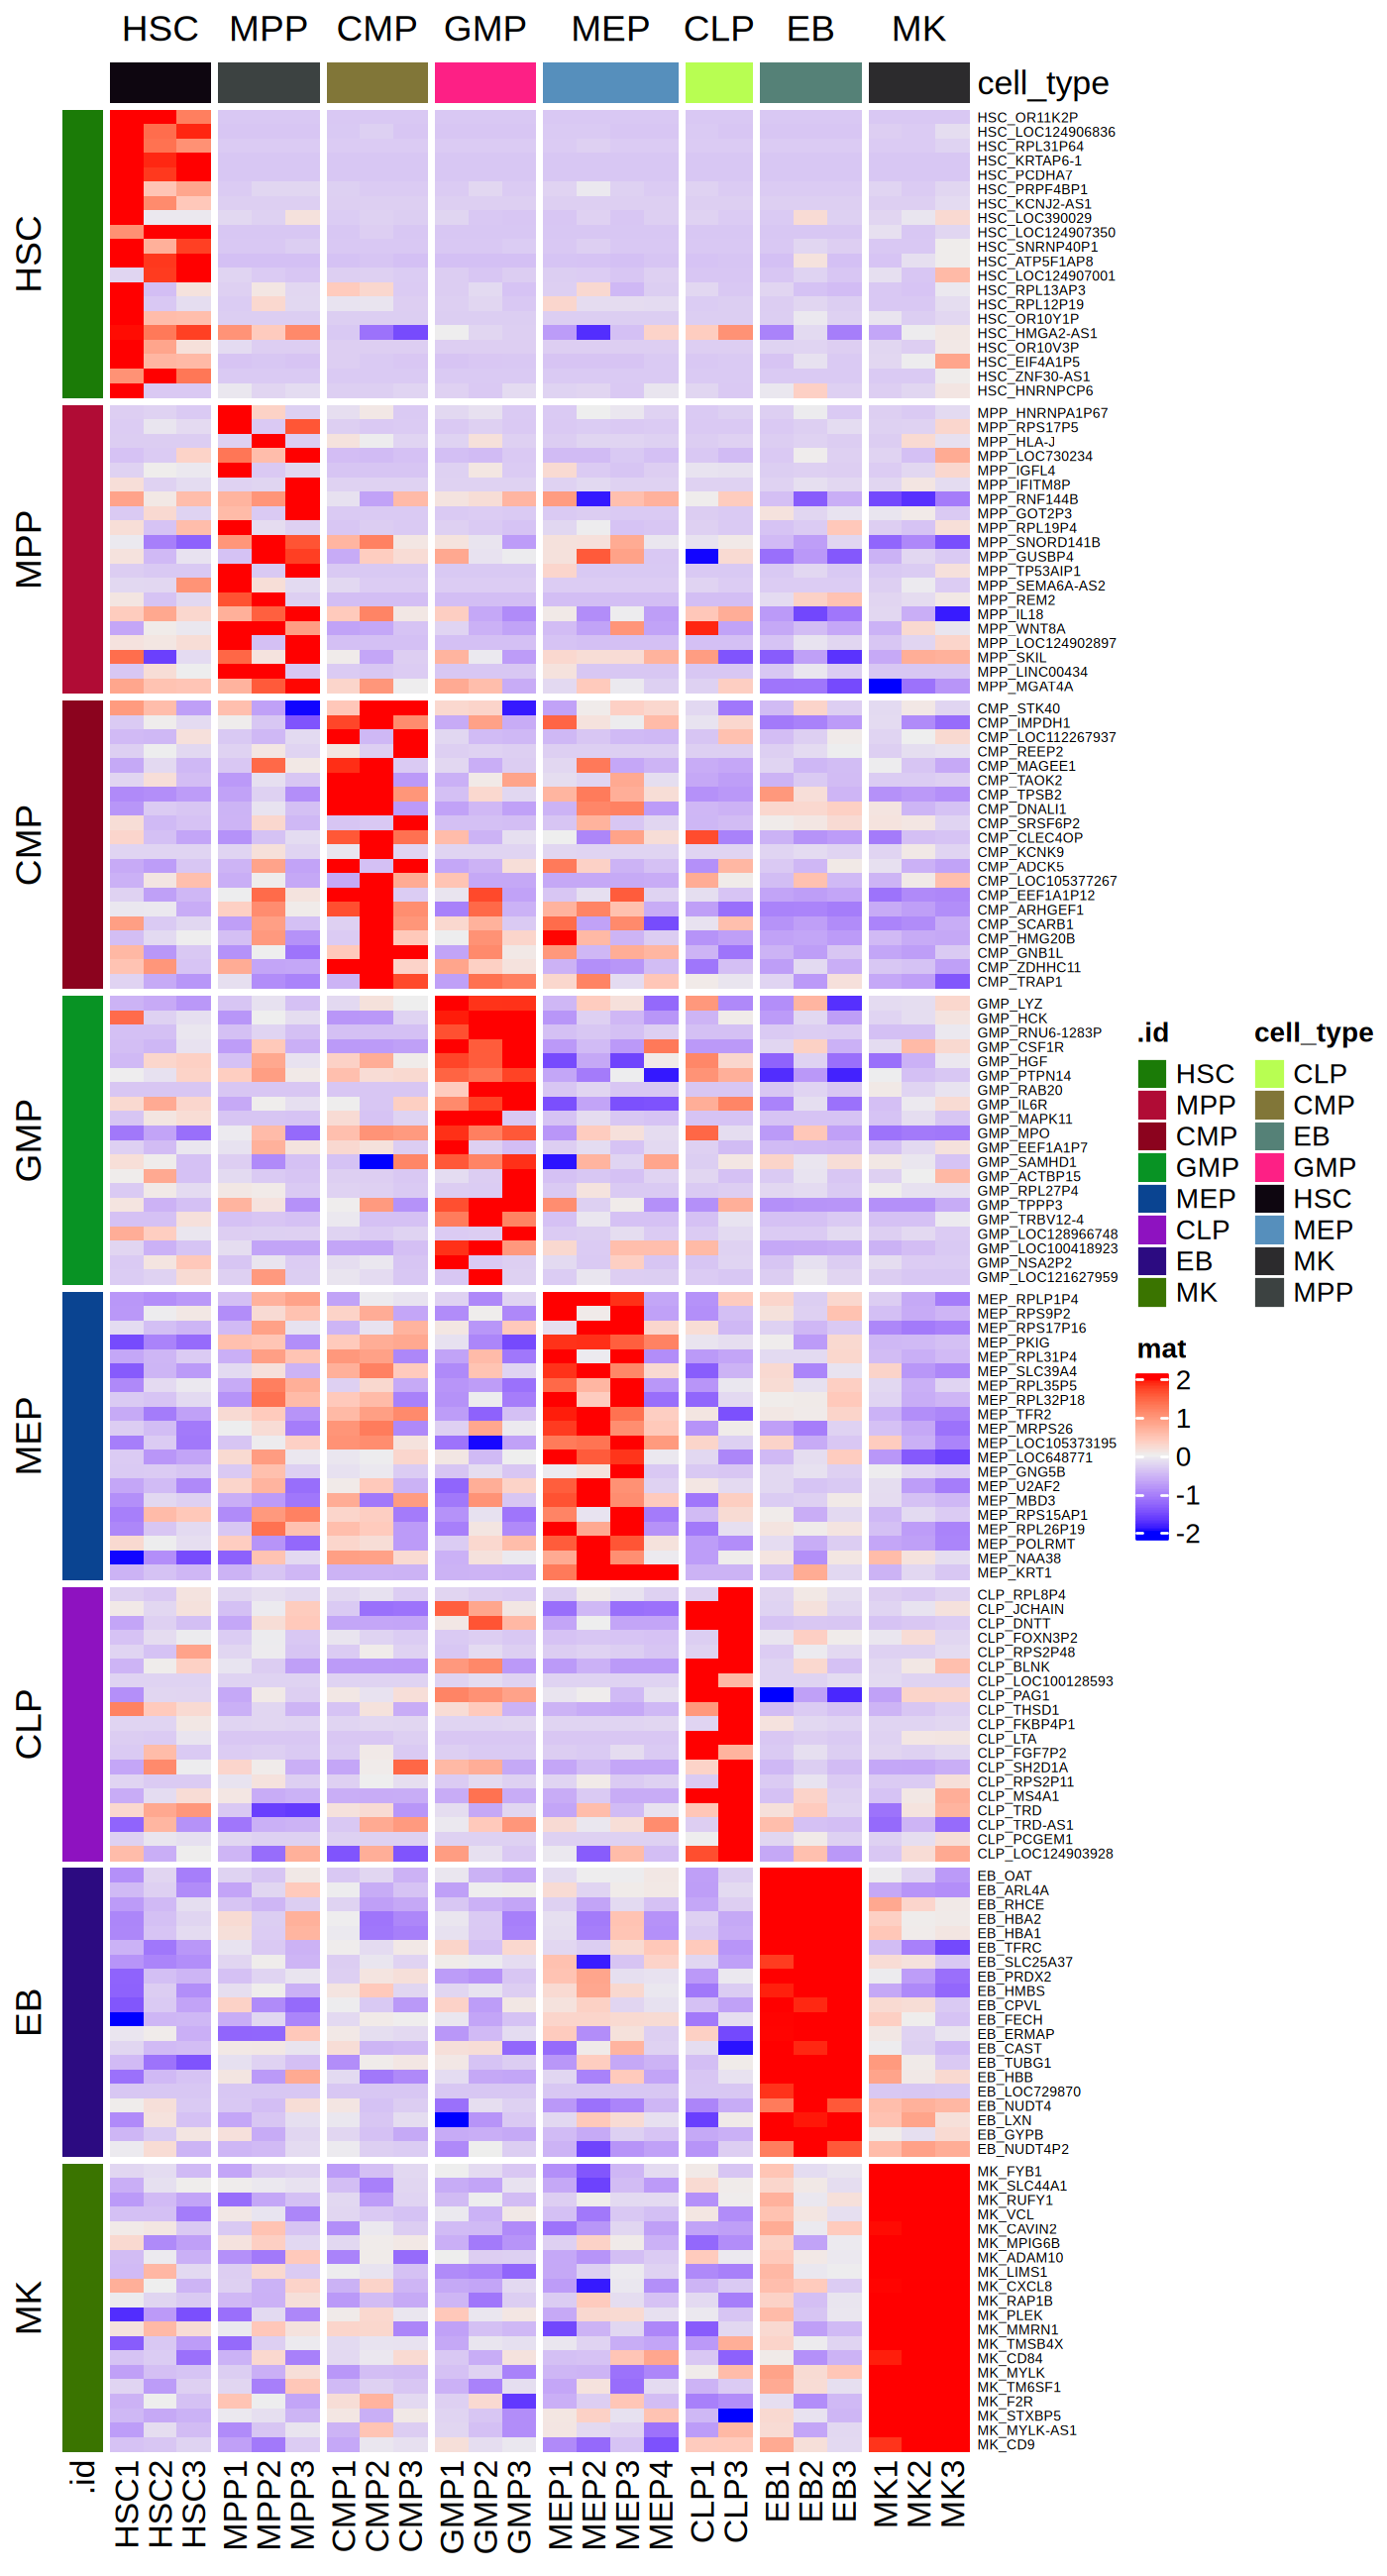

In [685]:
# top 20 up-regulated coding genes for each cell type
options(repr.plot.width = 7, repr.plot.height = 13, repr.plot.res = 200)

row_sel = deg_coding_dt[logFC > 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_coding))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_coding[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = T, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id,   row_names_gp = grid::gpar(fontsize = 5), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

In [686]:
head(row_sel)

.id rn           logFC    logCPM    PValue       FDR          ctype_gene      
1 HSC OR11K2P      9.380614 -2.944438 2.118393e-09 0.0000838354 HSC_OR11K2P     
2 HSC LOC124906836 7.401834 -2.141472 2.917073e-08 0.0005772158 HSC_LOC124906836
3 HSC RPL31P64     8.223059 -3.186283 6.894059e-08 0.0009094413 HSC_RPL31P64    
4 HSC KRTAP6-1     7.981290 -4.024737 9.548944e-08 0.0009447486 HSC_KRTAP6-1    
5 HSC PCDHA7       7.744114 -4.179213 1.936259e-07 0.0015325491 HSC_PCDHA7      
6 HSC PRPF4BP1     5.585529 -3.700205 5.287894e-07 0.0034878068 HSC_PRPF4BP1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


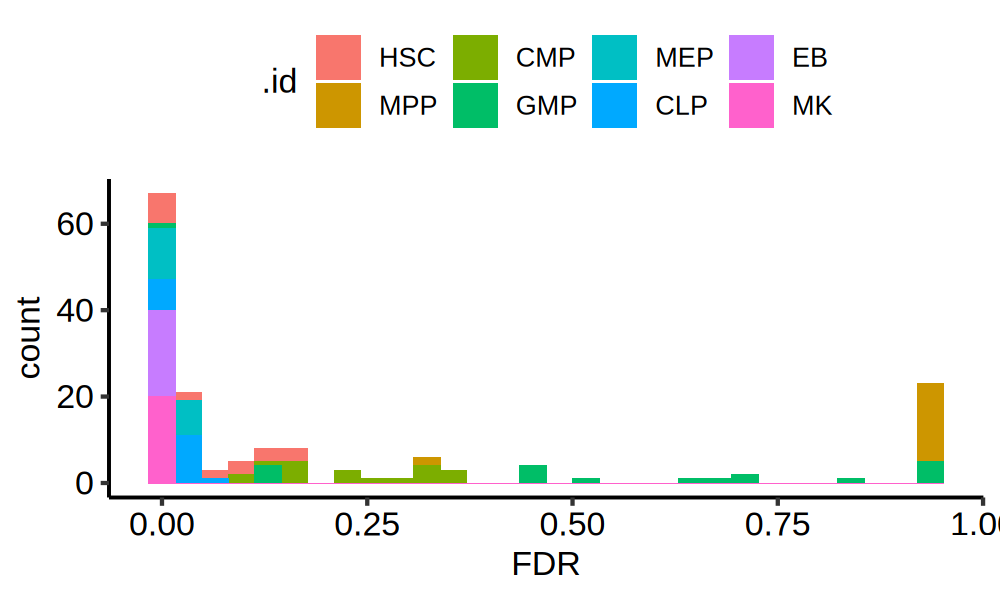

In [687]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
ggplot(row_sel, aes(x = FDR, fill = .id)) + geom_histogram() + theme_pubr()


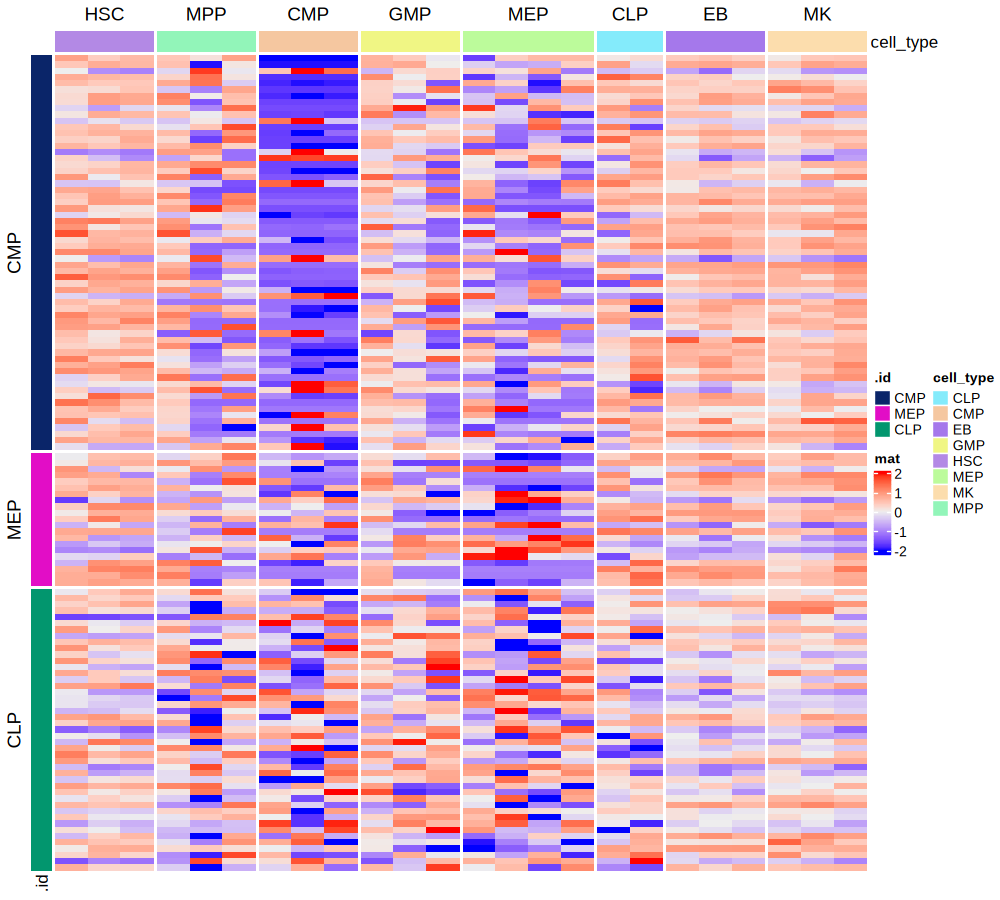

In [688]:
# significant TEs
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

row_sel = deg_te_dt[abs(logFC) > 1 & FDR < 0.1, ]
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_te))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_te[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

In [689]:
table(sign(row_sel$logFC))


-1  1 
66 63 

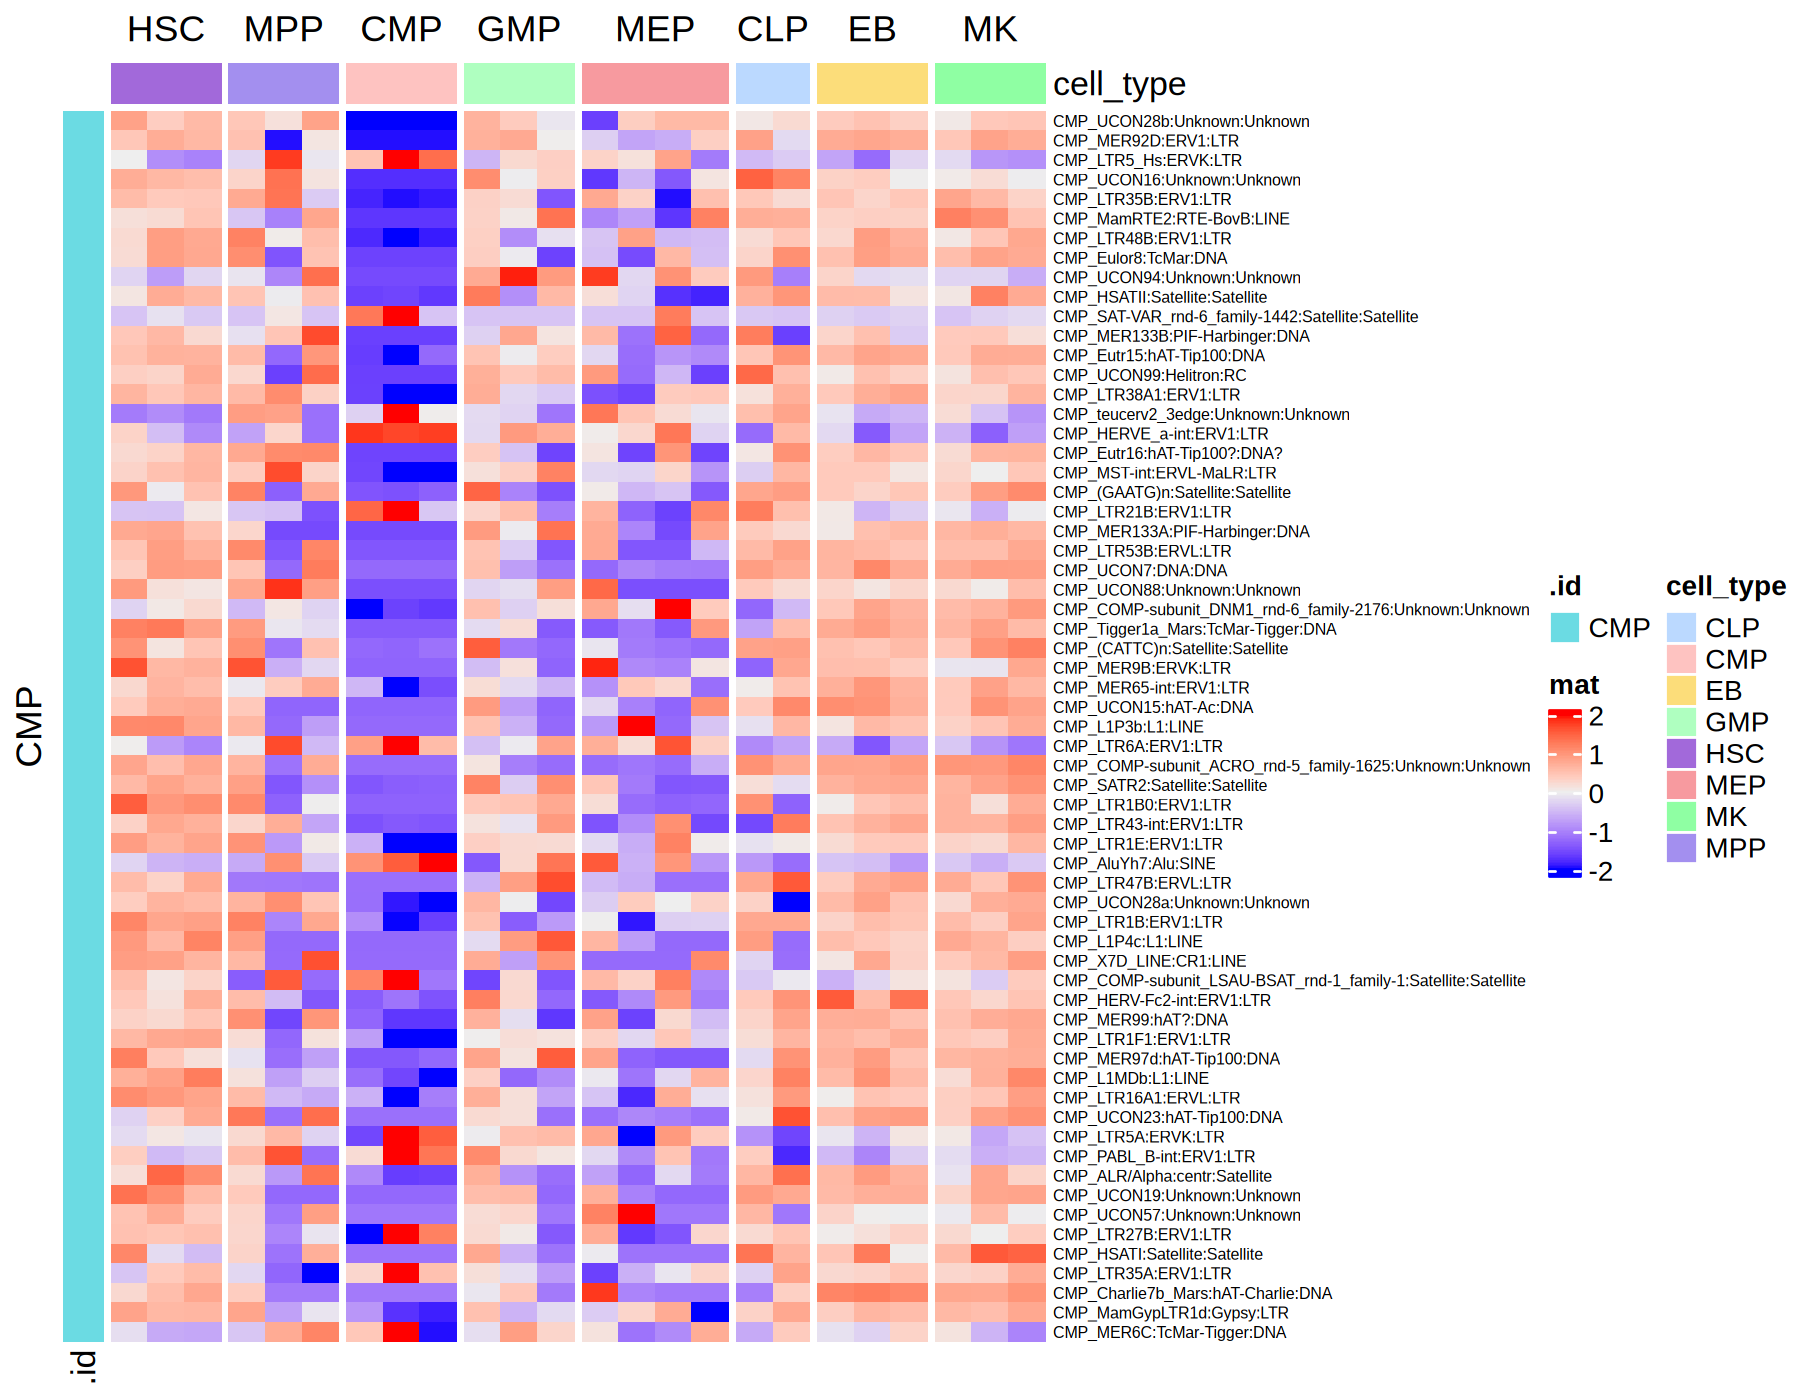

In [690]:
# significant TEs
options(repr.plot.width = 9, repr.plot.height = 7, repr.plot.res = 200)

row_sel = deg_te_dt[abs(logFC) > 1 & FDR < 0.1, ]
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_te))
row_sel = row_sel[rn %in% ov, ][.id == 'CMP', ]

plotdat = logcpm_te[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = T, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id,   row_names_gp = grid::gpar(fontsize = 5.5), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

In [691]:
table(sign(row_sel$logFC))


-1  1 
50 13 

In [692]:
nrow( deg_te_dt[.id == 'MK' & logFC > 0 & FDR < 0.1, ] )

[1] 0

In [693]:
mk = deg_te_dt[logFC > 0 & .id == 'MK', ] %>% slice_min(order_by = PValue, n = 20)


In [694]:
head(deg_te_dt)

.id rn                      logFC      logCPM    PValue      FDR       sel idd class_id family_id    gene_id    
1 HSC FLAM_C:Alu:SINE         -0.9128241 12.467095 0.003354908 0.5944787 NA  1   SINE     Alu          FLAM_C     
2 HSC UCON44:TcMar-Tigger:DNA -1.6884823  7.812925 0.004110851 0.5944787 NA  2   DNA      TcMar-Tigger UCON44     
3 HSC L1ME3G:L1:LINE          -0.5030516 12.483404 0.005752892 0.5944787 NA  3   LINE     L1           L1ME3G     
4 HSC L1ME4a:L1:LINE          -0.5586001 12.695243 0.007049395 0.5944787 NA  4   LINE     L1           L1ME4a     
5 HSC MER33:hAT-Charlie:DNA   -0.7200624 10.986634 0.008228203 0.5944787 NA  5   DNA      hAT-Charlie  MER33      
6 HSC ERVL-B4-int:ERVL:LTR     0.6461831  8.966138 0.009950680 0.5944787 NA  6   LTR      ERVL         ERVL-B4-int

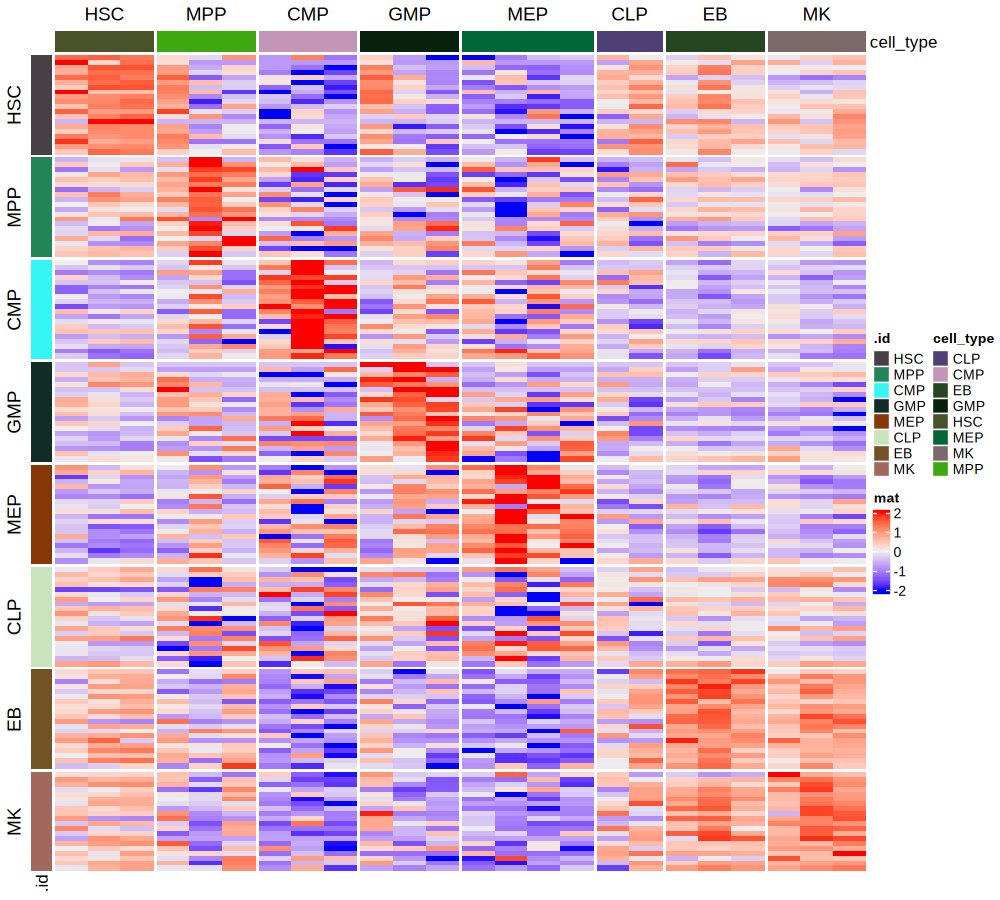

In [695]:
# top 20 up-regulated te genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

row_sel = deg_te_dt[logFC > 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_te))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_te[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

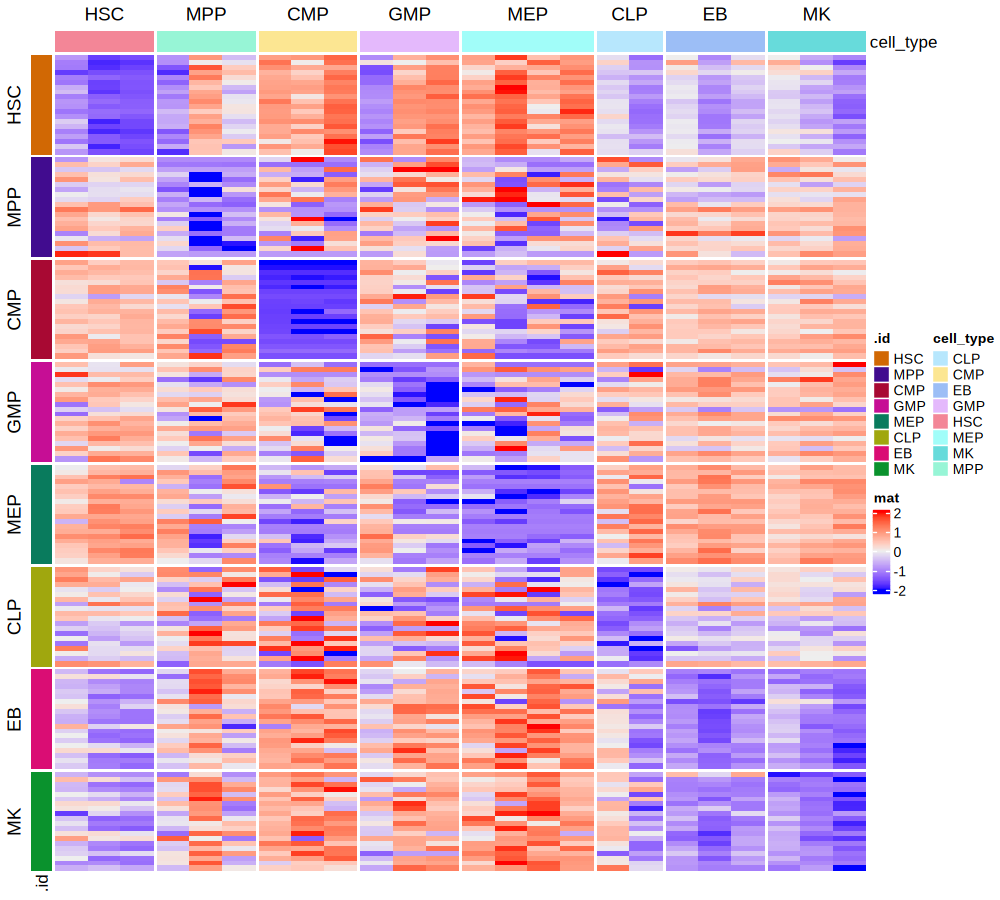

In [696]:
# top 20 up-regulated te genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

row_sel = deg_te_dt[logFC < 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_te))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_te[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


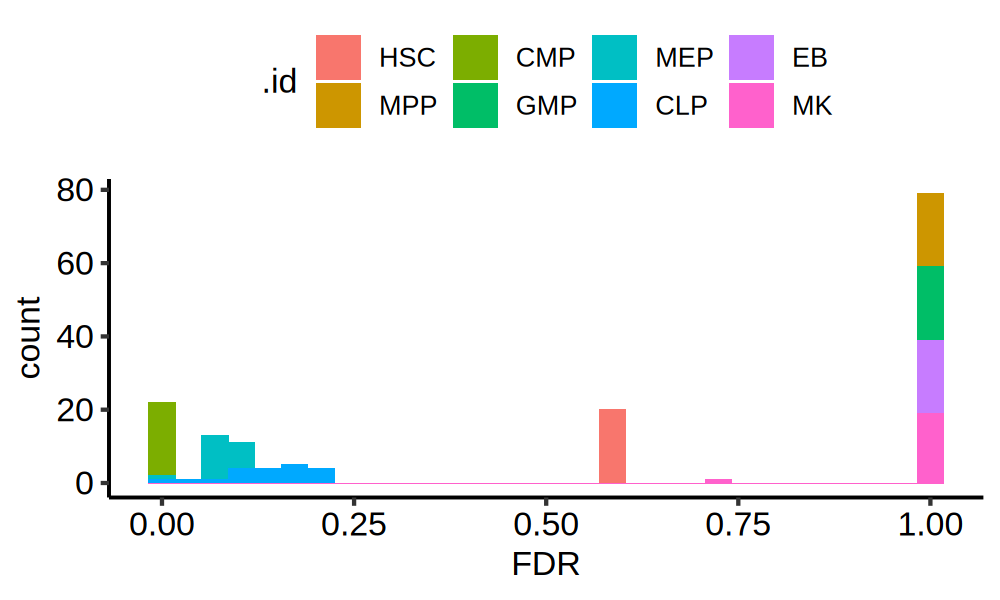

In [697]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
ggplot(row_sel, aes(x = FDR, fill = .id)) + geom_histogram() + theme_pubr()


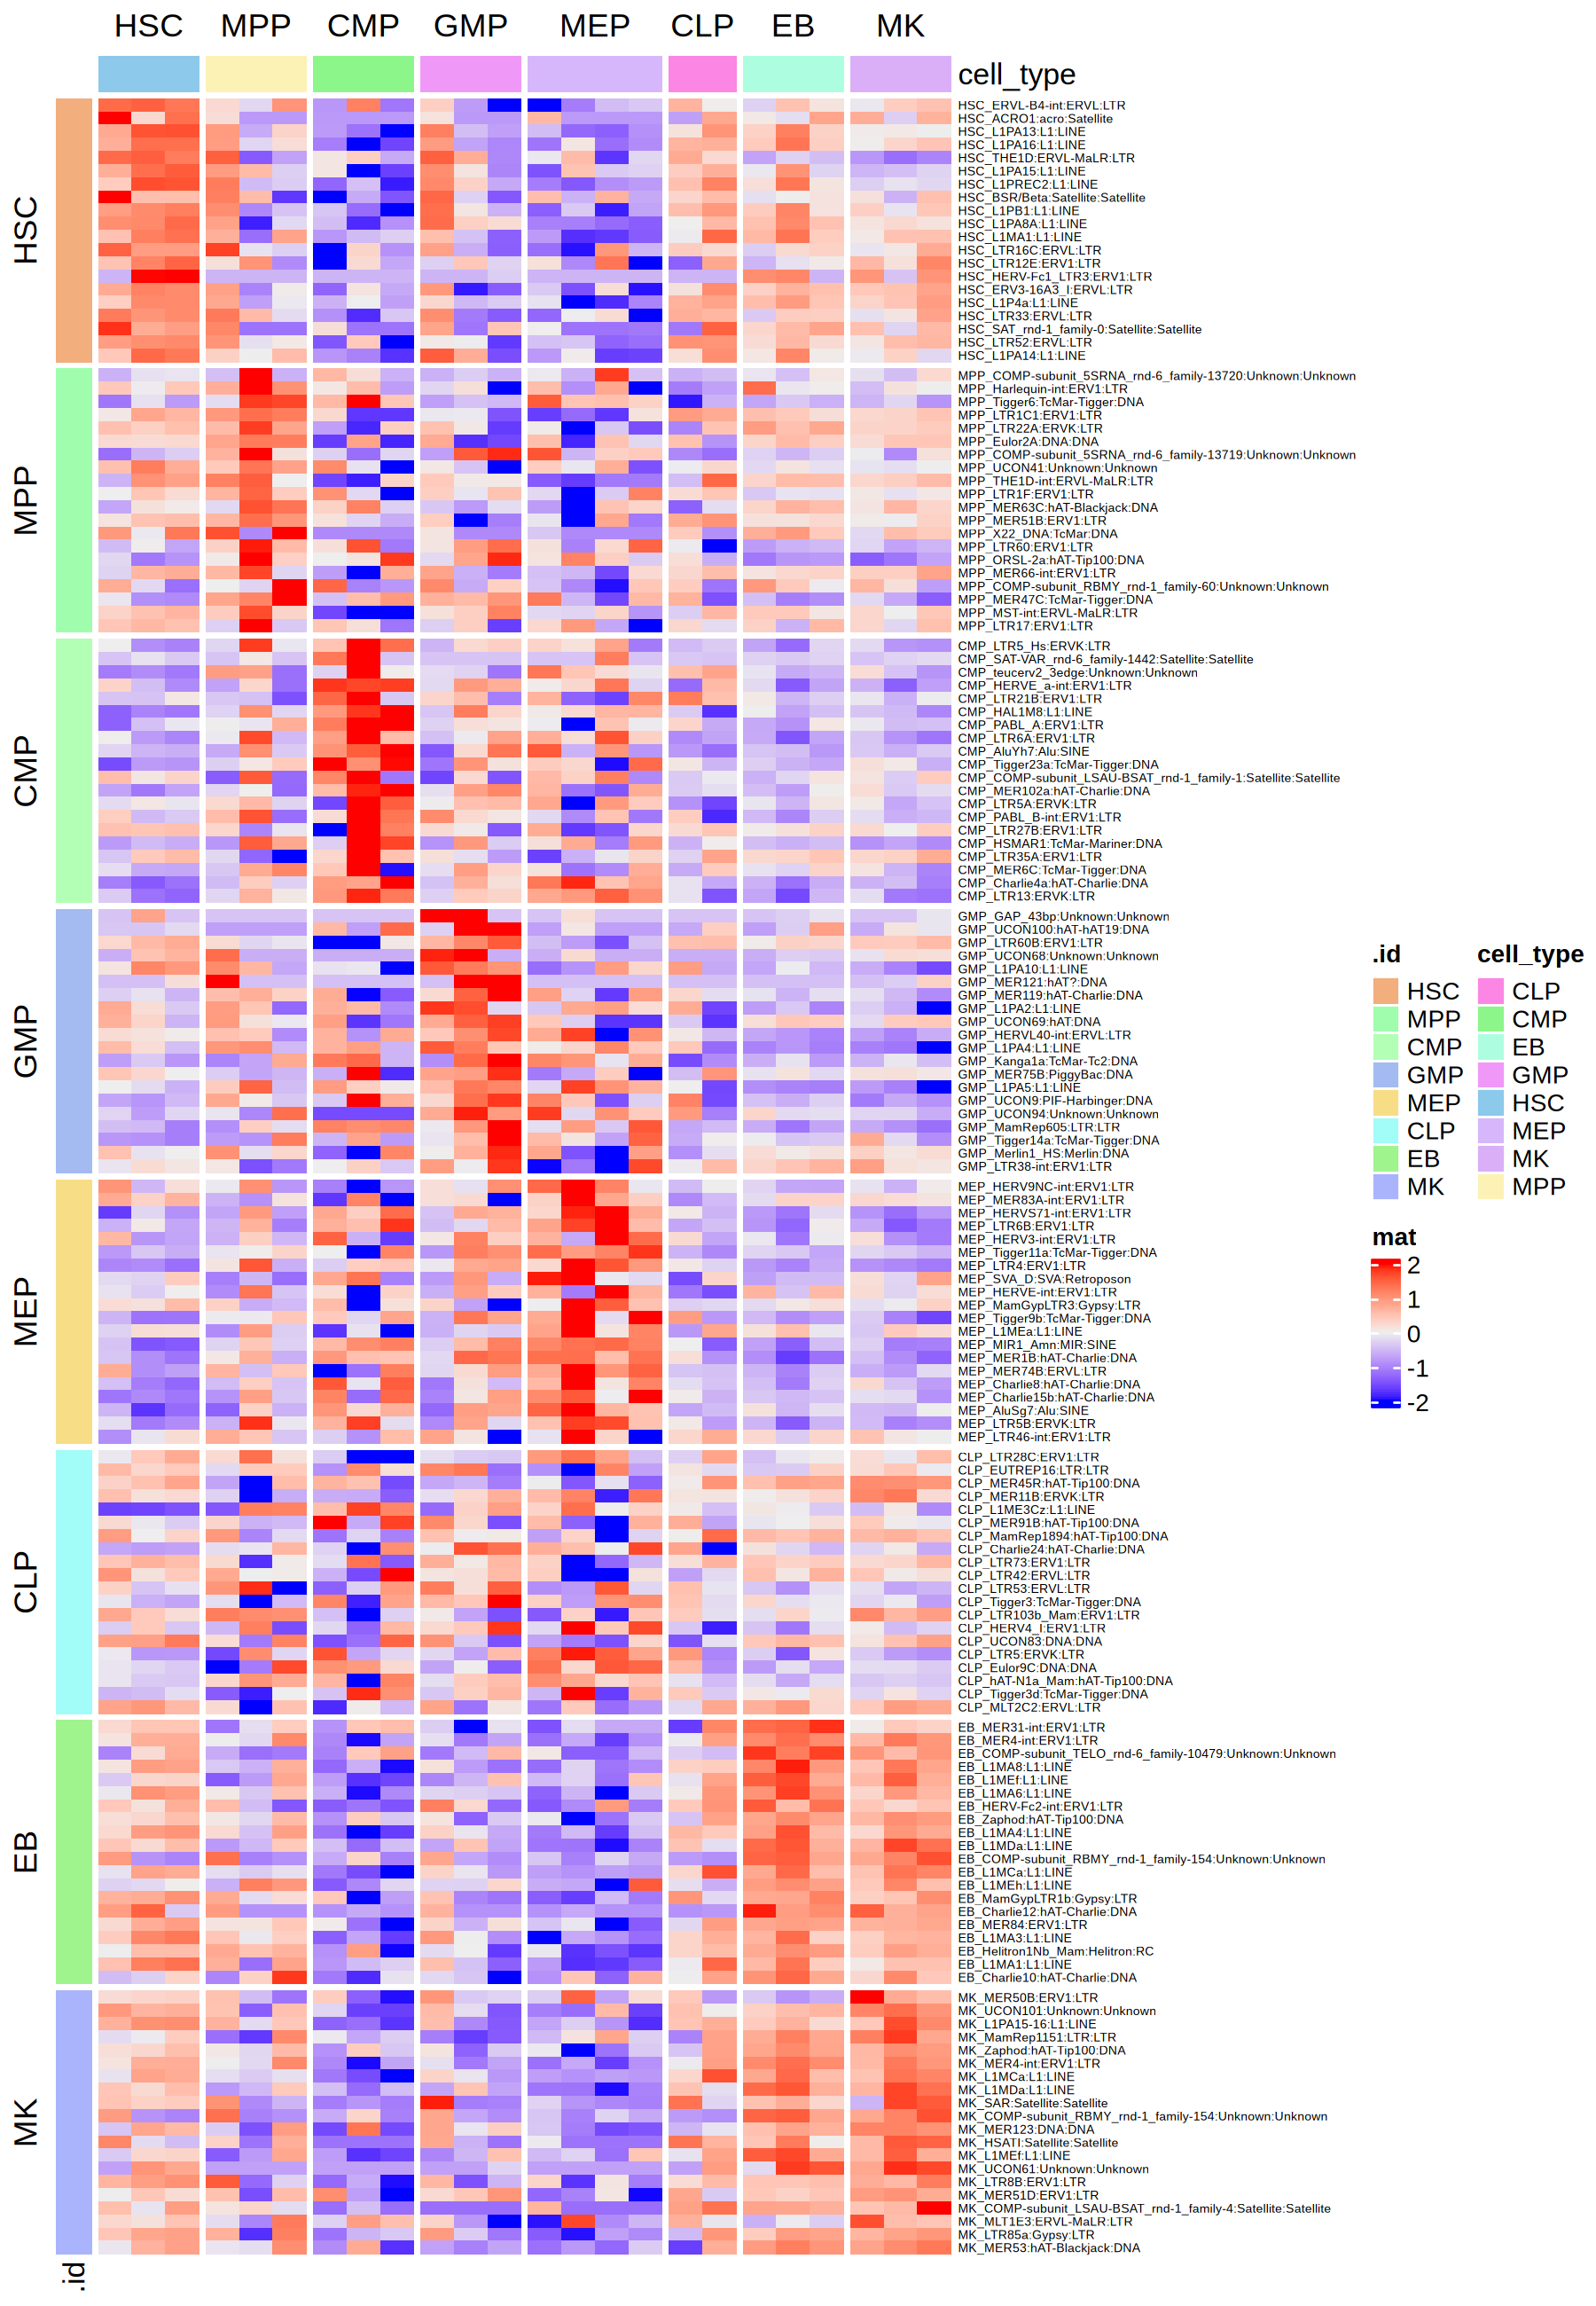

In [699]:
# top 20 up-regulated te genes for each cell type
options(repr.plot.width = 9, repr.plot.height = 13, repr.plot.res = 200)

row_sel = deg_te_dt[logFC > 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_te))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_te[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = F, show_row_names = T, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, row_names_gp = grid::gpar(fontsize = 5), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


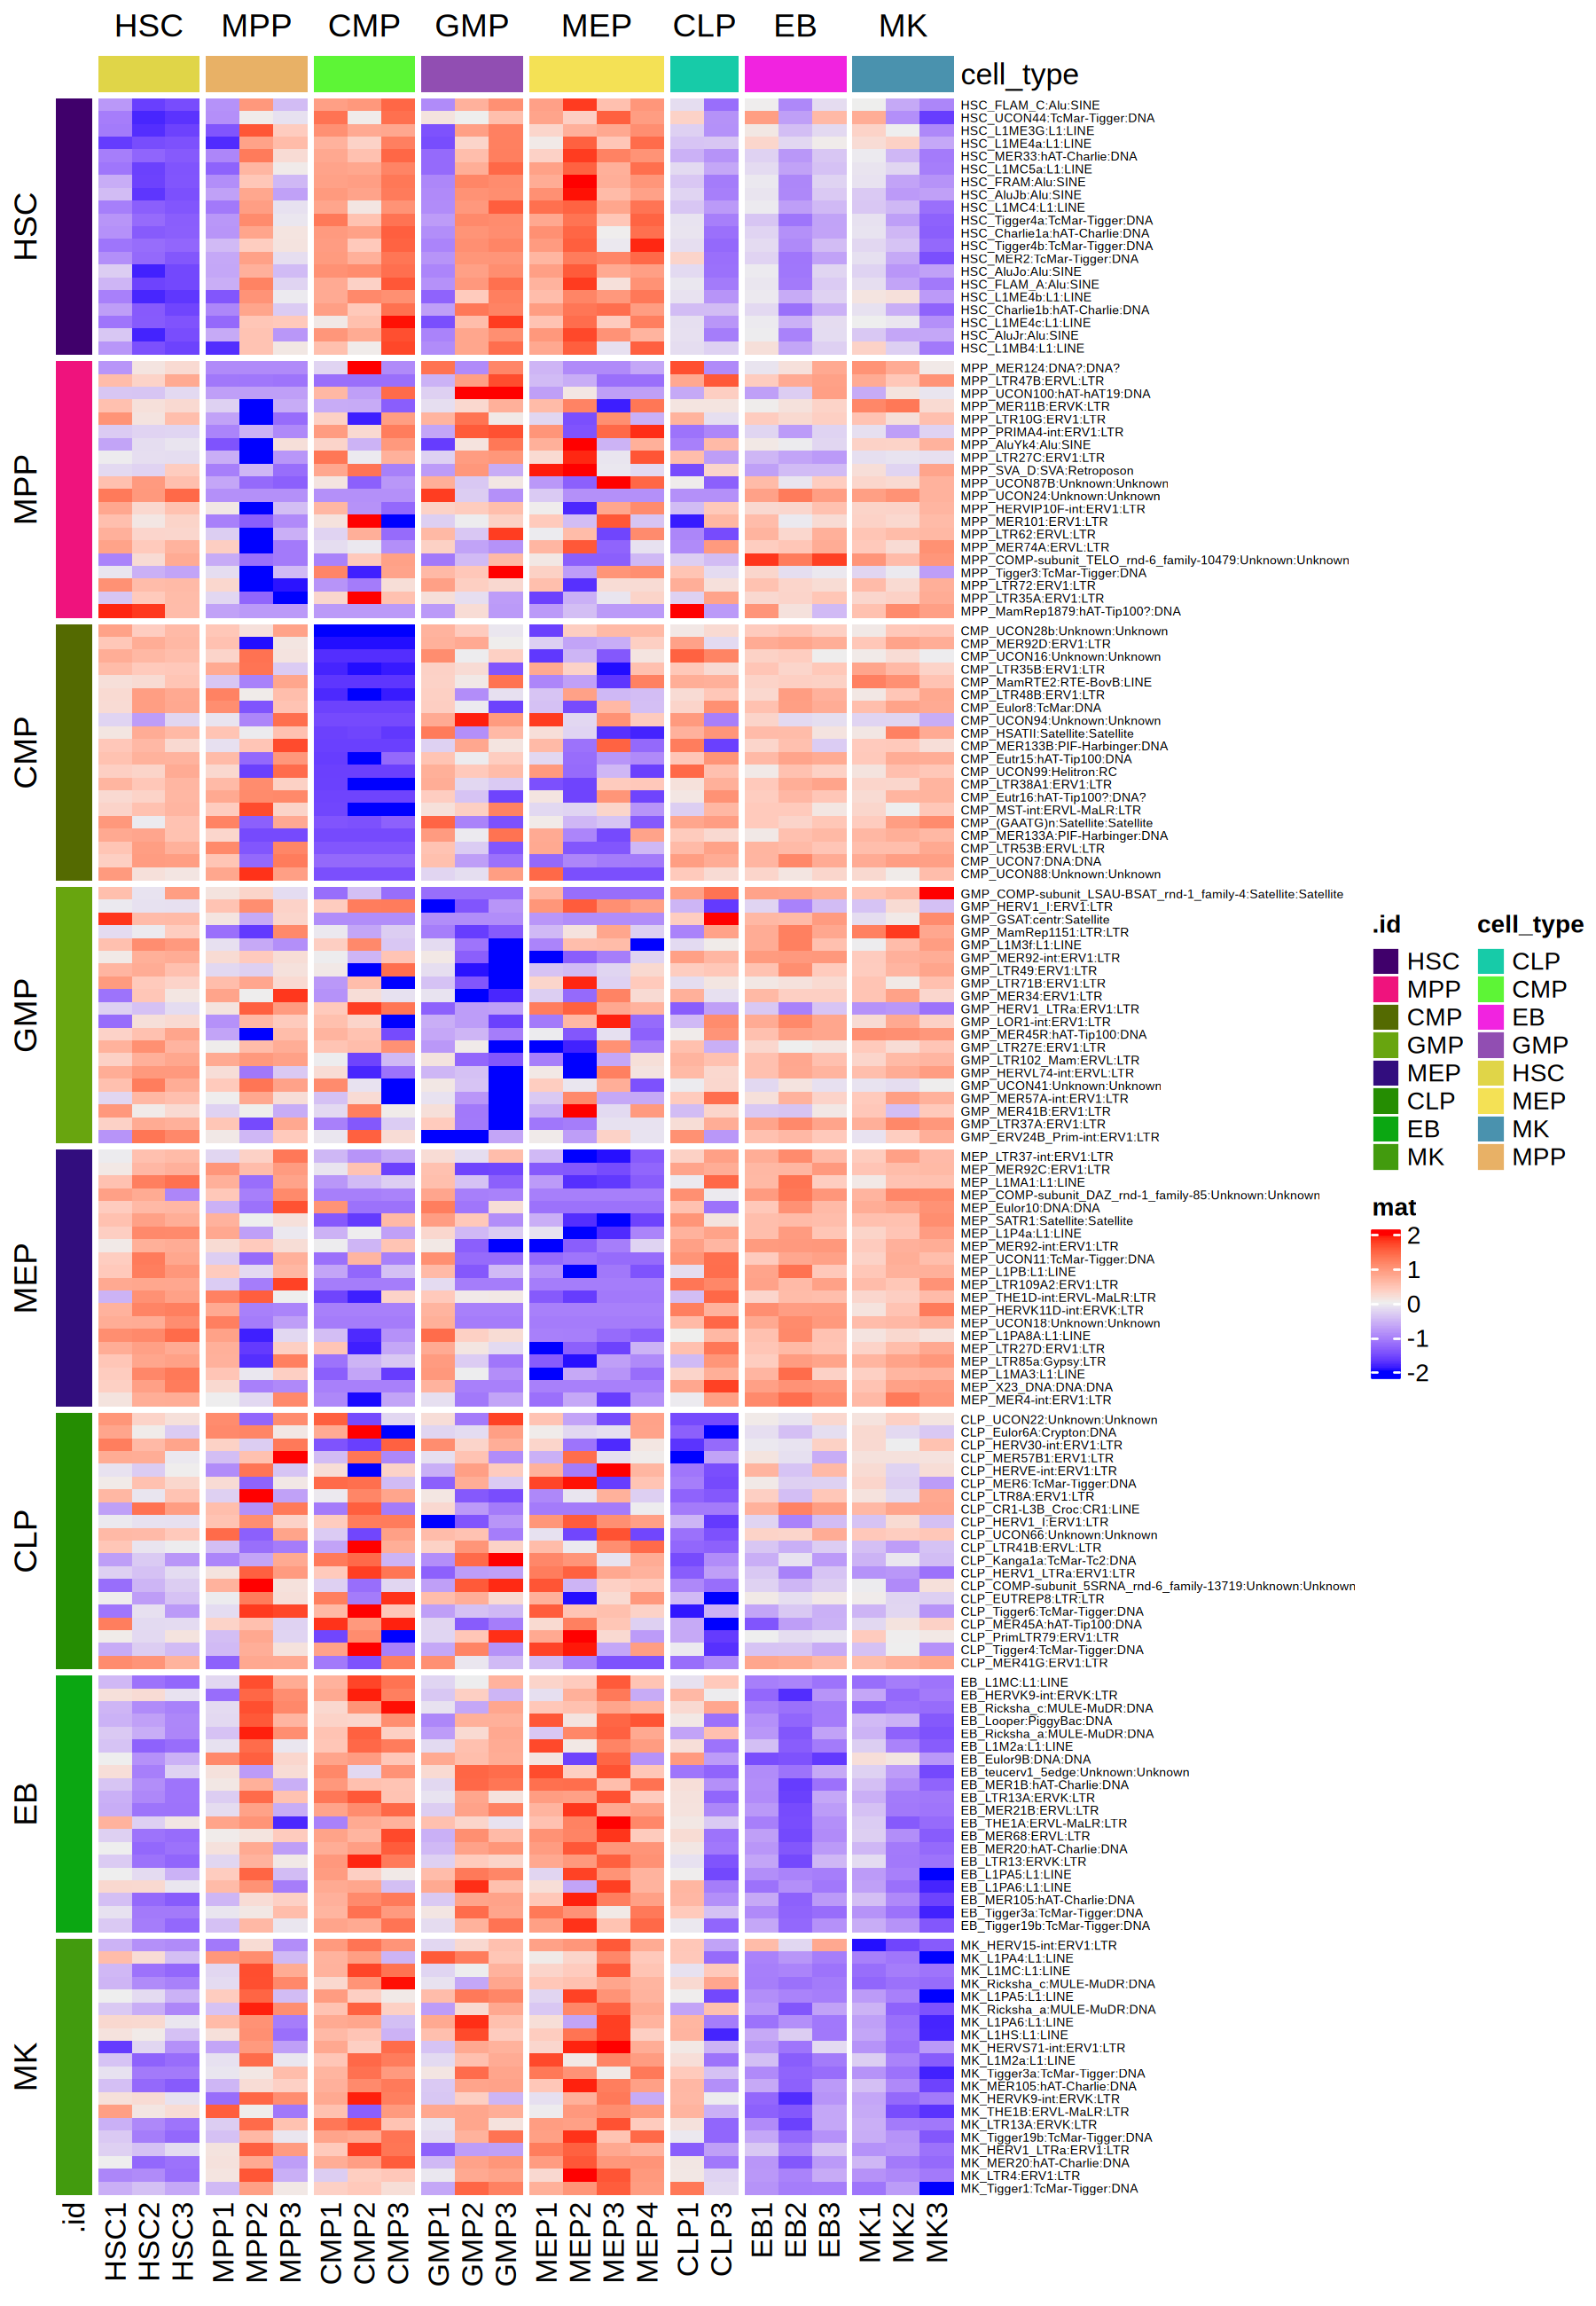

In [701]:
# top 20 up-regulated te genes for each cell type
options(repr.plot.width = 9, repr.plot.height = 13, repr.plot.res = 200)

row_sel = deg_te_dt[logFC < 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_te))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_te[row_sel$rn, rownames(dsn_all_df)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = T, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, row_names_gp = grid::gpar(fontsize = 5), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [114]:
head(row_sel)

.id rn                   logFC     logCPM     PValue     FDR      
1 HSC ERVL-B4-int:ERVL:LTR 0.6461831  8.9661377 0.00995068 0.5944787
2 HSC ACRO1:acro:Satellite 2.7482259 -0.9587067 0.01463087 0.5944787
3 HSC L1PA13:L1:LINE       0.5100995 11.3827194 0.01521246 0.5944787
4 HSC L1PA16:L1:LINE       0.5246390 11.9908499 0.02056969 0.5944787
5 HSC THE1D:ERVL-MaLR:LTR  0.3698013 10.9466090 0.02080387 0.5944787
6 HSC L1PA15:L1:LINE       0.3740317 11.6198445 0.02907687 0.5944787
  ctype_gene              
1 HSC_ERVL-B4-int:ERVL:LTR
2 HSC_ACRO1:acro:Satellite
3 HSC_L1PA13:L1:LINE      
4 HSC_L1PA16:L1:LINE      
5 HSC_THE1D:ERVL-MaLR:LTR 
6 HSC_L1PA15:L1:LINE

# load packages

In [16]:
library(data.table)
library(ggplot2)
library(ggraph)
library(tidygraph)


# organize TE GTF

In [8]:
# import GTF file
te_dt = fread('/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf')
setnames(te_dt, c('chr', 'rmsk', 'exon', 'start', 'end', 'width', 'strand', 'score', 'info'))

# extract IDs for class, family, gene, and tx
te_dt[, gene_id       := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\1', info)]
te_dt[, transcript_id := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\2', info)]
te_dt[, family_id     := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\3', info)]
te_dt[, class_id      := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\4', info)]

# remove the info column for saving storage
te_dt[, info := NULL]

# these results contained all possible relationship between class, family, gene, and transcript IDs
head(te_dt)


chr  rmsk      exon start end  width strand score gene_id  transcript_id  
1 chr1 UCSC_rmsk exon 2710  4402 5119  -      .     TAR1     TAR1_dup164    
2 chr1 UCSC_rmsk exon 4083  4533  962  -      .     LTR60B   LTR60B_dup190  
3 chr1 UCSC_rmsk exon 4534  4660  505  -      .     LTR60B   LTR60B_dup191  
4 chr1 UCSC_rmsk exon 4664  5263 1304  +      .     L1MC3    L1MC3_dup5932  
5 chr1 UCSC_rmsk exon 5275  5528 1403  +      .     MER34C_v MER34C_v_dup375
6 chr1 UCSC_rmsk exon 5529  5686 3544  +      .     L1MC3    L1MC3_dup5932  
  family_id class_id  idd                               
1 subtelo   Satellite TAR1_dup164:TAR1:subtelo:Satellite
2 ERV1      LTR       LTR60B_dup190:LTR60B:ERV1:LTR     
3 ERV1      LTR       LTR60B_dup191:LTR60B:ERV1:LTR     
4 L1        LINE      L1MC3_dup5932:L1MC3:L1:LINE       
5 ERV1      LTR       MER34C_v_dup375:MER34C_v:ERV1:LTR 
6 L1        LINE      L1MC3_dup5932:L1MC3:L1:LINE       
  idd_2                                             
1 chr1_2710_4402__TAR1_dup164:TAR1:subtelo:Satellite
2 chr1_4083_4533__LTR60B_dup190:LTR60B:ERV1:LTR     
3 chr1_4534_4660__LTR60B_dup191:LTR60B:ERV1:LTR     
4 chr1_4664_5263__L1MC3_dup5932:L1MC3:L1:LINE       
5 chr1_5275_5528__MER34C_v_dup375:MER34C_v:ERV1:LTR 
6 chr1_5529_5686__L1MC3_dup5932:L1MC3:L1:LINE

In [9]:
graph_dt = copy(te_dt)

# there were some items with the same family and class IDs, add the family ID with an '_F' 
graph_dt[class_id == family_id, family_id := paste0(family_id, '_F')]
# there were some items with the same family and gene IDs, add the gene ID with an '_G' 
graph_dt[family_id == gene_id, gene_id := paste0(gene_id, '_G')]
# there were some items with the same gene and transcript IDs, add the transcript ID with an '_Tx' 
graph_dt[gene_id == transcript_id, transcript_id := paste0(transcript_id, '_Tx')]

# when the family ID is the same as class ID, and the name changed by adding '_F' as above
# then change these family IDs in the family to gene ID relationship
graph_dt[family_id %in% graph_dt$class_id, family_id := paste0(family_id, '_F')]
# similary for changed gene IDs 
graph_dt[gene_id %in% graph_dt$family_id, gene_id := paste0(family_id, '_G')]
# similary for changed transcript IDs 
graph_dt[transcript_id %in% graph_dt$gene_id, transcript_id := paste0(family_id, '_Tx')]


In [10]:
# Add level one:
# for each class, start with a pseudo 'TE'
tmp1 = graph_dt[!duplicated(class_id), .(class_id)]
setnames(tmp1, 1, 'to')
tmp1[, from := 'TE'] 
tmp1 = relocate(tmp1, 2)
tmp1$lvl = 'lvl1'

# level 2 is from class ID to family ID
tmp2 = graph_dt[!duplicated(family_id), .(class_id, family_id)]
setnames(tmp2, c('from', 'to'))
tmp2$lvl = 'lvl2'

# level 3 is from family ID to gene ID
tmp3 = graph_dt[!duplicated(gene_id), .(family_id, gene_id)]
setnames(tmp3, c('from', 'to'))
tmp3$lvl = 'lvl3'

# level 4 is from gene ID to transcript ID
tmp4 = graph_dt[!duplicated(transcript_id), .(gene_id, transcript_id)]
setnames(tmp4, c('from', 'to'))
tmp4$lvl = 'lvl4'

graph_dt_2 = rbindlist(list(tmp1, tmp2, tmp3, tmp4), use.names=TRUE )
graph_dt_2[, from_ori := from]
graph_dt_2[, to_ori := to]

graph_dt = copy(graph_dt_2)
remove(graph_dt_2)


# a test plot

Warning message:
"Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead."


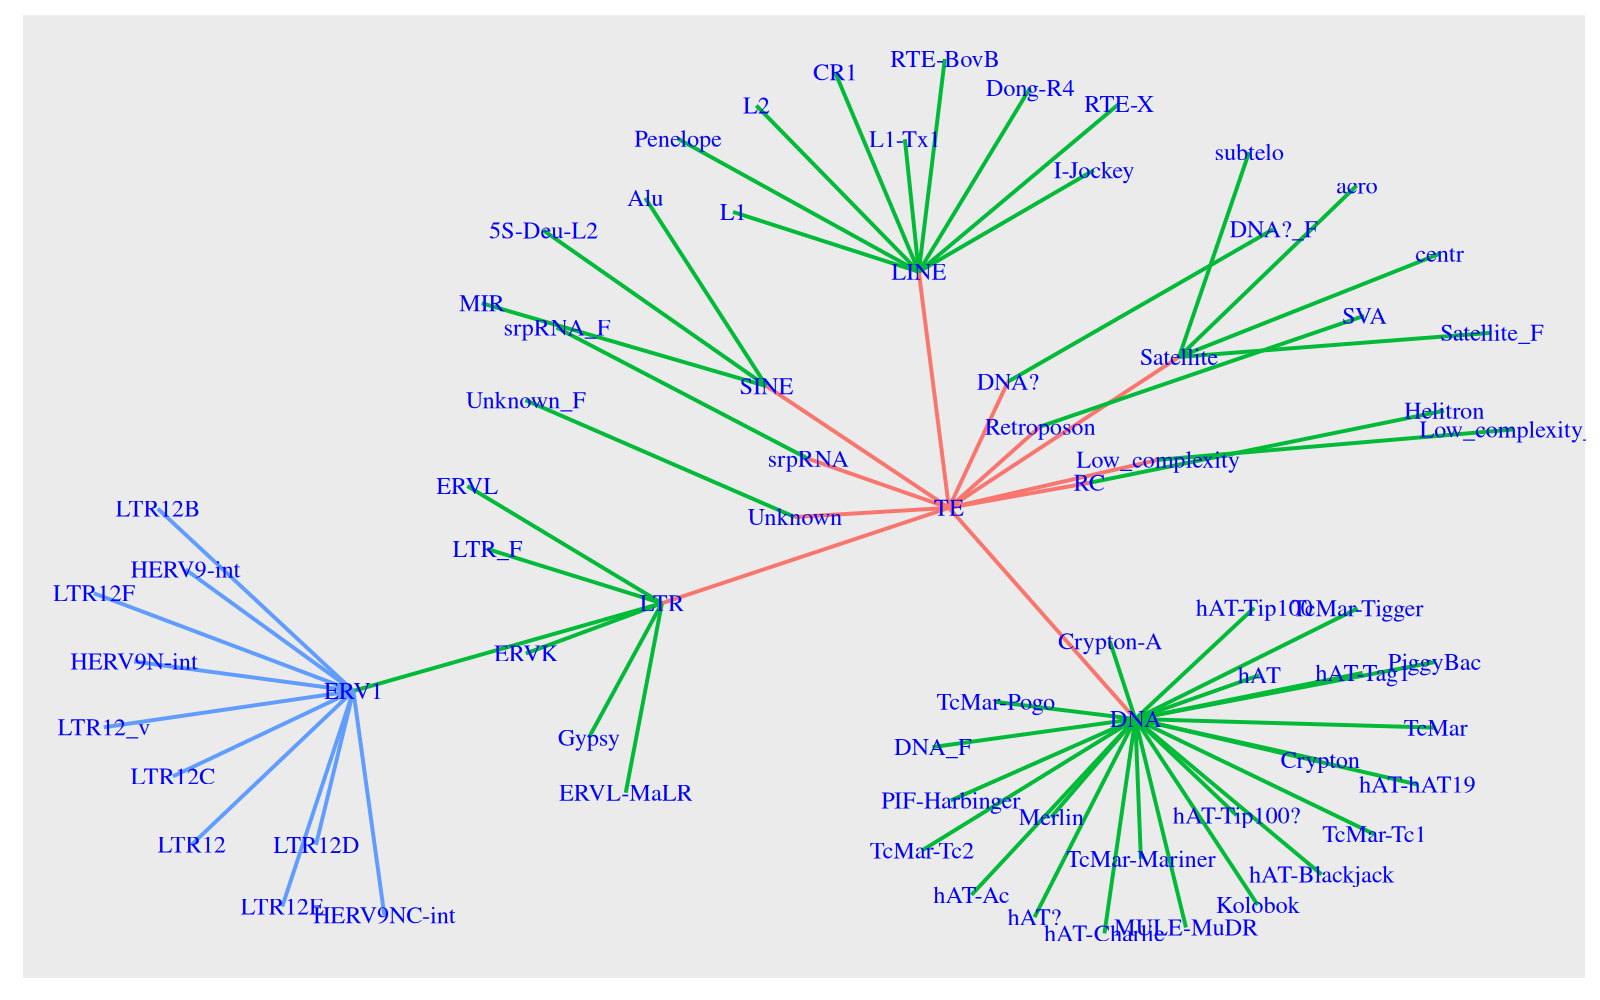

In [15]:
plotdat0 = graph_dt[lvl %in% c('lvl1', 'lvl2'), ] 
plotdat1 = graph_dt[grepl('HERV9', to) & lvl == 'lvl3', ] 
plotdat2 = graph_dt[grepl('LTR12', to) & lvl == 'lvl3', ] 
plotdat = rbind(plotdat0, plotdat1, plotdat2)
plotdat = as_tbl_graph(plotdat)

options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)
ggraph(plotdat, layout = 'stress') +  geom_edge_link(aes(colour = factor(lvl))) +  #geom_node_point() + 
  geom_node_text(aes(label = name),  colour = 'blue', size=3, show.legend = FALSE, family = "serif") + theme(legend.position = "none")


In [841]:
telocal_list = lapply(1:nrow(dsn6), function (xx) {
    fname = dsn6[xx, telocal_count_file_ori]
    tmp = fread(fname)
    setnames(tmp, 1, 'gene')
    setnames(tmp, 2, 'count')
})


In [842]:
head(dsn6$sample_name_id)

[1] "MEP1" "EB1"  "EB1"  "EB1"  "MK1"  "MK1"

In [843]:
names(telocal_list) = dsn6$sample_name_id
telocal_dt = rbindlist(telocal_list, idcol = T)


In [846]:
telocal_dt[1:10, ]

.id  gene                                         count tag                                               count_agg
1  CLP1 (CATTC)n:(CATTC)n:Satellite:Satellite         0    CLP1_(CATTC)n:(CATTC)n:Satellite:Satellite         0       
2  CLP1 (CATTC)n_dup100:(CATTC)n:Satellite:Satellite 14    CLP1_(CATTC)n_dup100:(CATTC)n:Satellite:Satellite 14       
3  CLP1 (CATTC)n_dup101:(CATTC)n:Satellite:Satellite  7    CLP1_(CATTC)n_dup101:(CATTC)n:Satellite:Satellite  7       
4  CLP1 (CATTC)n_dup102:(CATTC)n:Satellite:Satellite  3    CLP1_(CATTC)n_dup102:(CATTC)n:Satellite:Satellite  3       
5  CLP1 (CATTC)n_dup103:(CATTC)n:Satellite:Satellite 19    CLP1_(CATTC)n_dup103:(CATTC)n:Satellite:Satellite 19       
6  CLP1 (CATTC)n_dup104:(CATTC)n:Satellite:Satellite 27    CLP1_(CATTC)n_dup104:(CATTC)n:Satellite:Satellite 27       
7  CLP1 (CATTC)n_dup105:(CATTC)n:Satellite:Satellite  9    CLP1_(CATTC)n_dup105:(CATTC)n:Satellite:Satellite  9       
8  CLP1 (CATTC)n_dup106:(CATTC)n:Satellite:Satellite 79    CLP1_(CATTC)n_dup106:(CATTC)n:Satellite:Satellite 79       
9  CLP1 (CATTC)n_dup107:(CATTC)n:Satellite:Satellite 44    CLP1_(CATTC)n_dup107:(CATTC)n:Satellite:Satellite 44       
10 CLP1 (CATTC)n_dup108:(CATTC)n:Satellite:Satellite 38    CLP1_(CATTC)n_dup108:(CATTC)n:Satellite:Satellite 38

In [845]:
# there are multiple bam file for a same cell type sample, aggregate them
telocal_dt[, tag := paste0(.id, '_', gene)]
telocal_dt[, count_agg := sum(.SD$count), by = 'tag' ]
setkey(telocal_dt, 'tag')
telocal_dt_agg = telocal_dt[!duplicated(tag), ]


In [847]:
rm(telocal_list, telocal_dt)


In [848]:
telocal_dt_w = dcast(gene ~ .id, value.var = 'count_agg', data = telocal_dt_agg)


In [850]:
te_dt[1:3, ]

chr  rmsk      exon start end  width strand score gene_id transcript_id family_id class_id  idd                               
1 chr1 UCSC_rmsk exon 2710  4402 5119  -      .     TAR1    TAR1_dup164   subtelo   Satellite TAR1_dup164:TAR1:subtelo:Satellite
2 chr1 UCSC_rmsk exon 4083  4533  962  -      .     LTR60B  LTR60B_dup190 ERV1      LTR       LTR60B_dup190:LTR60B:ERV1:LTR     
3 chr1 UCSC_rmsk exon 4534  4660  505  -      .     LTR60B  LTR60B_dup191 ERV1      LTR       LTR60B_dup191:LTR60B:ERV1:LTR

In [ ]:
con <- dbConnect(RSQLite::SQLite(), "data/bluepring_telocal.sqlite")
dbWriteTable(con, "bp_telocal_agg", telocal_dt_agg)
dbSendStatement(con, 'CREATE INDEX `fk_agg_tag` ON `bp_telocal_agg` (`tag` ASC);')
#dbWriteTable(con, "te_gtf", te_dt)
dbWriteTable(con, "bp_telocal_wide", telocal_dt_w)


In [855]:
telocal_dt_agg[1:10, ]

.id  gene                                         count tag                                               count_agg
1  CLP1 (CATTC)n:(CATTC)n:Satellite:Satellite         0    CLP1_(CATTC)n:(CATTC)n:Satellite:Satellite         0       
2  CLP1 (CATTC)n_dup100:(CATTC)n:Satellite:Satellite 14    CLP1_(CATTC)n_dup100:(CATTC)n:Satellite:Satellite 14       
3  CLP1 (CATTC)n_dup101:(CATTC)n:Satellite:Satellite  7    CLP1_(CATTC)n_dup101:(CATTC)n:Satellite:Satellite  7       
4  CLP1 (CATTC)n_dup102:(CATTC)n:Satellite:Satellite  3    CLP1_(CATTC)n_dup102:(CATTC)n:Satellite:Satellite  3       
5  CLP1 (CATTC)n_dup103:(CATTC)n:Satellite:Satellite 19    CLP1_(CATTC)n_dup103:(CATTC)n:Satellite:Satellite 19       
6  CLP1 (CATTC)n_dup104:(CATTC)n:Satellite:Satellite 27    CLP1_(CATTC)n_dup104:(CATTC)n:Satellite:Satellite 27       
7  CLP1 (CATTC)n_dup105:(CATTC)n:Satellite:Satellite  9    CLP1_(CATTC)n_dup105:(CATTC)n:Satellite:Satellite  9       
8  CLP1 (CATTC)n_dup106:(CATTC)n:Satellite:Satellite 79    CLP1_(CATTC)n_dup106:(CATTC)n:Satellite:Satellite 79       
9  CLP1 (CATTC)n_dup107:(CATTC)n:Satellite:Satellite 44    CLP1_(CATTC)n_dup107:(CATTC)n:Satellite:Satellite 44       
10 CLP1 (CATTC)n_dup108:(CATTC)n:Satellite:Satellite 38    CLP1_(CATTC)n_dup108:(CATTC)n:Satellite:Satellite 38

In [851]:
rs <- dbGetQuery(con, 'SELECT * FROM te_gtf limit 3 ')
rs


Warning message:
"Closing open result set, pending rows"


chr  rmsk      exon start end  width strand score gene_id transcript_id family_id class_id  idd                               
1 chr1 UCSC_rmsk exon 2710  4402 5119  -      .     TAR1    TAR1_dup164   subtelo   Satellite TAR1_dup164:TAR1:subtelo:Satellite
2 chr1 UCSC_rmsk exon 4083  4533  962  -      .     LTR60B  LTR60B_dup190 ERV1      LTR       LTR60B_dup190:LTR60B:ERV1:LTR     
3 chr1 UCSC_rmsk exon 4534  4660  505  -      .     LTR60B  LTR60B_dup191 ERV1      LTR       LTR60B_dup191:LTR60B:ERV1:LTR

## filter TElocal

In [856]:
cell_types
sample_names

[1] "HSC" "MPP" "CMP" "GMP" "MEP" "CLP" "EB"  "MK"

[1] "HSC1" "HSC2" "HSC3" "MPP1" "MPP2" "MPP3" "CMP1" "CMP2" "CMP3" "GMP1" "GMP2" "GMP3" "MEP1" "MEP2" "MEP3" "MEP4" "CLP1" "CLP2" "CLP3" "EB1"  "EB2"  "EB3"  "MK1"  "MK2"  "MK3"

In [857]:
telocal_dt_w[1:10, ]

gene                                         CLP1 CLP2 CLP3 CMP1 CMP2 CMP3 EB1 EB2 EB3 ⋯ MEP1 MEP2 MEP3 MEP4 MK1 MK2 MK3 MPP1 MPP2 MPP3
1  (CATTC)n:(CATTC)n:Satellite:Satellite         0   0     0   0    0    0    0    0  0   ⋯  0   0    0    0    0    1    0  0   0     0  
2  (CATTC)n_dup100:(CATTC)n:Satellite:Satellite 14   1     9   0    0    0    2    2  1   ⋯  1   0    0    0    1    8   34 35   0     7  
3  (CATTC)n_dup101:(CATTC)n:Satellite:Satellite  7   0    15   0    0    0    2    0  2   ⋯  1   0    0    0    2   22   44 28   0     3  
4  (CATTC)n_dup102:(CATTC)n:Satellite:Satellite  3   0     3   0    0    0    1    4  2   ⋯  0   0    0    0    2    9   19  1   0     5  
5  (CATTC)n_dup103:(CATTC)n:Satellite:Satellite 19   0    19   0    0    0    1    2  2   ⋯  1   0    0    0    2   11   41 37   0     4  
6  (CATTC)n_dup104:(CATTC)n:Satellite:Satellite 27   5    10   0    0    0    4    4  5   ⋯  0   0    0    0    5   22   64 24   0     2  
7  (CATTC)n_dup105:(CATTC)n:Satellite:Satellite  9   0    10   0    0    0    7   11  4   ⋯  0   0    0    0    7    3   99 19   0     5  
8  (CATTC)n_dup106:(CATTC)n:Satellite:Satellite 79   8    12   0    0    0    2    6  2   ⋯  0   0    0    0    7    9   68 34   0     8  
9  (CATTC)n_dup107:(CATTC)n:Satellite:Satellite 44   0    45   0    0    0    5    6  8   ⋯ 16   0    0    0    4   10  161 35   0    10  
10 (CATTC)n_dup108:(CATTC)n:Satellite:Satellite 38   0     7   0    0    0    4    3  1   ⋯  0   0    0    0    1    3   42 24   0     4

In [859]:
dim(telocal_dt_w)

length(intersect(telocal_dt_w$gene, te_dt$idd))


[1] 3845463      26

[1] 3787949

In [858]:
# make small table to get the family & class information separately for filtering with the deg_te_dt_sel
telocal_dt_w_meta = data.table(gene = telocal_dt_w$gene)
telocal_dt_w_meta[, class_id := unlist(strsplit(gene, ':'))[4], by = 1:nrow(telocal_dt_w_meta)]
telocal_dt_w_meta[, family_id:= unlist(strsplit(gene, ':'))[3], by = 1:nrow(telocal_dt_w_meta)]
telocal_dt_w_meta[, sub_family_id := unlist(strsplit(gene, ':'))[2], by = 1:nrow(telocal_dt_w_meta)]
telocal_dt_w_meta[, gene_id  := unlist(strsplit(gene, ':'))[1], by = 1:nrow(telocal_dt_w_meta)]
telocal_dt_w_meta[, nn := length(unlist(strsplit(gene, ':'))), by = 1:nrow(telocal_dt_w_meta)]
telocal_dt_w_meta[, ifTE := T]
telocal_dt_w_meta[gene %in% coding_genes, ifTE := F]
head(telocal_dt_w_meta) 
head(telocal_dt_w_meta) 

## HERE Mark

gene                                         class_id  family_id sub_family_id gene_id         nn ifTE
1 (CATTC)n:(CATTC)n:Satellite:Satellite        Satellite Satellite (CATTC)n      (CATTC)n        4  TRUE
2 (CATTC)n_dup100:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup100 4  TRUE
3 (CATTC)n_dup101:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup101 4  TRUE
4 (CATTC)n_dup102:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup102 4  TRUE
5 (CATTC)n_dup103:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup103 4  TRUE
6 (CATTC)n_dup104:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup104 4  TRUE

gene                                         class_id  family_id sub_family_id gene_id         nn ifTE
1 (CATTC)n:(CATTC)n:Satellite:Satellite        Satellite Satellite (CATTC)n      (CATTC)n        4  TRUE
2 (CATTC)n_dup100:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup100 4  TRUE
3 (CATTC)n_dup101:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup101 4  TRUE
4 (CATTC)n_dup102:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup102 4  TRUE
5 (CATTC)n_dup103:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup103 4  TRUE
6 (CATTC)n_dup104:(CATTC)n:Satellite:Satellite Satellite Satellite (CATTC)n      (CATTC)n_dup104 4  TRUE

In [434]:
intersect(telocal_dt_w_meta$class_id, deg_te_dt$class_id)

[1] "Satellite"  "SINE"       "DNA"        "LINE"       "Unknown"    "LTR"        "DNA?"       "RC"         "Retroposon"

In [439]:
length(unique(intersect(telocal_dt_w_meta$family_id, deg_te_dt$family_id)))
length(unique(intersect(telocal_dt_w_meta$sub_family_id, deg_te_dt_sel$gene_id)))


[1] 45

[1] 245

In [437]:
length(unique(deg_te_dt_sel$gene_id))

[1] 245

In [430]:
table(telocal_dt_w_meta$nn)


      1       4 
  57514 4711929 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        1       11      365       71 35431864 

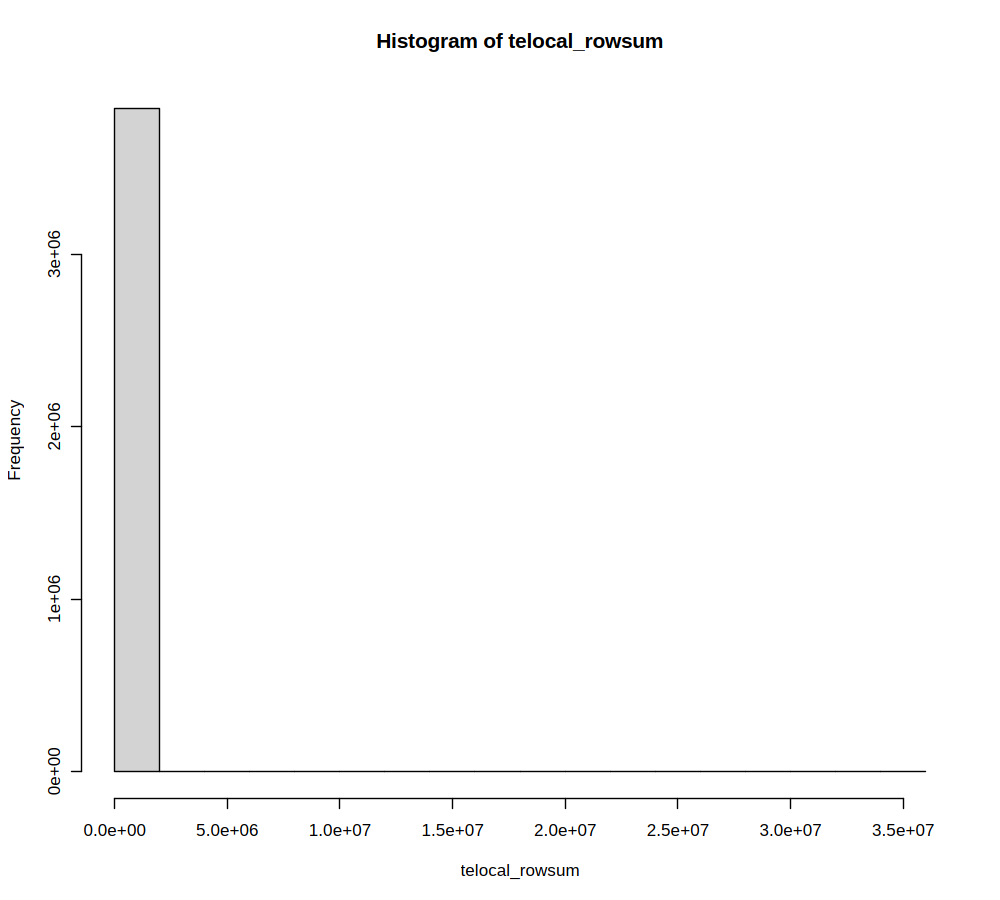

In [860]:
# calculate row sum
telocal_rowsum = rowSums(telocal_dt_w[, 2:ncol(telocal_dt_w)])
summary(telocal_rowsum)
hist(telocal_rowsum)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.2      1.4     16.2      7.7 785068.5 

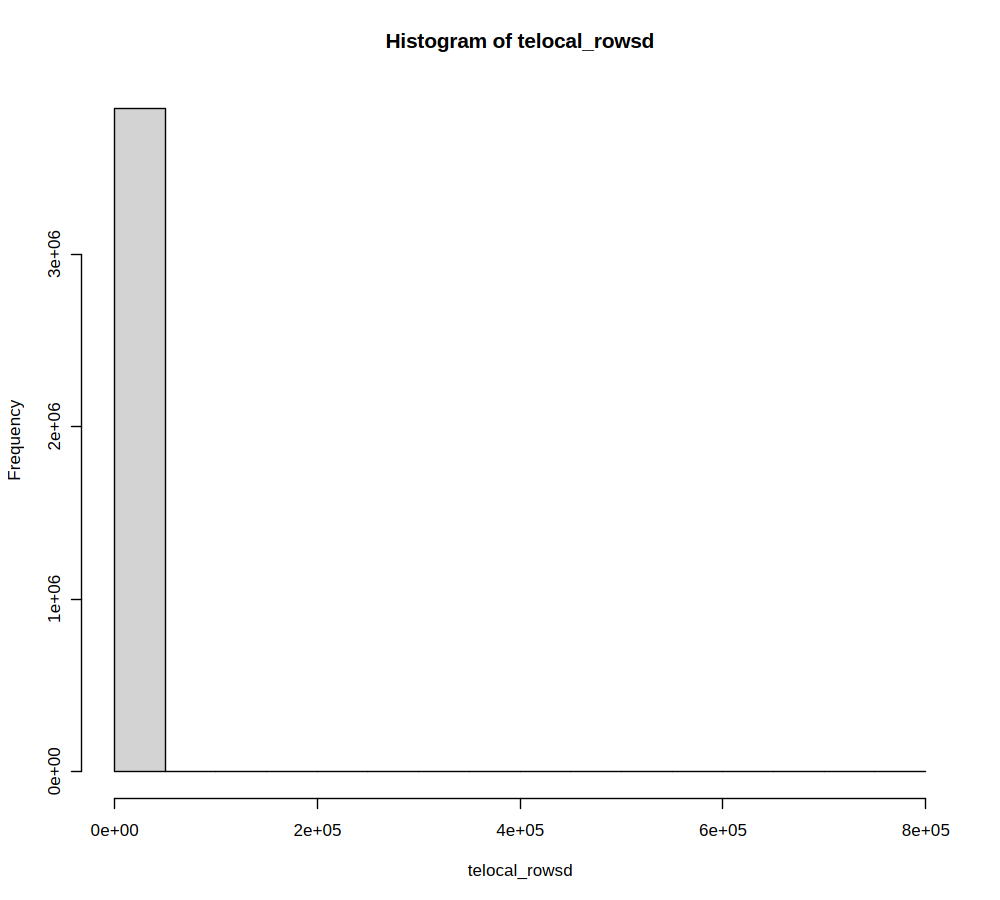

In [861]:
# calculate row variation SD
telocal_rowsd = rowSds(telocal_dt_w[, 2:ncol(telocal_dt_w)])
summary(telocal_rowsd)
hist(telocal_rowsd)


In [866]:
# select the highly changed TEs based on the bluepring results: deg_te_dt_sel
# select the TEs expression > median 
telocal_dt_w_sel = telocal_dt_w[telocal_dt_w_meta$sub_family_id %in% deg_te_dt_sel$gene_id & telocal_rowsd > 16.2 & telocal_rowsum > 365, ] 
telocal_dt_w_sel = telocal_dt_w_sel[!(gene %in% coding_genes), c('gene', sample_names), with = F]
dim(telocal_dt_w_sel) 


[1] 42850    26

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    366     461     623    1088     994  565249 

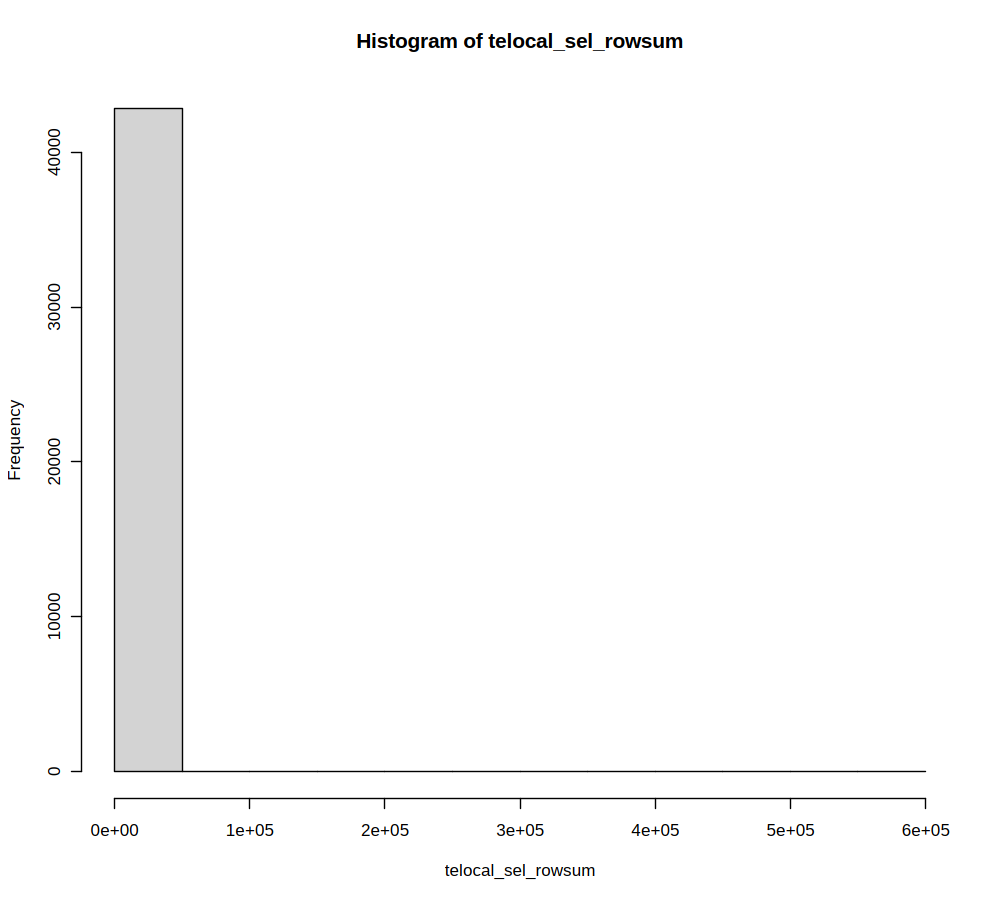

In [867]:
# calculate row sum
telocal_sel_rowsum = rowSums(telocal_dt_w_sel[, 2:ncol(telocal_dt_w_sel)])
summary(telocal_sel_rowsum)
hist(telocal_sel_rowsum)


In [868]:
telocal_dt_w_sel[1:10, 1:10]

gene                                         HSC1 HSC2 HSC3 MPP1 MPP2 MPP3 CMP1 CMP2 CMP3
1  (CATTC)n_dup104:(CATTC)n:Satellite:Satellite  36   3    8    24  0     2   0    0    0   
2  (CATTC)n_dup106:(CATTC)n:Satellite:Satellite  56   1   13    34  0     8   0    0    0   
3  (CATTC)n_dup107:(CATTC)n:Satellite:Satellite  29   3   23    35  0    10   0    0    0   
4  (CATTC)n_dup109:(CATTC)n:Satellite:Satellite 188  10   28    46  0    19   0    0    0   
5  (CATTC)n_dup113:(CATTC)n:Satellite:Satellite  46   2   14   130  0    25   0    0    0   
6  (CATTC)n_dup115:(CATTC)n:Satellite:Satellite  31   5   23    57  0    20   0    0    0   
7  (CATTC)n_dup122:(CATTC)n:Satellite:Satellite  71   4   30    52  0    28   0    0    0   
8  (CATTC)n_dup93:(CATTC)n:Satellite:Satellite   57   3   10    47  0     3   0    0    0   
9  (CATTC)n_dup96:(CATTC)n:Satellite:Satellite   60   0   16    21  0    12   0    0    0   
10 (GAATG)n_dup114:(GAATG)n:Satellite:Satellite 138   3   11    22  0    21   0    0    0

In [869]:
dim(telocal_dt_w_sel)


[1] 42850    26

In [878]:
dim(telocal_dt_w)

[1] 3845463      26

In [877]:
saveRDS(telocal_dt_w_sel, file = 'data/telocal_dt_w_sel.rds')
saveRDS(telocal_dt_w, file = 'data/telocal_dt_w.rds')


## telocal DEG

In [870]:
dsn_telocal = data.frame(cell_type = sub('\\d+', '', sample_names_n24), row.names = sample_names_n24)
telocal_dt_w_sel_mtx = setDF(telocal_dt_w_sel[, 2:ncol(telocal_dt_w_sel)], rownames = telocal_dt_w_sel$gene)
telocal_dt_w_sel_mtx = telocal_dt_w_sel_mtx[, rownames(dsn_telocal)]
dim(telocal_dt_w_sel_mtx)
dim(dsn_telocal)


[1] 42850    24

[1] 24  1

In [900]:
dim(telocal_dt_w_sel[gene %in% coding_genes, ])

[1]  0 26

In [875]:
saveRDS(telocal_dt_w_sel_mtx, file = 'data/telocal_dt_w_sel_mtx.rds')


In [874]:
dim(telocal_dt_w_sel_mtx)
head(telocal_dt_w_sel_mtx)


[1] 42850    24

HSC1 HSC2 HSC3 MPP1 MPP2 MPP3 CMP1 CMP2 CMP3 GMP1 ⋯ MEP3 MEP4 CLP1 CLP3 EB1 EB2 EB3 MK1 MK2 MK3
(CATTC)n_dup104:(CATTC)n:Satellite:Satellite  36   3    8    24  0     2   0    0    0    152  ⋯ 0    0     27  10   4    4  5   5   22   64
(CATTC)n_dup106:(CATTC)n:Satellite:Satellite  56   1   13    34  0     8   0    0    0     61  ⋯ 0    0     79  12   2    6  2   7    9   68
(CATTC)n_dup107:(CATTC)n:Satellite:Satellite  29   3   23    35  0    10   0    0    0     81  ⋯ 0    0     44  45   5    6  8   4   10  161
(CATTC)n_dup109:(CATTC)n:Satellite:Satellite 188  10   28    46  0    19   0    0    0    210  ⋯ 0    0    105  26   1    5  5   4   21   95
(CATTC)n_dup113:(CATTC)n:Satellite:Satellite  46   2   14   130  0    25   0    0    0    165  ⋯ 0    0     46  27   3   16  4   5   36   81
(CATTC)n_dup115:(CATTC)n:Satellite:Satellite  31   5   23    57  0    20   0    0    0     77  ⋯ 0    0     31  69   7   10  8   6   51  125

In [871]:
# get logcpm
subtype = factor(dsn_telocal$cell_type, levels = c(cell_types))

dge = DGEList(counts=telocal_dt_w_sel_mtx, group = subtype)
dge <- calcNormFactors(dge)

keep = filterByExpr(dge)
dge = dge[keep, , keep.lib.sizes=FALSE]
dge = normLibSizes(dge)
design = model.matrix( ~ 0 + subtype)
dge = estimateDisp(dge, design)

logcpm_telocal = log1p(cpm(dge, normalize = T))
saveRDS(dge, file = 'data/dge_telocal.rds')
saveRDS(logcpm_telocal, file = 'data/logcpm_telocal.rds')


In [879]:
deg_telocal_list = lapply(cell_types, function(cc){
    dsn_telocal$ctype = 'Other'
    dsn_telocal$ctype[dsn_telocal$cell_type == cc] = cc
    dsn_telocal$ctype = factor(dsn_telocal$ctype, levels = c('Other', cc))

    subtype = factor(dsn_telocal$ctype, levels = c('Other', cc))

    dge = DGEList(counts=telocal_dt_w_sel_mtx, group = subtype)
    dge <- calcNormFactors(dge)

    keep = filterByExpr(dge)
    dge = dge[keep, , keep.lib.sizes=FALSE]
    dge = normLibSizes(dge)
    design = model.matrix( ~ 0 + subtype)
    dge = estimateDisp(dge, design)
    et <- exactTest(dge)
    deg = topTags(et, n = length(keep))
    deg = as.data.table(deg$table, keep.rownames = T)
    deg
})



In [880]:
names(deg_telocal_list) = cell_types
deg_telocal_dt = rbindlist(deg_telocal_list, idcol = T)

In [881]:
saveRDS(deg_telocal_dt, file = 'data/deg_telocal_list_may15.rds')
fwrite(deg_telocal_dt, file = 'data/deg_telocal_dt_may15.xls', sep = '\t')


In [891]:
tmp

CLP1     CLP2     CLP3     CMP1     CMP2     CMP3      EB1      EB2      EB3     GMP1     GMP2     GMP3     HSC1     HSC2     HSC3     MEP1     MEP2     MEP3     MEP4      MK1 
62738917 47458840 50445076 72828888 70367504 60301543 47134744 44364558 43366495 64222432 62776036 48885681 64075000 28913455 29999466 57108018 70973762 61398705 63961689 53992948 
     MK2      MK3     MPP1     MPP2     MPP3 
52707767 62206944 60996972 70992529 53129546

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.91   32.05   38.95   43.49   50.12  203.26 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4041  1.3548  1.5135  1.5243  1.6925  2.8716 

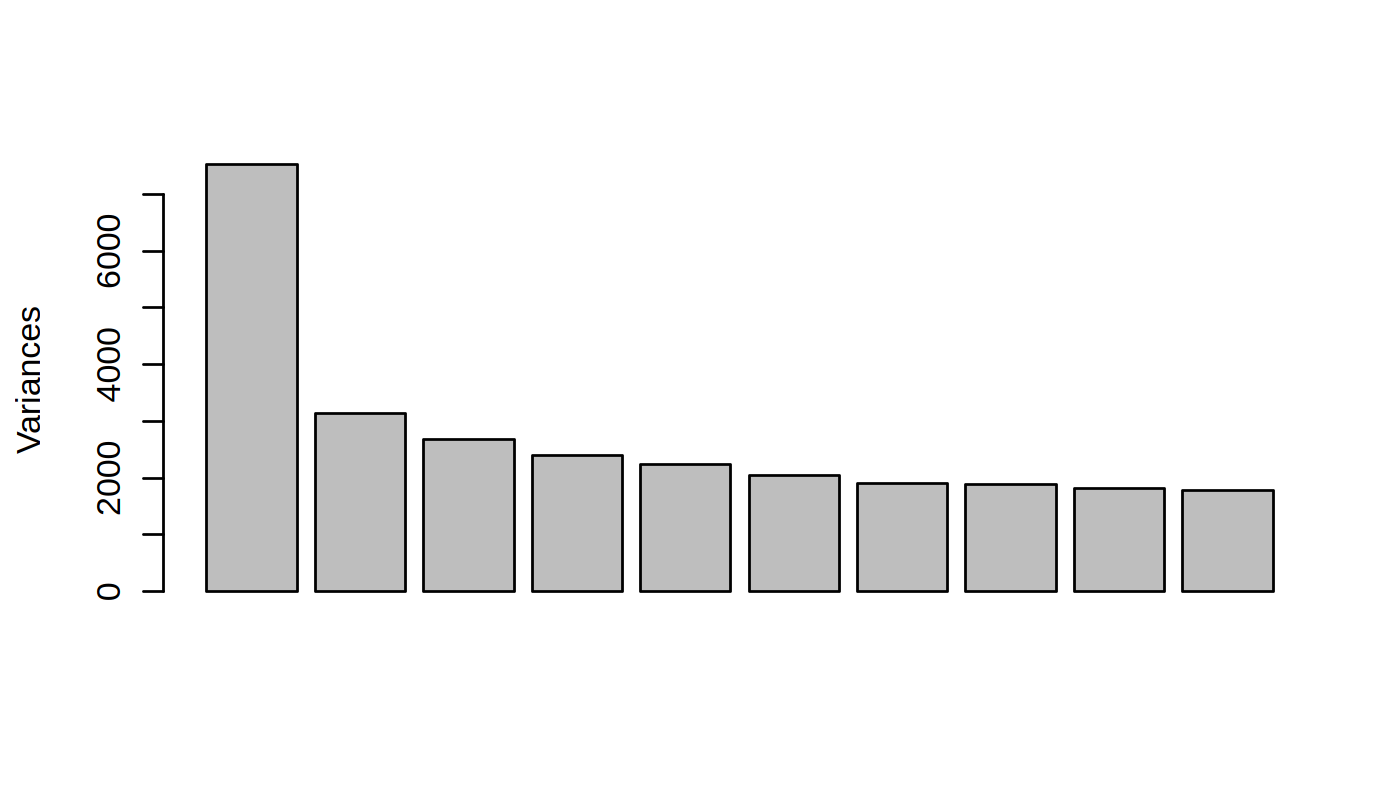

In [895]:
rsum = rowSums(logcpm_telocal)
rsd  = rowSds(logcpm_telocal)
summary(rsum)
summary(rsd)

plotdat = logcpm_telocal[rsum > 41 & rsd > .75, ]
plotdat = scale(plotdat, scale = F, center = T)
plotdat = prcomp(t(plotdat))
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)
plot(plotdat, main = '')


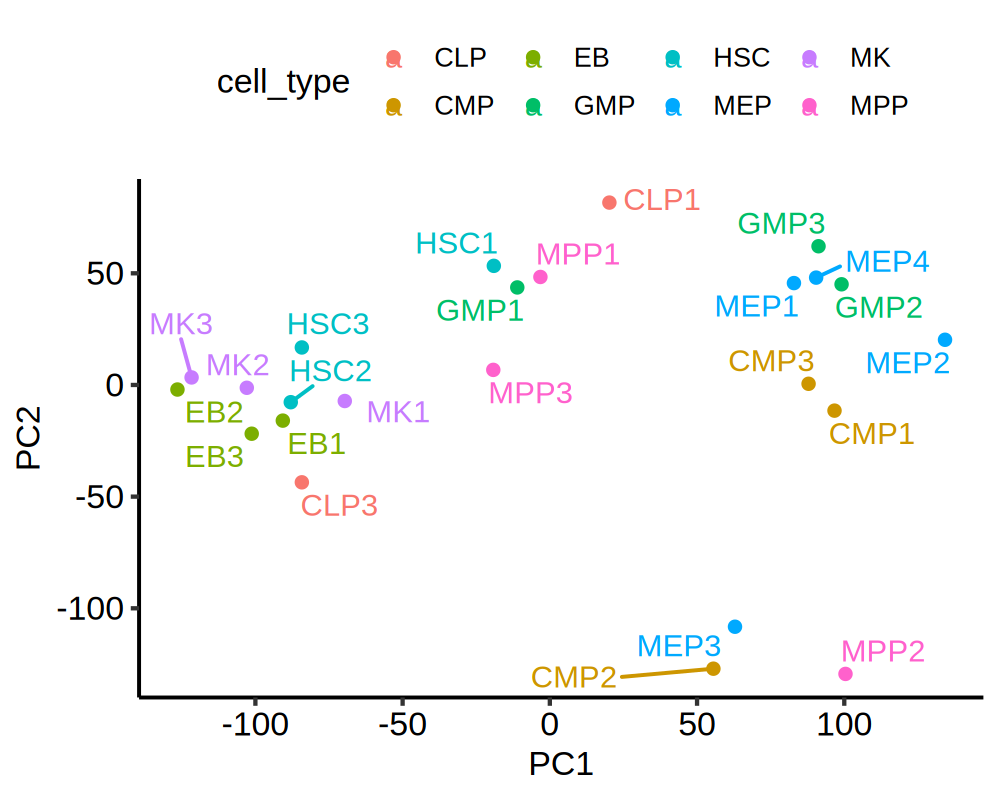

In [896]:
plotdat_x = as.data.table(plotdat$x, keep.rownames = T)
plotdat_x[, cell_type := sub('\\d+', '', rn)]

options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)
ggplot(plotdat_x, aes(PC1, PC2, label = rn, color = cell_type)) + geom_point() + theme_pubr() + geom_text_repel()


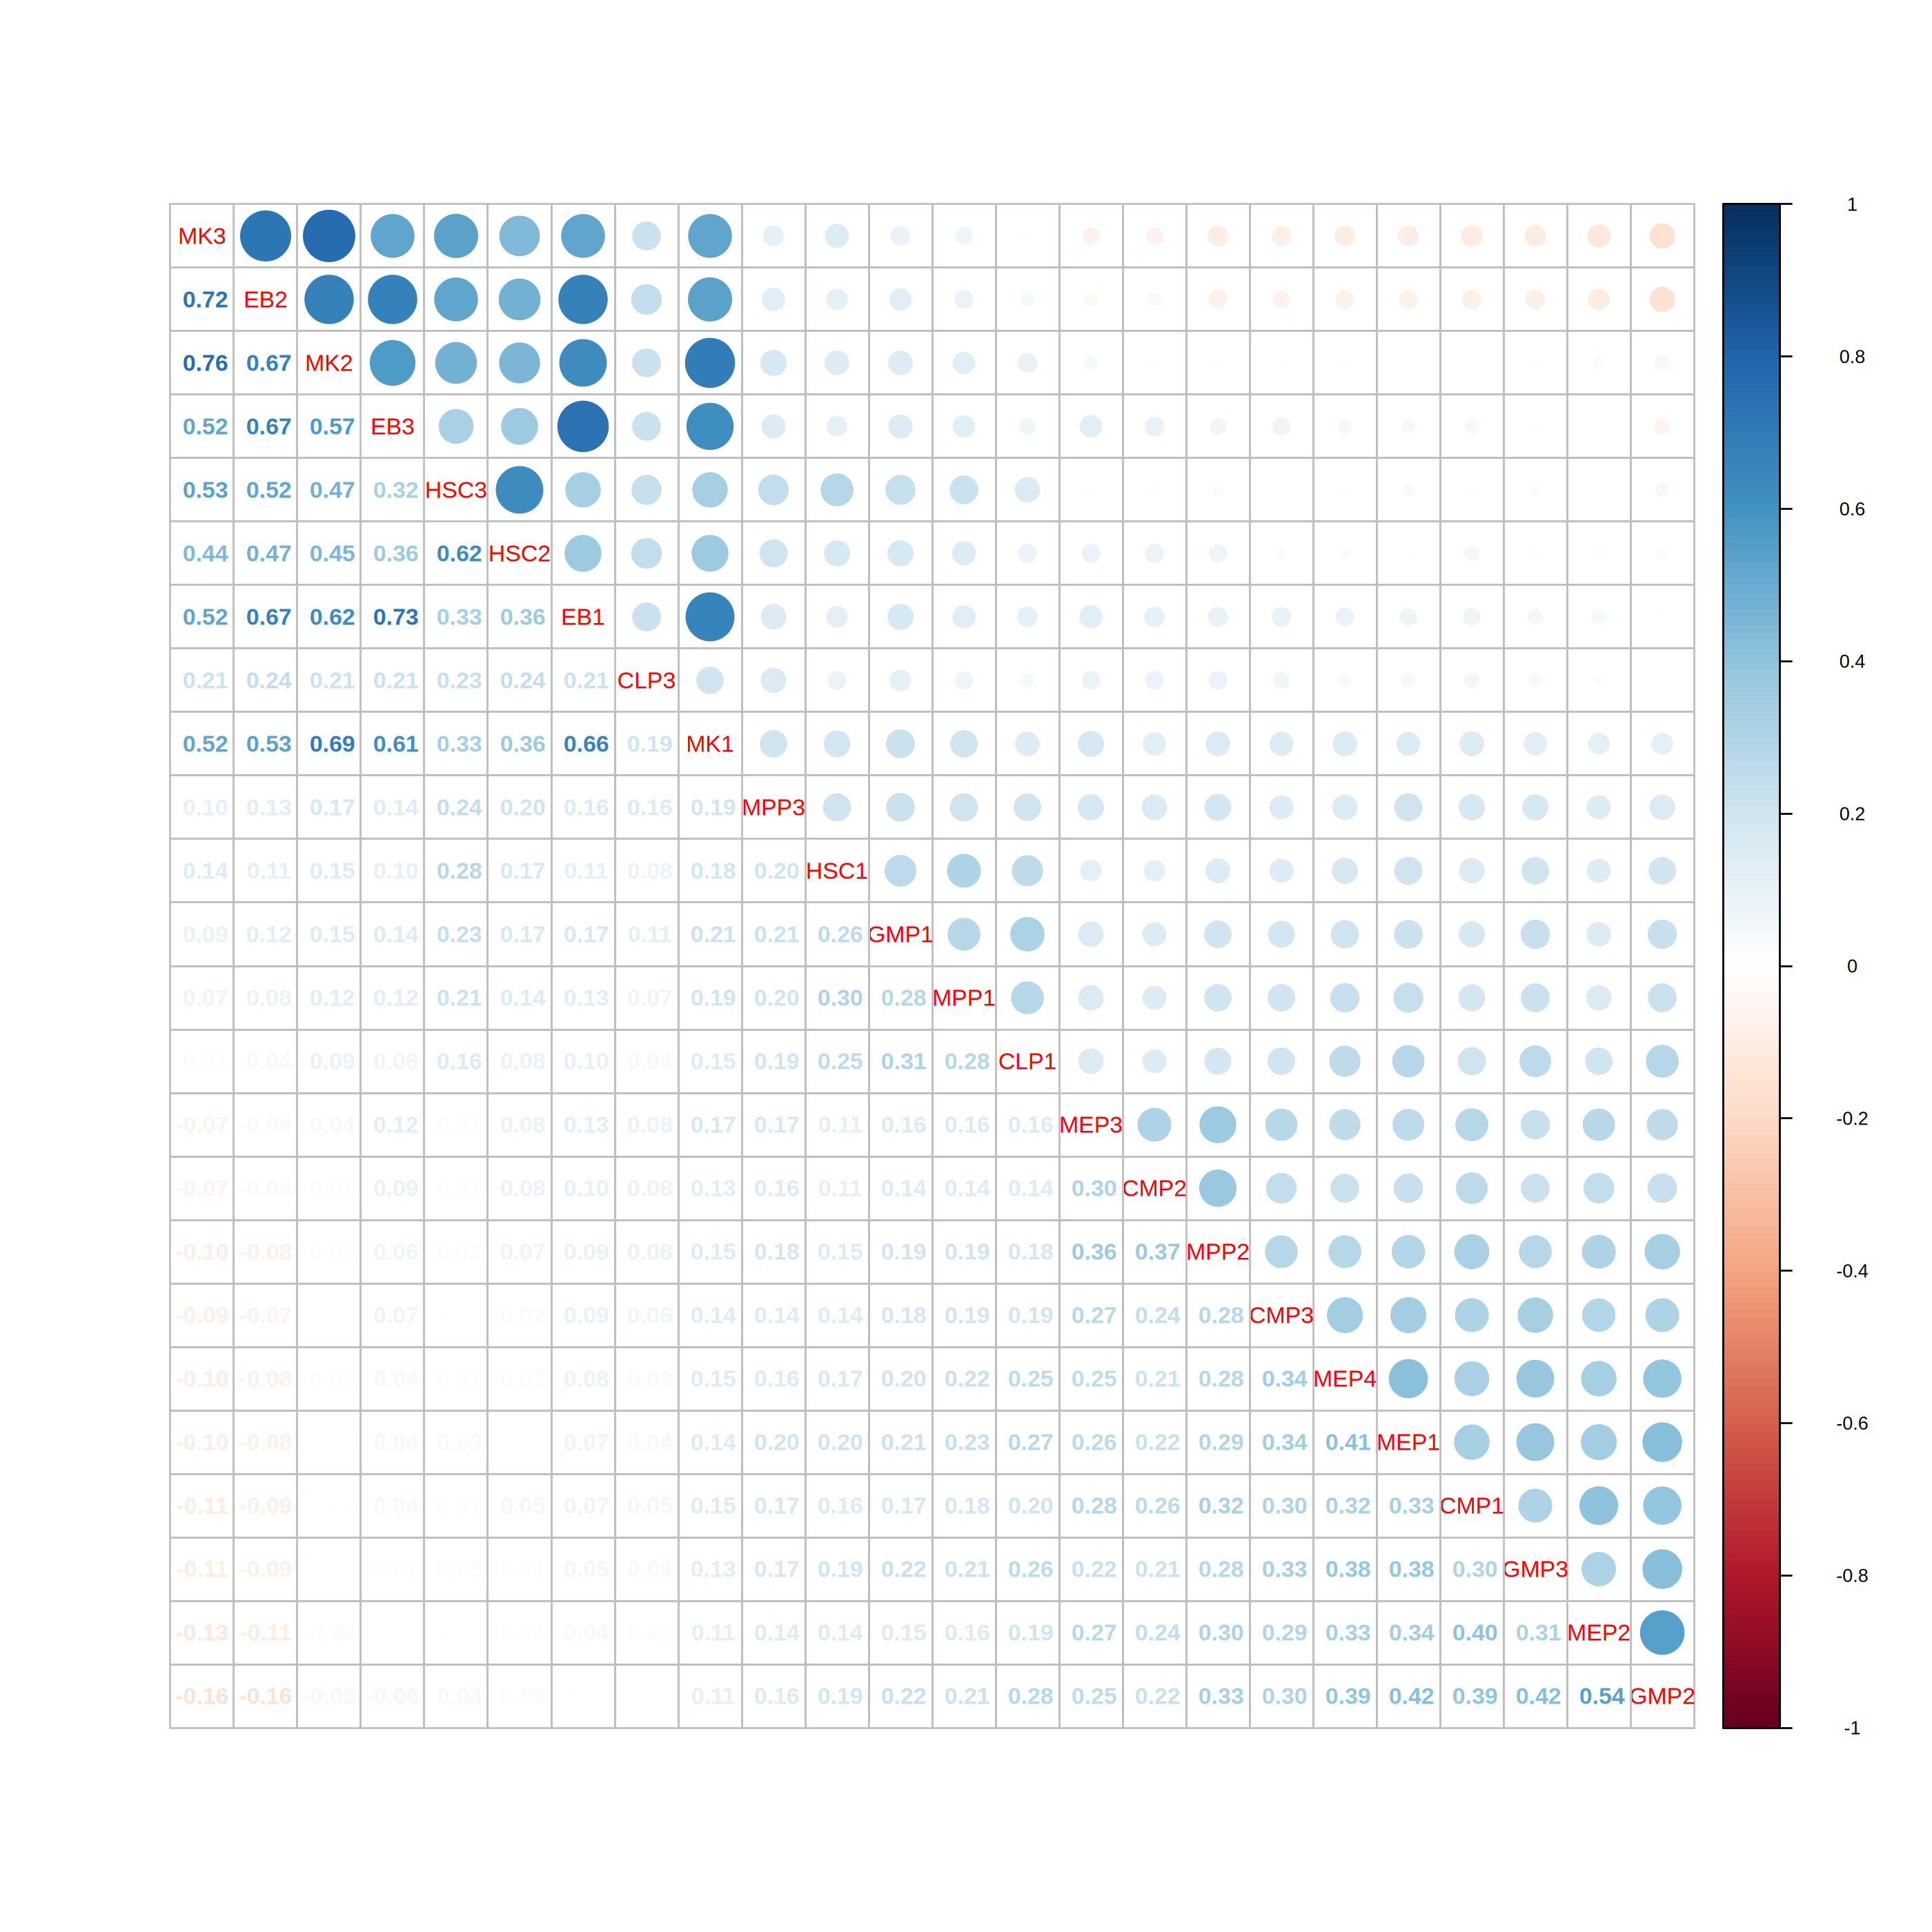

In [898]:

# cluster analysis
options(repr.plot.width = 14, repr.plot.height = 14, repr.plot.res = 200)
plotdat = logcpm_telocal[rsum > 41 & rsd > .75, ]
plotdat = cor(plotdat)
plotdat = round(plotdat, 2)
corrplot.mixed(plotdat, order = 'AOE') 


## telocal heatmap

In [883]:
table(deg_telocal_dt[FDR < .1, .id])


CLP  EB MEP  MK MPP 
  1  21 613  26   1 

In [884]:
telocal_list = list()

In [904]:
head(dsn_telocal)

cell_type
HSC1 HSC      
HSC2 HSC      
HSC3 HSC      
MPP1 MPP      
MPP2 MPP      
MPP3 MPP

`use_raster` is automatically set to TRUE for a matrix with more than 2000 rows. You can control `use_raster` argument by explicitly setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



png 
  2

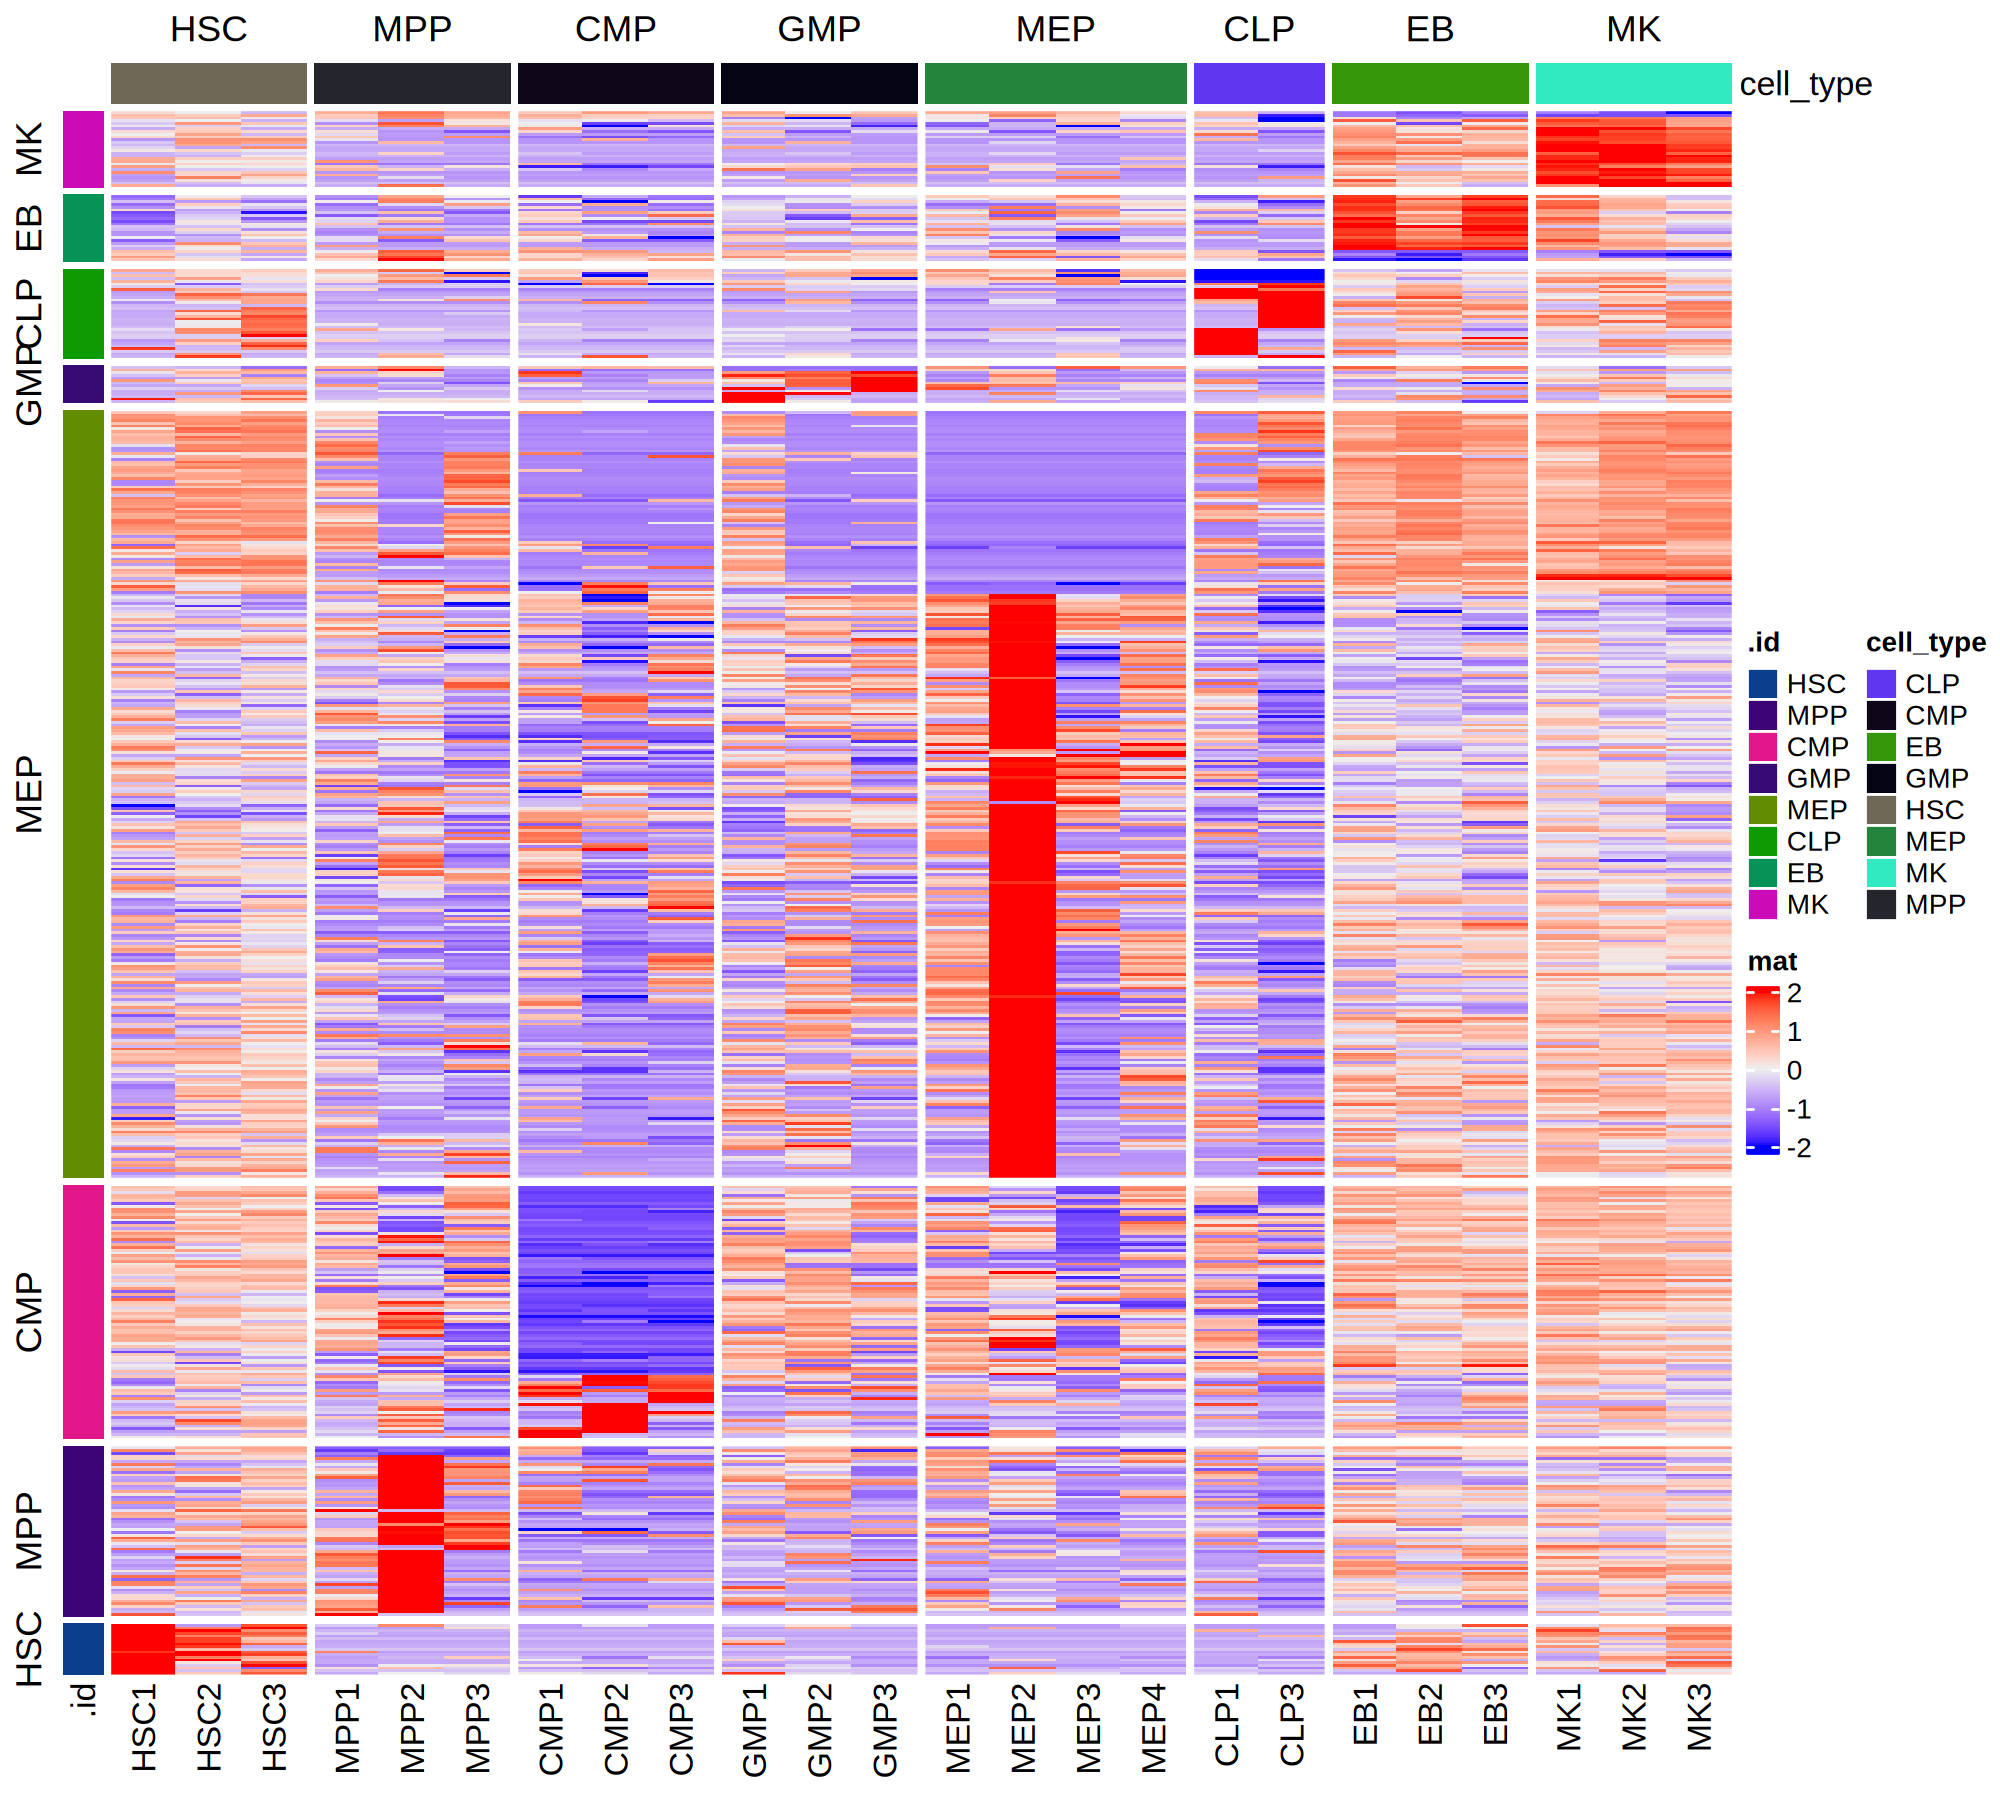

In [905]:
# all sig ones with FDr < 0.1
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 200)

row_sel = deg_telocal_dt[ PValue < 0.01 & abs(logFC) > 1, ] 
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_telocal))
row_sel = row_sel[rn %in% ov, ]

telocal_list = c(telocal_list, list(sig = row_sel))

plotdat = logcpm_telocal[row_sel$rn, rownames(dsn_telocal)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_telocal[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
hp = Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = T,  row_split = row_sel$.id, row_names_gp = grid::gpar(size = 6), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  
hp
pdf('heatmap.pdf', width = 10, height = 13)
hp
dev.off()

In [911]:
head(row_sel)

.id rn                            logFC    logCPM   PValue       FDR       ctype_gene                       
1 HSC L1PA4_dup1026:L1PA4:L1:LINE   5.936436 3.164052 6.412631e-06 0.2728831 HSC_L1PA4_dup1026:L1PA4:L1:LINE  
2 HSC L1MA5_dup1975:L1MA5:L1:LINE   6.554444 2.938303 3.966342e-05 0.8439185 HSC_L1MA5_dup1975:L1MA5:L1:LINE  
3 HSC L1PA10_dup1389:L1PA10:L1:LINE 6.677560 2.658130 7.357540e-05 0.8610581 HSC_L1PA10_dup1389:L1PA10:L1:LINE
4 HSC L1PA2_dup3592:L1PA2:L1:LINE   4.570589 2.999451 8.093793e-05 0.8610581 HSC_L1PA2_dup3592:L1PA2:L1:LINE  
5 HSC L1PA4_dup3068:L1PA4:L1:LINE   3.910597 3.125766 1.015730e-04 0.8644678 HSC_L1PA4_dup3068:L1PA4:L1:LINE  
6 HSC L1PA5_dup8894:L1PA5:L1:LINE   6.045896 2.690809 1.421106e-04 0.9066953 HSC_L1PA5_dup8894:L1PA5:L1:LINE

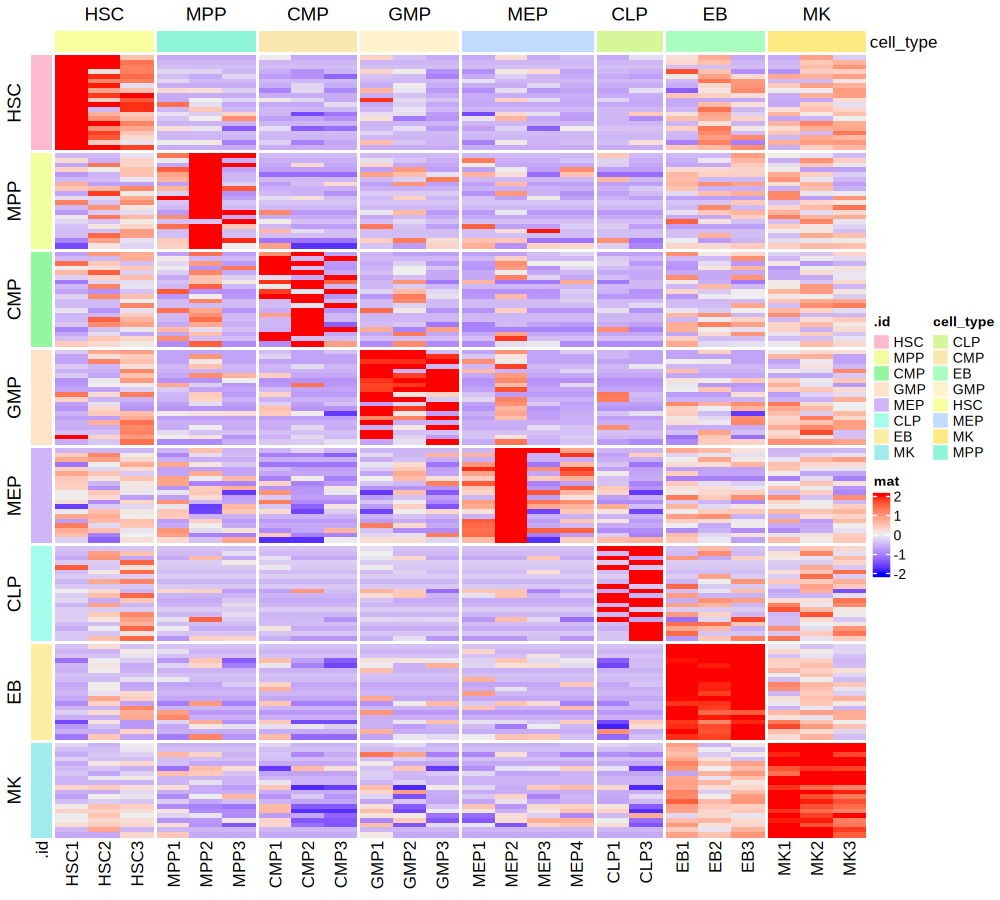

In [922]:
# top 20 up-regulated coding genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

row_sel = deg_telocal_dt[logFC > 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
fwrite(row_sel, file = 'data/telocal_up20.xls', sep = '\t') 
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_telocal))
row_sel = row_sel[rn %in% ov, ]

telocal_list = c(telocal_list, list(up20 = row_sel))

plotdat = logcpm_telocal[row_sel$rn, rownames(dsn_telocal)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_telocal[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = factor(row_sel$.id, levels = cell_types), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


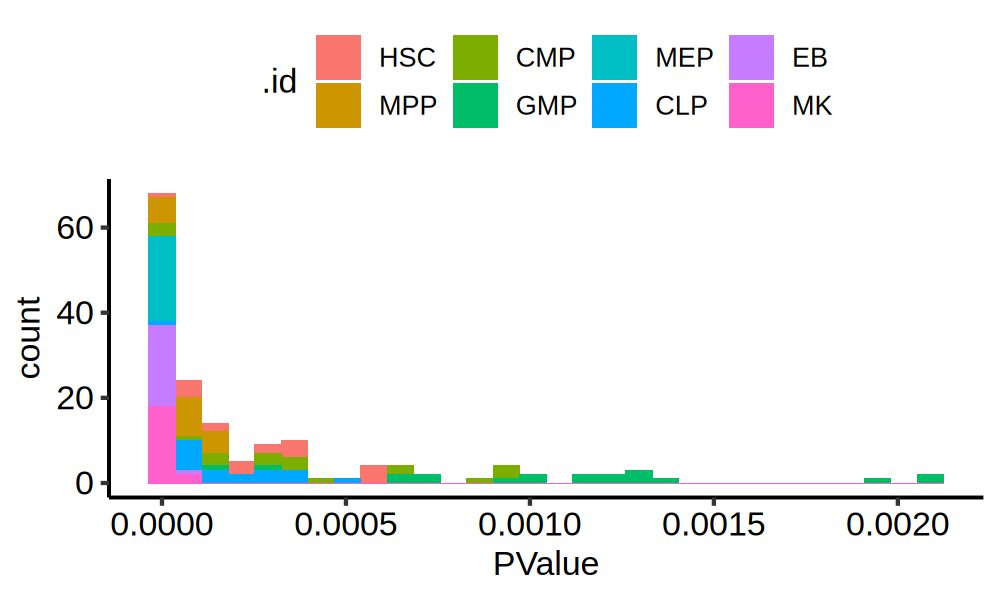

In [888]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
ggplot(row_sel, aes(x = PValue, fill = .id)) + geom_histogram() + theme_pubr()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


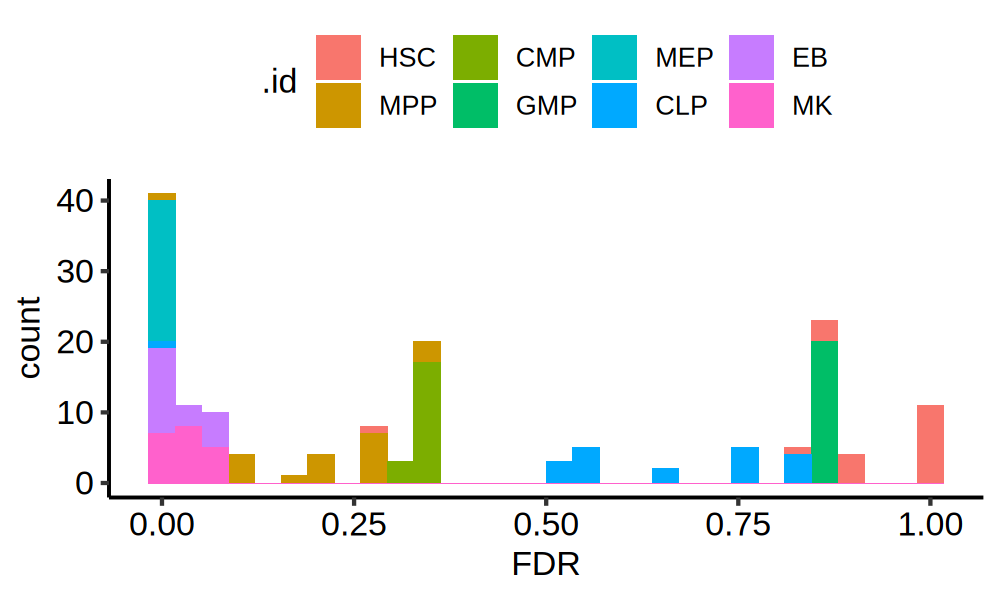

In [887]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
ggplot(row_sel, aes(x = FDR, fill = .id)) + geom_histogram() + theme_pubr()


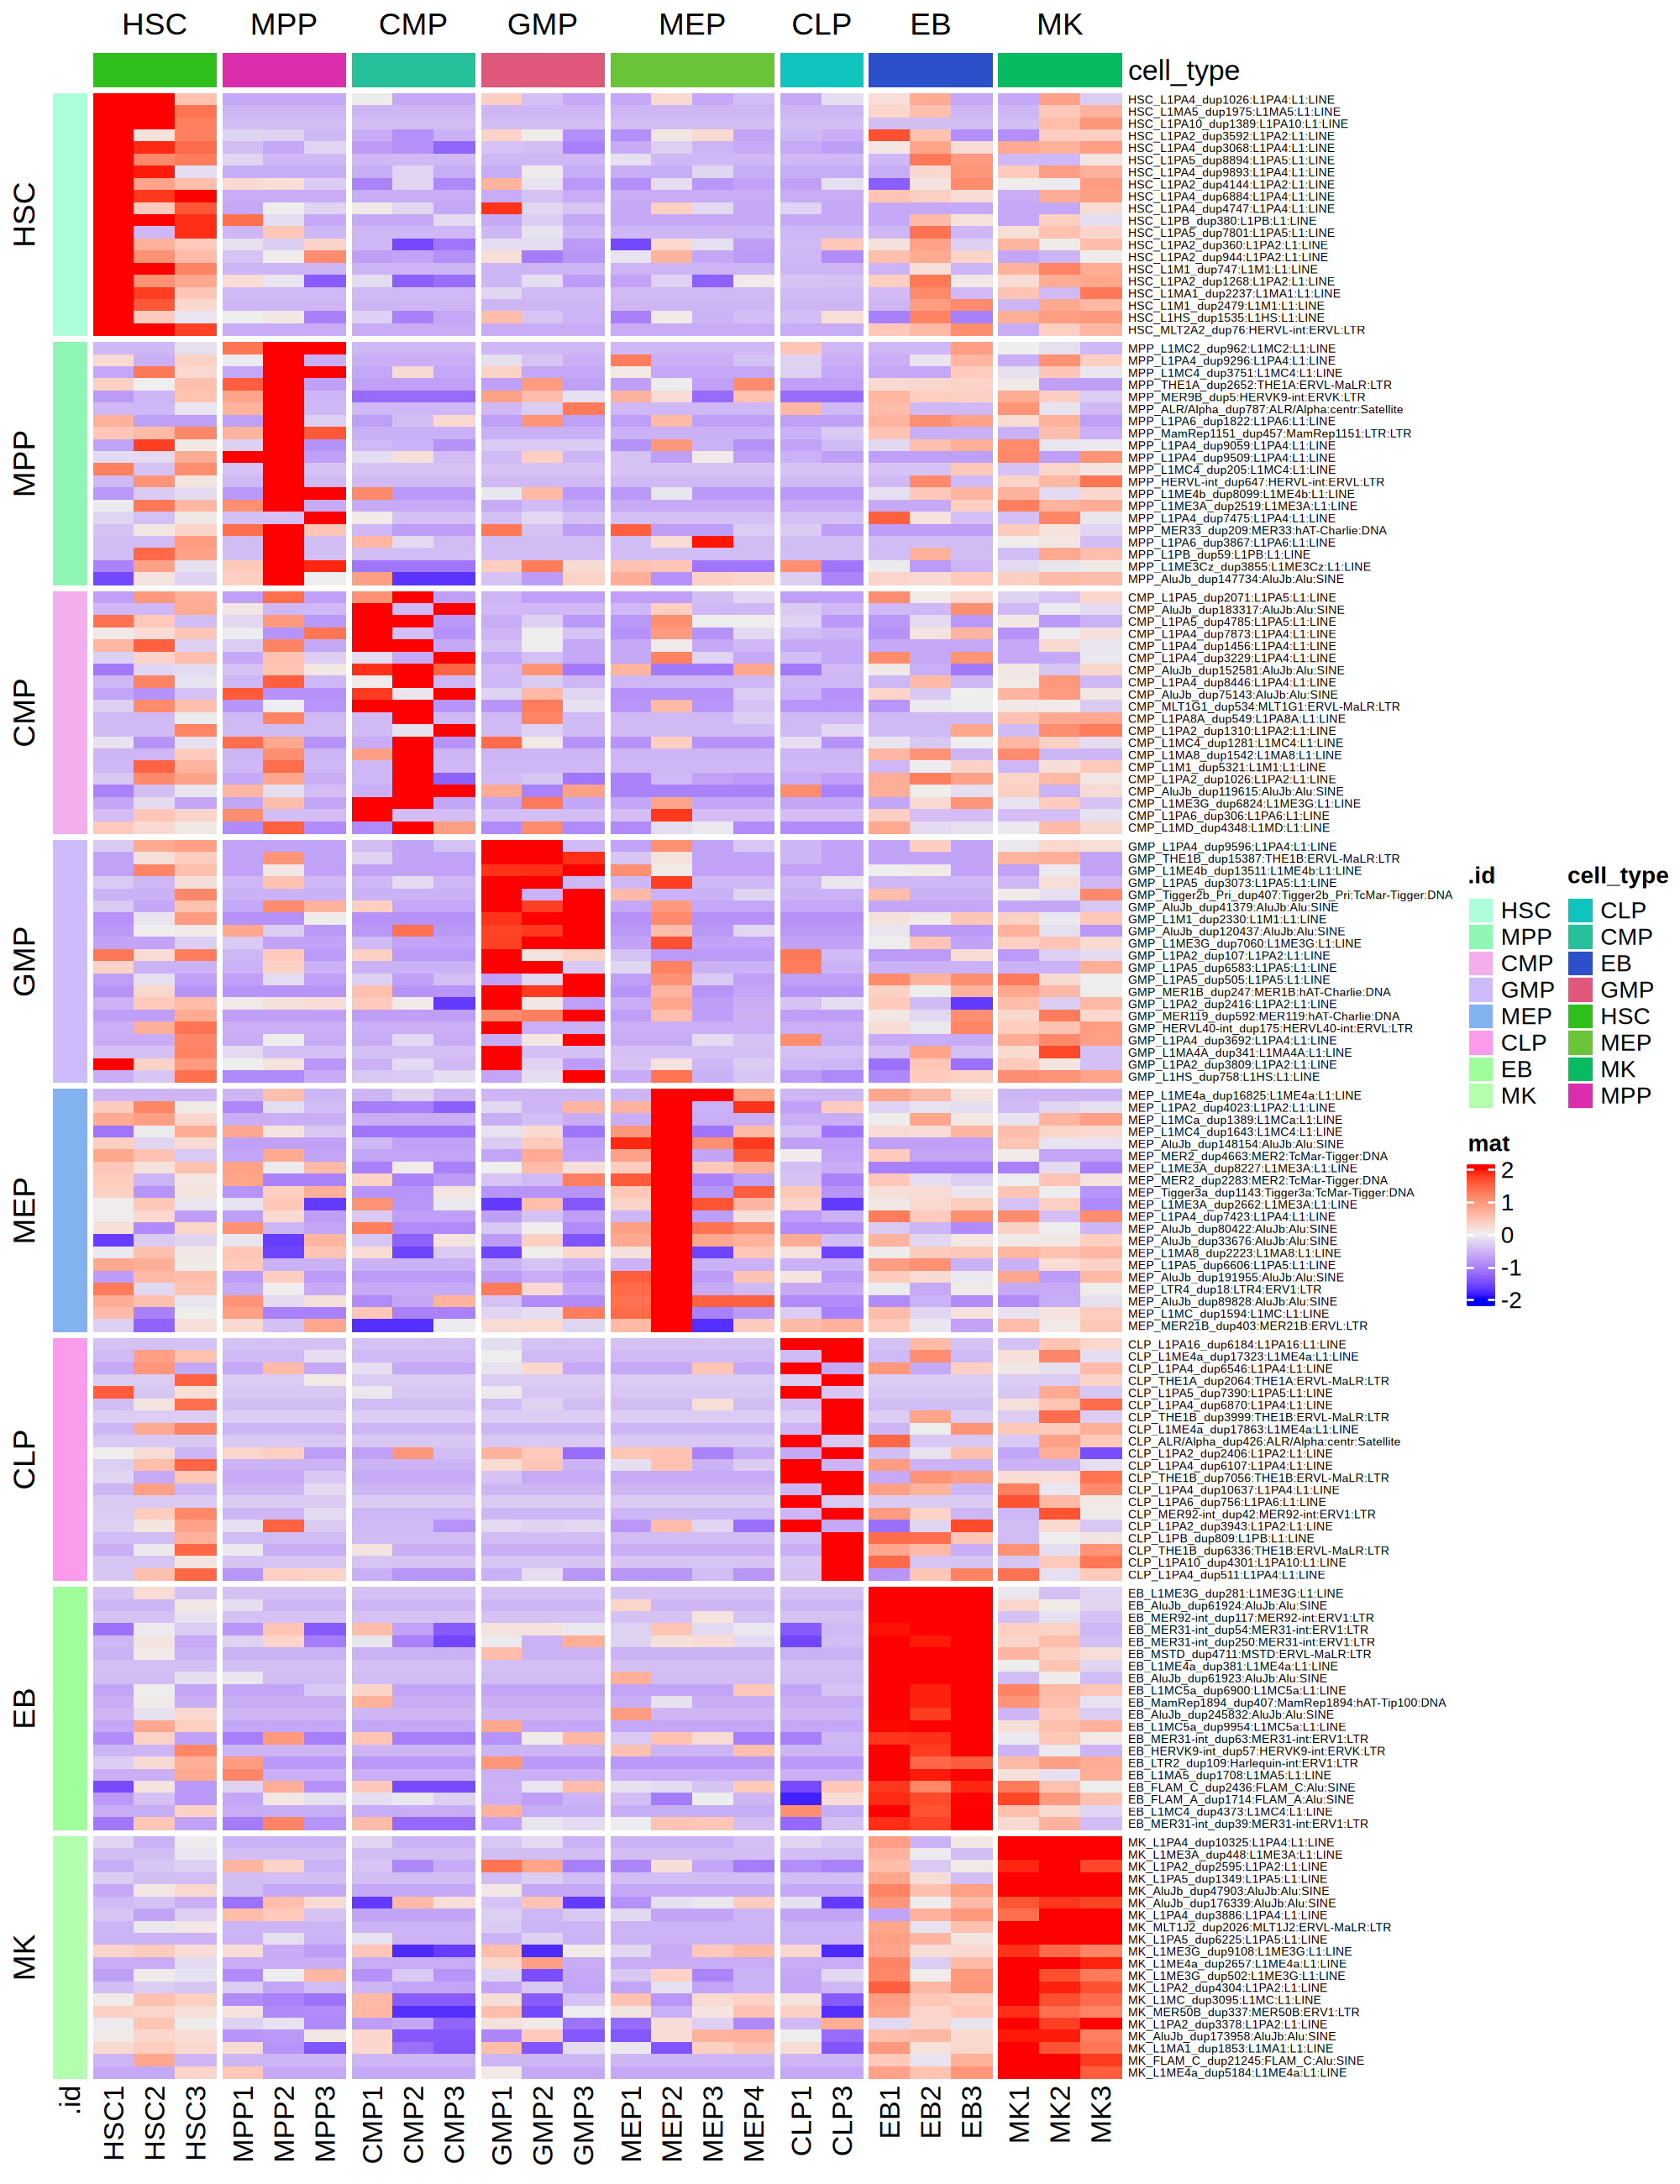

In [889]:
# top 20 up-regulated coding genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 13, repr.plot.res = 200)

row_sel = deg_telocal_dt[logFC > 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_telocal))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_telocal[row_sel$rn, rownames(dsn_telocal)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = T, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = T,  row_split = row_sel$.id, row_names_gp = grid::gpar(fontsize = 5), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [724]:
plotdat[1:3, 1:10]

HSC1      HSC2      HSC3       MPP1       MPP2      MPP3       CMP1       CMP2        CMP3      GMP1      
HSC_HERV15-int_dup33:HERV15-int:ERV1:LTR -1.216618 -1.285242 -1.1534324 -0.2554381 0.1265225 -1.6238314  0.8332750  0.85097397 0.9198785  0.2000048
HSC_L1MD_dup1005:L1MD:L1:LINE            -1.260610 -1.156266 -1.2079864 -1.0375605 0.5899172 -0.9161918 -1.1750184  0.04120087 0.2262641 -1.0758196
HSC_AluJr_dup1452:AluJr:Alu:SINE         -2.000000 -0.834153 -0.9389894 -0.1175482 0.5844460 -0.4856305  0.6675626 -0.24131293 0.5566047 -0.3777248

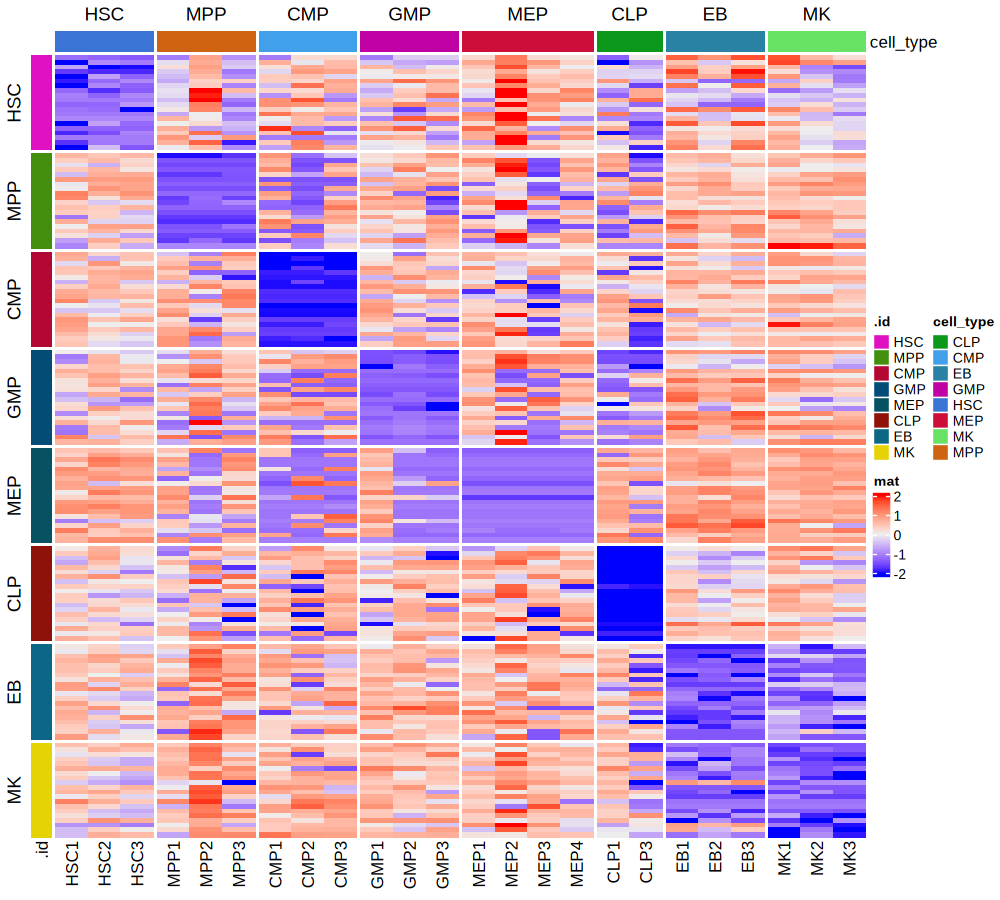

In [916]:
# top 20 dn-regulated coding genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 100)

row_sel = deg_telocal_dt[logFC < 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
fwrite(row_sel, file = 'data/telocal_down20.xls', sep = '\t') 
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_telocal))
row_sel = row_sel[rn %in% ov, ]

telocal_list = c(telocal_list, list(dn20 = row_sel))

plotdat = logcpm_telocal[row_sel$rn, rownames(dsn_telocal)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_telocal[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


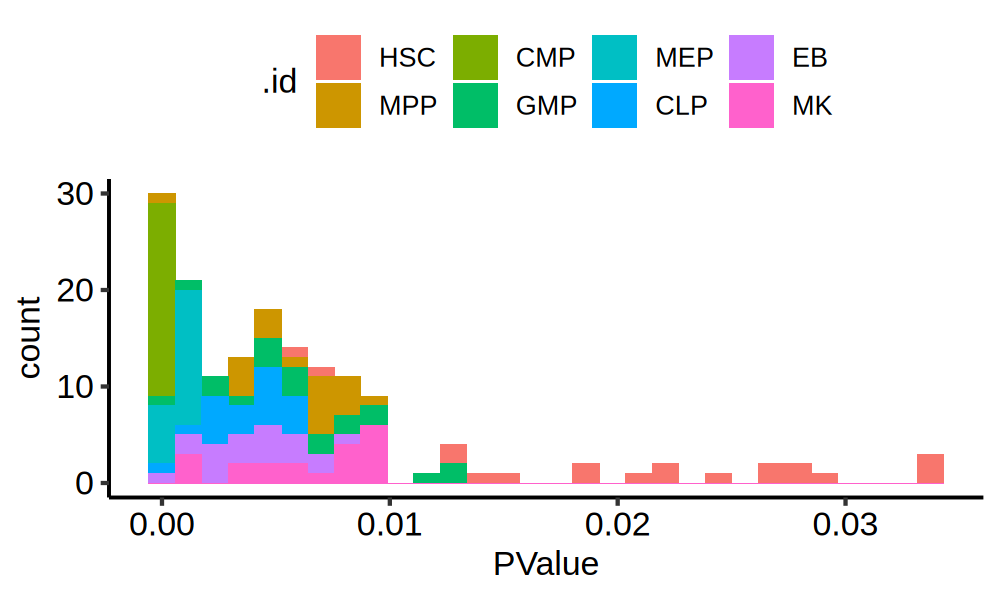

In [917]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
ggplot(row_sel, aes(x = PValue, fill = .id)) + geom_histogram() + theme_pubr()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


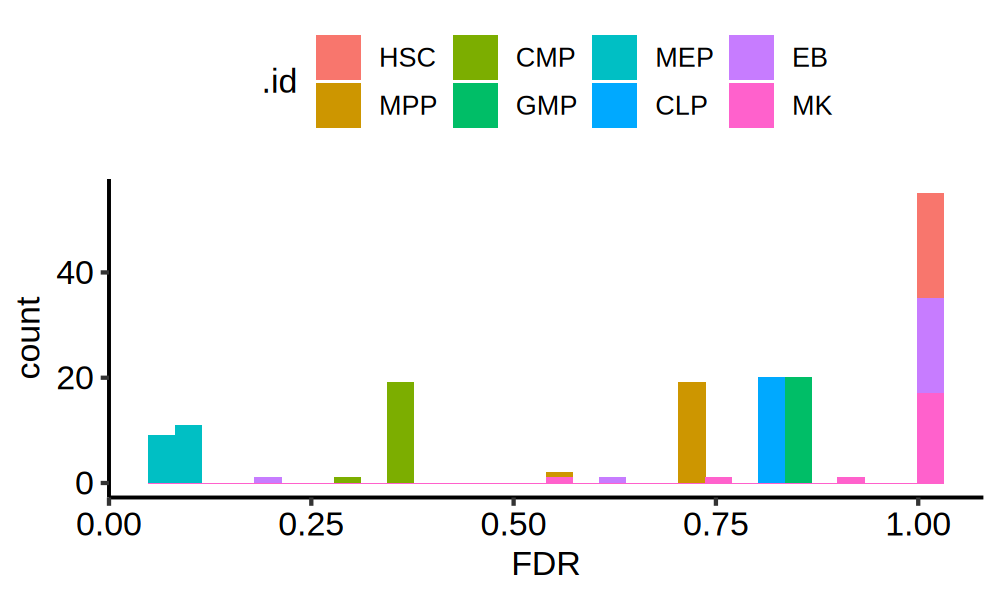

In [918]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
ggplot(row_sel, aes(x = FDR, fill = .id)) + geom_histogram() + theme_pubr()


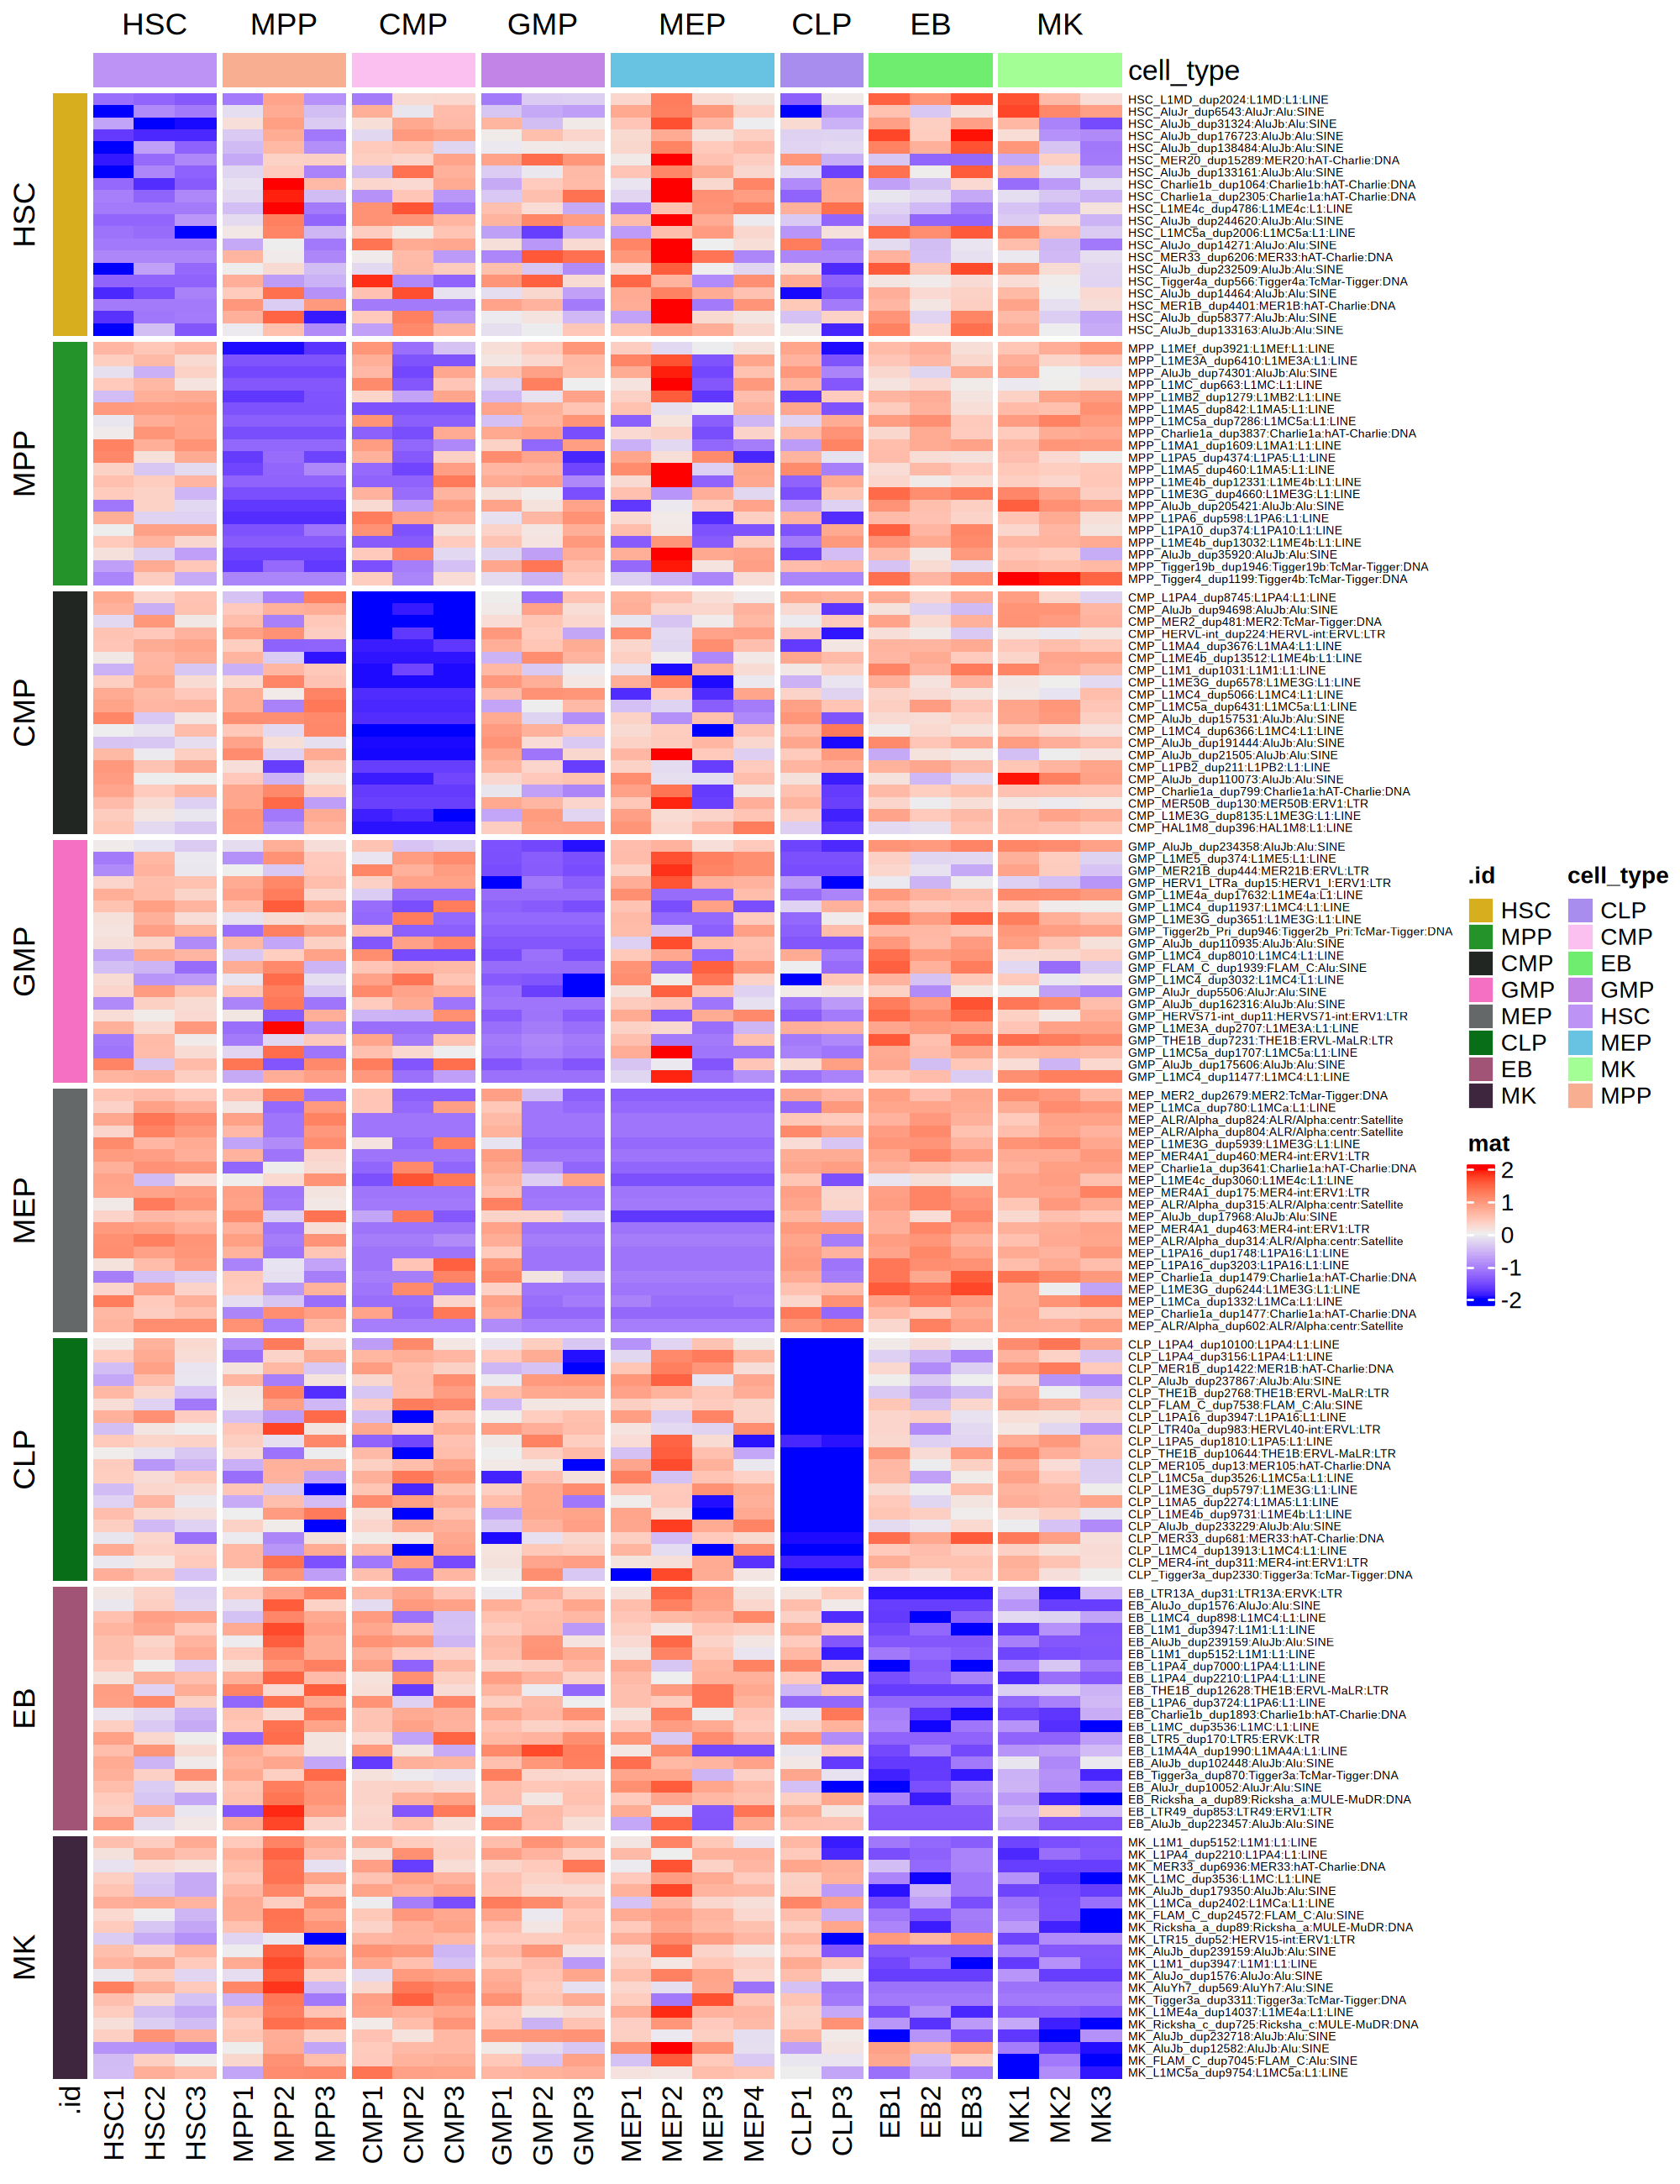

In [933]:
# top 20 up-regulated coding genes for each cell type
options(repr.plot.width = 10, repr.plot.height = 13, repr.plot.res = 200)

row_sel = deg_telocal_dt[logFC < 0, ] %>% group_by(.id) %>% slice_min(order_by = PValue, n = 20)
row_sel = as.data.table(row_sel)
row_sel[, ctype_gene := paste0(.id, '_', rn)]
row_sel[, .id := factor(.id, levels = cell_types)]
row_sel = row_sel[order(.id), ]
ov = intersect(row_sel$rn, rownames(logcpm_telocal))
row_sel = row_sel[rn %in% ov, ]

plotdat = logcpm_telocal[row_sel$rn, rownames(dsn_telocal)]
rownames(plotdat) = row_sel$ctype_gene

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_all_df[, 'cell_type', drop = F])
column_ra = rowAnnotation(df = row_sel[, .(.id)]) 
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = T, show_column_dend = F, cluster_columns  = F, 
        cluster_rows = F,  row_split = row_sel$.id, row_names_gp = grid::gpar(fontsize = 5), 
        show_row_dend = F, top_annotation = column_ha, left_annotation = column_ra, 
        column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [938]:
row_sel[1:5, ]

.id rn                             logFC     logCPM    PValue      FDR ctype_gene                        
1 HSC L1MD_dup2024:L1MD:L1:LINE      -5.351829 10.686590 0.006267821 1   HSC_L1MD_dup2024:L1MD:L1:LINE     
2 HSC AluJr_dup6543:AluJr:Alu:SINE   -6.687467  9.314801 0.007097942 1   HSC_AluJr_dup6543:AluJr:Alu:SINE  
3 HSC AluJb_dup31324:AluJb:Alu:SINE  -3.793383  9.220092 0.012262250 1   HSC_AluJb_dup31324:AluJb:Alu:SINE 
4 HSC AluJb_dup176723:AluJb:Alu:SINE -3.729088  7.535264 0.012912024 1   HSC_AluJb_dup176723:AluJb:Alu:SINE
5 HSC AluJb_dup138484:AluJb:Alu:SINE -3.995137  9.181538 0.014095934 1   HSC_AluJb_dup138484:AluJb:Alu:SINE

In [950]:
telocal_sel = rbindlist(telocal_list, idcol = T)
setnames(telocal_sel, 1, 'sig_type')
setnames(telocal_sel, 2, 'cell_type')
telocal_sel[, cell_type_agg := paste(.SD$cell_type, collapse = ' '), by = 'rn']
telocal_sel = telocal_sel[!duplicated(rn), ]
head(telocal_sel)
#telocal_sel = merge(telocal_sel, te_dt, by.x = 'rn', by.y = 'idd', all.x = T)
#fwrite(telocal_sel, file = 'data/telocal_selected.tsv')


sig_type cell_type rn                             logFC    logCPM   PValue       FDR         ctype_gene                        
1 sig      MPP       L1MC2_dup962:L1MC2:L1:LINE     7.900020 4.429032 3.774423e-07 0.016061678 MPP_L1MC2_dup962:L1MC2:L1:LINE    
2 sig      MEP       L1ME4a_dup16825:L1ME4a:L1:LINE 7.861616 5.392640 1.339613e-07 0.005659330 MEP_L1ME4a_dup16825:L1ME4a:L1:LINE
3 sig      MEP       L1PA2_dup4023:L1PA2:L1:LINE    4.617730 5.310166 4.218421e-07 0.007151983 MEP_L1PA2_dup4023:L1PA2:L1:LINE   
4 sig      MEP       L1MCa_dup1389:L1MCa:L1:LINE    7.047260 5.983230 6.448921e-07 0.007151983 MEP_L1MCa_dup1389:L1MCa:L1:LINE   
5 sig      MEP       L1MC4_dup1643:L1MC4:L1:LINE    5.465708 5.942621 8.258426e-07 0.007151983 MEP_L1MC4_dup1643:L1MC4:L1:LINE   
6 sig      MEP       AluJb_dup148154:AluJb:Alu:SINE 6.125822 3.938554 8.464687e-07 0.007151983 MEP_AluJb_dup148154:AluJb:Alu:SINE
  cell_type_agg                                          
1 MPP MPP MPP MPP MPP MPP MPP MPP MPP MPP MPP MPP MPP MPP
2 MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP
3 MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP
4 MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP
5 MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP
6 MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP MEP

In [951]:
head(te_dt)


chr  rmsk      exon start end  width strand score gene_id  transcript_id   family_id class_id  idd                               
1 chr1 UCSC_rmsk exon 2710  4402 5119  -      .     TAR1     TAR1_dup164     subtelo   Satellite TAR1_dup164:TAR1:subtelo:Satellite
2 chr1 UCSC_rmsk exon 4083  4533  962  -      .     LTR60B   LTR60B_dup190   ERV1      LTR       LTR60B_dup190:LTR60B:ERV1:LTR     
3 chr1 UCSC_rmsk exon 4534  4660  505  -      .     LTR60B   LTR60B_dup191   ERV1      LTR       LTR60B_dup191:LTR60B:ERV1:LTR     
4 chr1 UCSC_rmsk exon 4664  5263 1304  +      .     L1MC3    L1MC3_dup5932   L1        LINE      L1MC3_dup5932:L1MC3:L1:LINE       
5 chr1 UCSC_rmsk exon 5275  5528 1403  +      .     MER34C_v MER34C_v_dup375 ERV1      LTR       MER34C_v_dup375:MER34C_v:ERV1:LTR 
6 chr1 UCSC_rmsk exon 5529  5686 3544  +      .     L1MC3    L1MC3_dup5932   L1        LINE      L1MC3_dup5932:L1MC3:L1:LINE

In [944]:
head(telocal_sel)
dim(telocal_sel)


sig_type cell_type rn                                  logFC     logCPM   PValue       FDR          ctype_gene                             cell_type_agg
1 sig      MPP       L1PA4_dup5118:L1PA4:L1:LINE          6.692403 4.420084 1.933025e-08 1.031752e-03 MPP_L1PA4_dup5118:L1PA4:L1:LINE        MPP MPP      
2 sig      CMP       L1PA4_dup5560:L1PA4:L1:LINE          6.081185 3.666404 1.987178e-06 8.822843e-02 CMP_L1PA4_dup5560:L1PA4:L1:LINE        CMP CMP      
3 sig      CMP       L1ME3C_dup2379:L1ME3C:L1:LINE       -9.688420 7.010773 3.305983e-06 8.822843e-02 CMP_L1ME3C_dup2379:L1ME3C:L1:LINE      CMP CMP      
4 sig      MEP       L1ME4a_dup18726:L1ME4a:L1:LINE       8.333388 4.451539 6.617833e-07 3.499245e-02 MEP_L1ME4a_dup18726:L1ME4a:L1:LINE     MEP MEP      
5 sig      EB        MER31-int_dup383:MER31-int:ERV1:LTR 12.868093 7.513748 2.124311e-25 1.133851e-20 EB_MER31-int_dup383:MER31-int:ERV1:LTR EB EB        
6 sig      EB        L1ME3G_dup21477:L1ME3G:L1:LINE      11.934552 6.906337 7.708321e-20 2.057158e-15 EB_L1ME3G_dup21477:L1ME3G:L1:LINE      EB EB

[1] 326   9

In [952]:
telocal_sel_seqino = merge(telocal_sel, te_dt, by.x = 'rn', by.y = 'idd', all.x = T)
fwrite(telocal_sel_seqino, file = 'data/telocal_sel.xls', sep = '\t')


In [2]:
library(data.table)
library(ggraph)


In [ ]:
# te table
te_dt = fread('/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf')
setnames(te_dt, c('chr', 'rmsk', 'exon', 'start', 'end', 'width', 'strand', 'score', 'info'))
te_dt[, gene_id       := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\1', info)]
te_dt[, transcript_id := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\2', info)]
te_dt[, family_id     := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\3', info)]
te_dt[, class_id      := sub('gene_id "(.*)"; transcript_id "(.*)"; family_id "(.*)"; class_id "(.*)";', '\\4', info)]
te_dt[, idd := paste0(transcript_id, ':', gene_id, ':', family_id, ':', class_id)]
te_dt[, idd_2 := paste0(chr, '_', start, '_', end, '__', transcript_id, ':', gene_id, ':', family_id, ':', class_id)]
te_dt[, info := NULL]
#TE_GTF_FILE= "/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"
#TE_loc_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/T2T-CHM13v2_rmsk_TE.gtf.locInd"

head(te_dt)
# chr1    UCSC_rmsk       exon    2710    4402    5119    -       .       gene_id "TAR1"; transcript_id "TAR1_dup164"; family_id "subtelo"; class_id "Satellite";


In [ ]:
graph_dt = readRDS('data/te_dt_may08.rds')
graph_dt[class_id == family_id, family_id := paste0(family_id, '_F')]
graph_dt[family_id == gene_id, gene_id := paste0(gene_id, '_G')]
graph_dt[gene_id == transcript_id, transcript_id := paste0(transcript_id, '_Tx')]

graph_dt[family_id %in% graph_dt$class_id, family_id := paste0(family_id, '_F')]
graph_dt[gene_id %in% graph_dt$family_id, gene_id := paste0(family_id, '_G')]
graph_dt[transcript_id %in% graph_dt$gene_id, transcript_id := paste0(family_id, '_Tx')]


In [ ]:
tmp1 = graph_dt[!duplicated(class_id), .(class_id)]
setnames(tmp1, 1, 'to')
tmp1[, from := 'TE'] 
tmp1 = relocate(tmp1, 2)
tmp1$lvl = 'lvl1'

tmp2 = graph_dt[!duplicated(family_id), .(class_id, family_id)]
setnames(tmp2, c('from', 'to'))
tmp2$lvl = 'lvl2'

tmp3 = graph_dt[!duplicated(gene_id), .(family_id, gene_id)]
setnames(tmp3, c('from', 'to'))
tmp3$lvl = 'lvl3'

tmp4 = graph_dt[!duplicated(transcript_id), .(gene_id, transcript_id)]
setnames(tmp4, c('from', 'to'))
tmp4$lvl = 'lvl4'

graph_dt_2 = rbindlist(list(tmp1, tmp2, tmp3, tmp4), use.names=TRUE )
graph_dt_2[, from_ori := from]
graph_dt_2[, to_ori := to]

fwrite(graph_dt_2, file = 'data/graph_dt')

graph_dt = copy(graph_dt_2)
remove(graph_dt_2)


In [ ]:
graph_dt[, nn := 1:nrow(graph_dt)] # nn added for convenient reference
# if lvl4 has problem:
lvl4_dt = graph_dt[from == to & lvl == 'lvl4', ]
graph_dt[nn %in% lvl4_dt$nn, to := paste0(to, '_Tx')]


In [ ]:
plotdat0 = graph_dt[lvl %in% c('lvl1', 'lvl2'), ] 
plotdat1 = graph_dt[grepl('HERV9', to) & lvl == 'lvl3', ] 
plotdat2 = graph_dt[grepl('LTR12', to) & lvl == 'lvl3', ] 
plotdat = rbind(plotdat0, plotdat1, plotdat2)
plotdat = as_tbl_graph(plotdat)

options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)
ggraph(plotdat, layout = 'stress') +  geom_edge_link(aes(colour = factor(lvl))) +  #geom_node_point() + 
  geom_node_text(aes(label = name),  colour = 'blue', size=3, show.legend = FALSE, family = "serif") + theme(legend.position = "none")


In [ ]:
mm = rep(-1, length(cell_types))
deg_list = lapply(1:length(mm), function(ii){
    mm_ii = mm
    mm_ii[ii] = 1
    deg = glmQLFTest(fit, contrast = mm_ii) 
    deg = topTags(deg, n = nrow(fit$counts))
    as.data.table(deg$table, keep.rownames = T)

})


In [ ]:
names(deg_list) = cell_types
deg_dt = rbindlist(deg_list, idcol = T)
head(deg_dt)


In [304]:
deg = as.data.table(deg$table, keep.rownames = T)


In [281]:
cell_type_deg_list = lapply(cell_types, function(cc) {
    dsn_all_df$ctype = 'Other'
    dsn_all_df$ctype[dsn_all_df$cell_type == cc] = cc
    dsn_all_df$ctype = factor(dsn_all_df$ctype, levels = c('Other', cc))

    subtype = factor(dsn_all_df$ctype)
    subtype = relevel(subtype, ref = 'Other')

    dge = DGEList(counts=mtx_all_df, group = subtype)
    dge <- calcNormFactors(dge)

    keep = filterByExpr(dge)
    dge = dge[keep, , keep.lib.sizes=FALSE]
    dge = normLibSizes(dge)
    design = model.matrix( ~ 0 + subtype)
    dge = estimateDisp(dge, design)
    et <- exactTest(dge)
    deg = topTags(et, n = length(keep))
    as.data.table(deg$table, keep.rownames = T)
})


In [282]:
names(cell_type_deg_list) = cell_types
cell_type_deg_dt = rbindlist(cell_type_deg_list, idcol = T)
head(cell_type_deg_dt)


.id rn        logFC      logCPM   PValue       FDR         
1 CLP LOC729732   7.099587 2.520014 8.771559e-15 3.578270e-10
2 CLP RPL9P32     5.824768 1.811781 1.850210e-13 3.773874e-09
3 CLP JCHAIN      7.466197 8.304650 4.735865e-13 6.439830e-09
4 CLP ACAD8     -10.188906 4.046673 2.783873e-12 2.839133e-08
5 CLP TP53INP1    3.710188 7.483967 4.106388e-12 3.350320e-08
6 CLP DNTT        8.111659 7.080440 4.185078e-11 2.845434e-07

In [277]:
(cell_type_deg_dt)


<0 x 0 matrix>

In [271]:
cell_types

[1] "CLP" "CMP" "EB"  "GMP" "HSC" "MEP" "MK"  "MPP"

In [272]:
dim(cell_type_deg_dt[.id == 'MEP' & abs(logFC) > 1 & FDR < 0.05, ])

[1] 38365     7

In [250]:
summary(cell_type_deg_dt[.id == 'MEP' & abs(logFC) > 1 & FDR < 0.05, logFC])


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-29.848 -29.848 -21.944 -22.595 -17.030  -5.269 

In [235]:
deg_sig = cell_type_deg_dt[abs(logFC) > 1 & FDR < 0.05, ]
length(unique(deg_sig[, rn]))


[1] 40794

In [236]:
head(deg_sig$rn)

[1] "AMD1"   "HADHB"  "FTO"    "STARD7" "SEC31A" "CFLAR"

In [ ]:
lapply(all_samples

In [ ]:
my.contrasts = makeContrasts(MNX1vsCD34=MNX1 - CD34, MNX1vsAML=MNX1 - Others, AMLvsCD34 = Others - CD34, levels=design)
MNX1vsCD34 = glmQLFTest(fit, contrast=my.contrasts[,"MNX1vsCD34"])
MNX1vsCD34 = topTags(MNX1vsCD34, n=nrow(MNX1vsCD34$table), adjust.method="fdr")

MNX1vsAML = glmQLFTest(fit, contrast=my.contrasts[,"MNX1vsAML"])
MNX1vsAML = topTags(MNX1vsAML, n=nrow(MNX1vsAML$table), adjust.method="fdr")

AMLvsCD34 = glmQLFTest(fit, contrast=my.contrasts[,"AMLvsCD34"])
AMLvsCD34 = topTags(AMLvsCD34, n=nrow(AMLvsCD34$table), adjust.method="fdr")


## maSigPro

In [218]:
#Time	Replicate	Control	ME	MX	MX_ME
head(dsn_all)


sample_name cell_type
1 CLP1        CLP      
2 CLP2        CLP      
3 CLP3        CLP      
4 CMP1        CMP      
5 CMP2        CMP      
6 CMP3        CMP

In [265]:
dsn_time = copy(dsn_all) 
dsn_time[, cell_type := as.integer(factor(cell_type, levels = cell_types)) ] 
dsn_time[, Time := as.integer(cell_type)] 
#dsn_time[, Replicate := as.integer(sub('(\\d+)', '', sample_name))] 
#dsn_time[, Replicate := sub('(\\d+)', '\1', sample_name)] 
dsn_time[grep('1', sample_name), Replicate := 1]
dsn_time[grep('2', sample_name), Replicate := 2]
dsn_time[grep('3', sample_name), Replicate := 3]
dsn_time[, HSC := as.integer(dsn_time$cell_type == 'HSC')]
dsn_time[, MPP := as.integer(dsn_time$cell_type == 'MPP')]
dsn_time[, CLP := as.integer(dsn_time$cell_type == 'CLP')]
dsn_time[, MEP := as.integer(dsn_time$cell_type == 'MEP')]
dsn_time[, CMP := as.integer(dsn_time$cell_type == 'CMP')]
dsn_time[, GMP := as.integer(dsn_time$cell_type == 'GMP')]
dsn_time[, EB := as.integer(dsn_time$cell_type == 'EB')]
dsn_time[, MK := as.integer(dsn_time$cell_type == 'MK')]
dsn_time_df = setDF(dsn_time[, 3:ncol(dsn_time)], rownames = dsn_time$sample_name) 
head(dsn_time_df) 


Time Replicate HSC MPP CLP MEP CMP GMP EB MK
CLP1 6    1         0   0   0   0   0   0   0  0 
CLP2 6    2         0   0   0   0   0   0   0  0 
CLP3 6    3         0   0   0   0   0   0   0  0 
CMP1 3    1         0   0   0   0   0   0   0  0 
CMP2 3    2         0   0   0   0   0   0   0  0 
CMP3 3    3         0   0   0   0   0   0   0  0

In [ ]:
design = make.design.matrix(dsn_time_df, degree = 2)
fit <- p.vector(mtx_coding_df, design, Q = 0.3, MT.adjust = "BH", min.obs = 20)
tstep <- T.fit(fit, step.method = "backward", alfa = 0.05)
sigs <- get.siggenes(tstep, rsq = 0.6, vars = "groups")


In [276]:
names(sigs$sig.genes) 

[1] "HSC"      "MPPvsHSC" "CLPvsHSC" "MEPvsHSC" "CMPvsHSC" "GMPvsHSC" "EBvsHSC" 
[8] "MKvsHSC"

In [277]:
sigs_see = see.genes(sigs$sig.genes$MPPvsHSC, show.fit = T, dis = design$dis, cluster.method = "hclust" ,cluster.data = 1, k = 4)
head(sigs_see) 


[1] "warning: NULL data. No visualization possible"


$cut
NULL

$cluster.algorithm.used
NULL

$groups
     HSC MPP CLP MEP CMP GMP EB MK
CLP1   0   0   0   0   0   0  0  0
CLP2   0   0   0   0   0   0  0  0
CLP3   0   0   0   0   0   0  0  0
CMP1   0   0   0   0   0   0  0  0
CMP2   0   0   0   0   0   0  0  0
CMP3   0   0   0   0   0   0  0  0
EB1    0   0   0   0   0   0  0  0
EB2    0   0   0   0   0   0  0  0
EB3    0   0   0   0   0   0  0  0
GMP1   0   0   0   0   0   0  0  0
GMP2   0   0   0   0   0   0  0  0
GMP3   0   0   0   0   0   0  0  0
HSC1   0   0   0   0   0   0  0  0
HSC2   0   0   0   0   0   0  0  0
HSC3   0   0   0   0   0   0  0  0
MEP1   0   0   0   0   0   0  0  0
MEP2   0   0   0   0   0   0  0  0
MEP3   0   0   0   0   0   0  0  0
MEP4   0   0   0   0   0   0  0  0
MK1    0   0   0   0   0   0  0  0
MK2    0   0   0   0   0   0  0  0
MK3    0   0   0   0   0   0  0  0
MPP1   0   0   0   0   0   0  0  0
MPP2   0   0   0   0   0   0  0  0
MPP3   0   0   0   0   0   0  0  0

## using Seurat 

In [205]:
oo <- CreateSeuratObject(counts = mtx_all_df, project = "blue", min.cells = 3, min.features = 200)


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Data is of class data.frame. Coercing to dgCMatrix."


In [206]:
oo

An object of class Seurat 
48581 features across 25 samples within 1 assay 
Active assay: RNA (48581 features, 0 variable features)
 1 layer present: counts

In [211]:
oo[["percent.mt"]] <- PercentageFeatureSet(oo, pattern = "^MT-")


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"The following requested variables were not found: percent.mt"


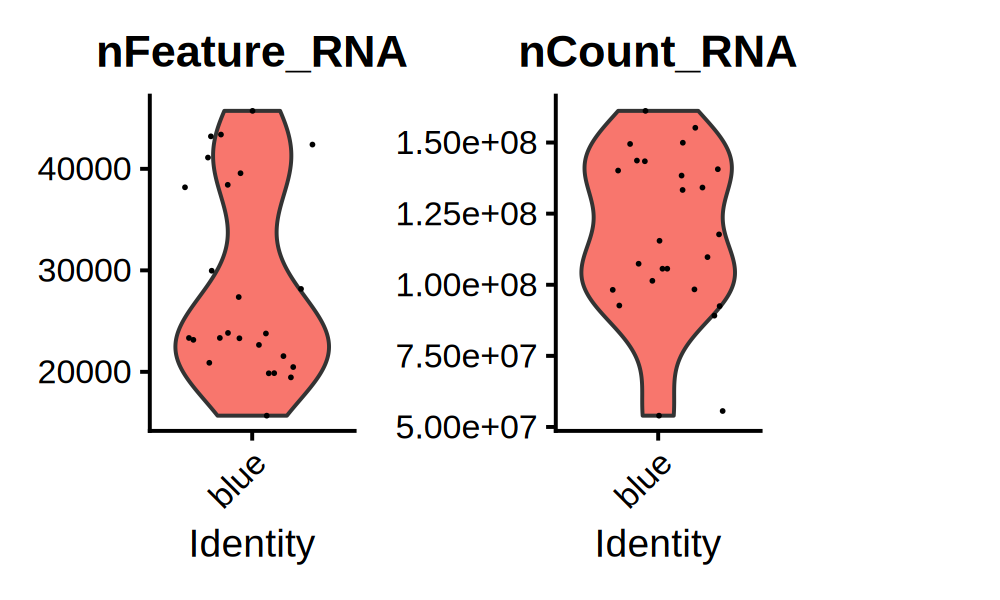

In [208]:
VlnPlot(oo, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)


Warning message in cor(x = data[, 1], y = data[, 2]):
"the standard deviation is zero"


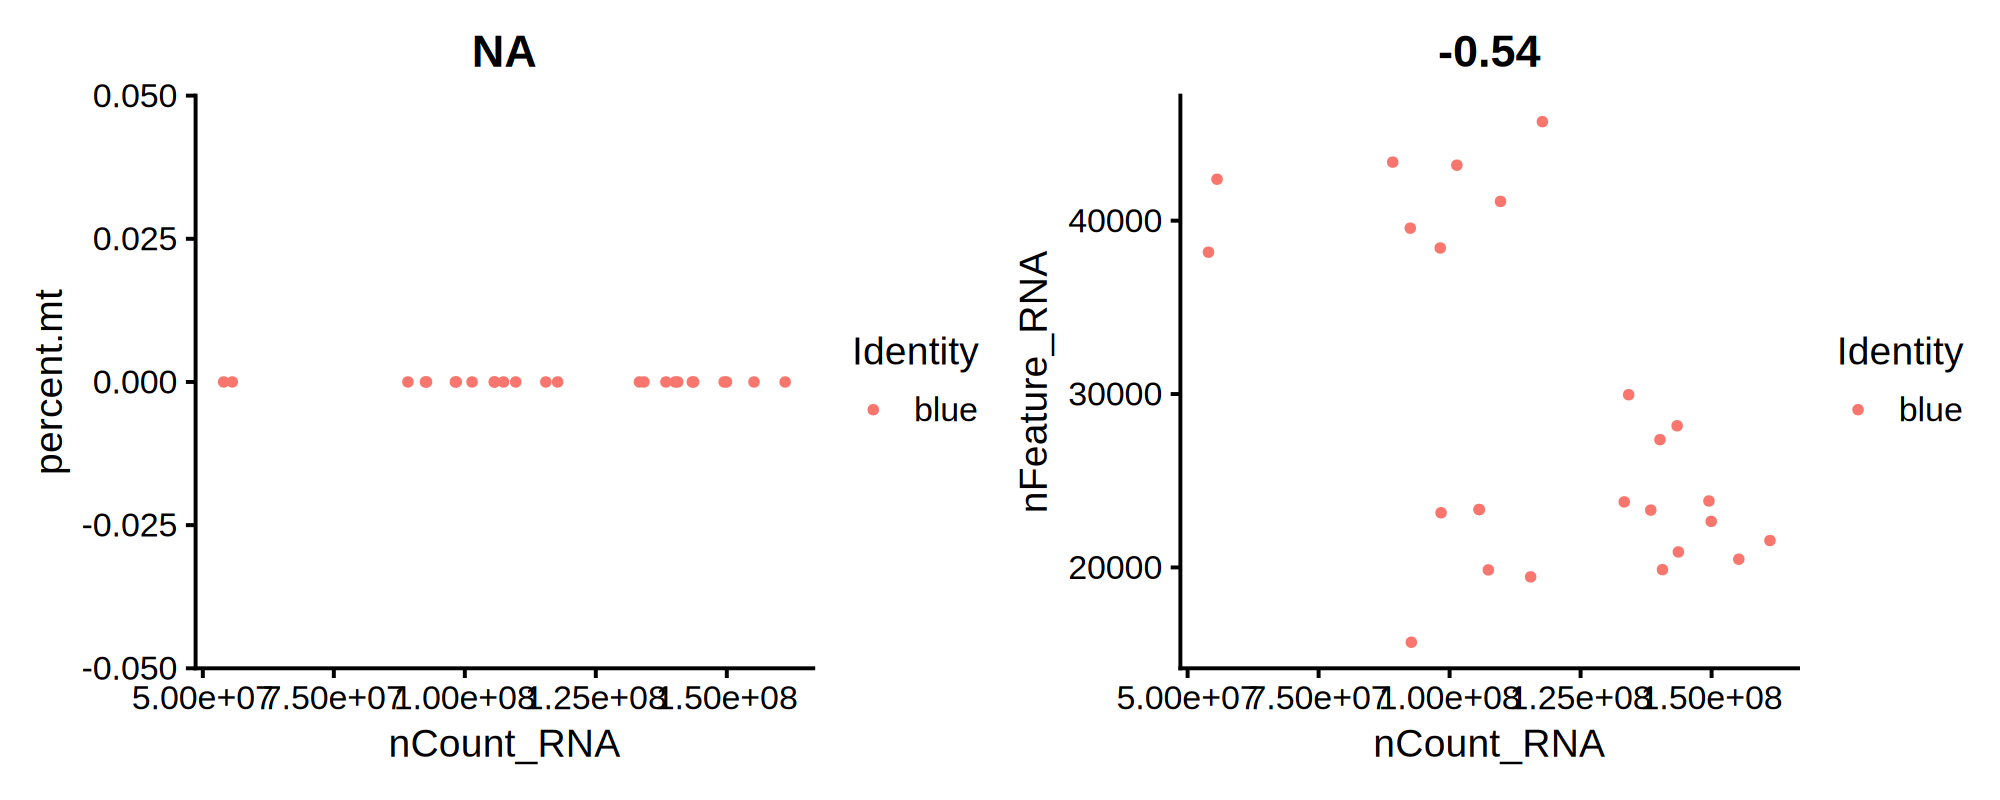

In [214]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
plot1 <- FeatureScatter(oo, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(oo, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2


In [216]:
oo <- NormalizeData(oo, normalization.method = "LogNormalize", scale.factor = 10000)


Normalizing layer: counts



Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


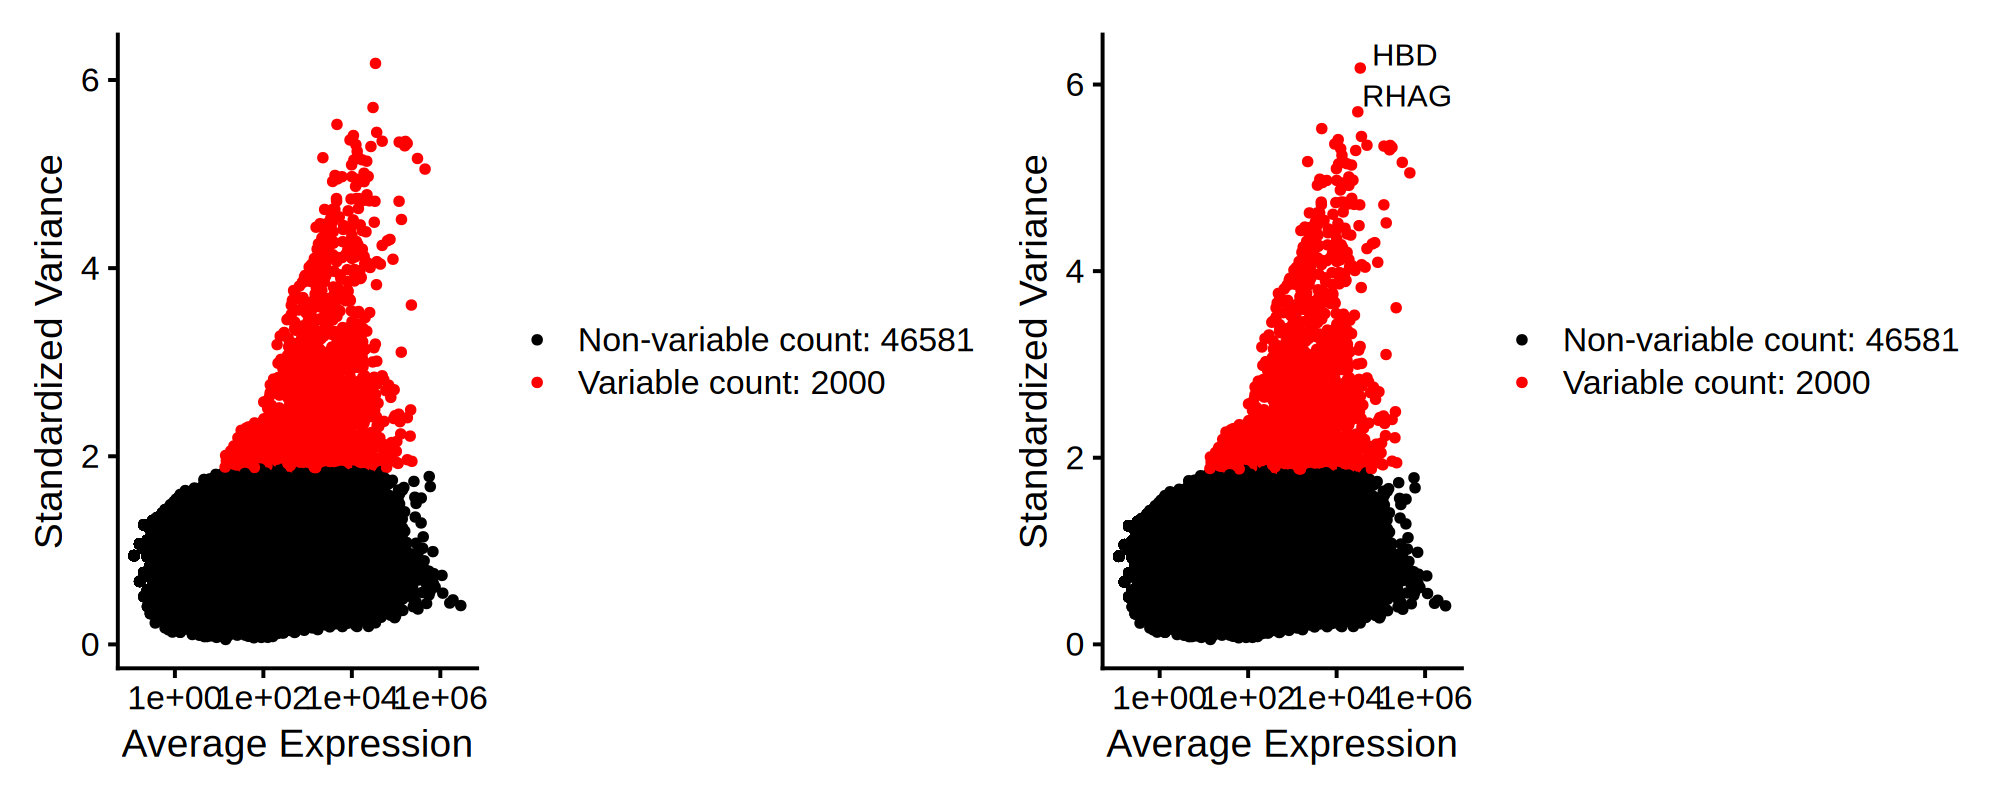

In [217]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
oo <- FindVariableFeatures(oo, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(oo), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(oo)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2


In [218]:
all.genes <- rownames(oo)
oo <- ScaleData(oo, features = all.genes)

Centering and scaling data matrix



In [ ]:
my.contrasts = makeContrasts(MNX1vsCD34=MNX1 - CD34, MNX1vsAML=MNX1 - Others, AMLvsCD34 = Others - CD34, levels=design)
MNX1vsCD34 = glmQLFTest(fit, contrast=my.contrasts[,"MNX1vsCD34"])
MNX1vsCD34 = topTags(MNX1vsCD34, n=nrow(MNX1vsCD34$table), adjust.method="fdr")
